# Binary classification based on Logistic Regression using non-linear regression function

## import library

In [198]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load data

In [199]:
fname_data1 = 'assignment_09_data1.txt'
fname_data2 = 'assignment_09_data2.txt'

data1 = np.genfromtxt(fname_data1, delimiter=',')
data2 = np.genfromtxt(fname_data2, delimiter=',')

num_data1 = data1.shape[0]
num_data2 = data2.shape[0]

# data[:,0] : x
# data[:,1] : y
# data[:,2] : label {0, 1}

## plot the data

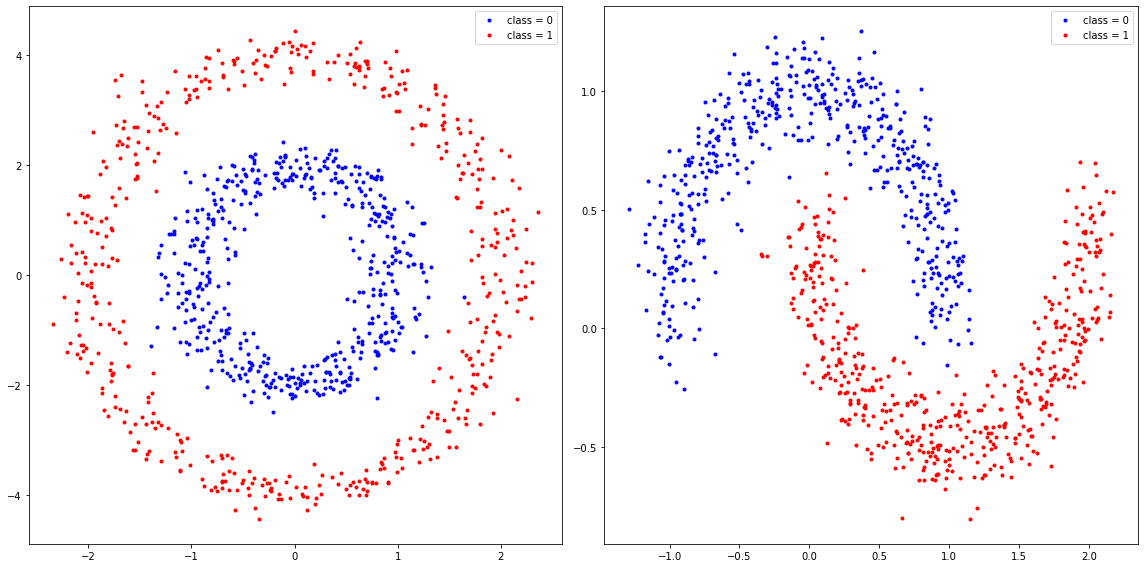

In [123]:
plt.figure(figsize=(16,8))

blue_data1 = data1[data1[:,2] == 0]
blue_x = blue_data1[:, 0]
blue_y = blue_data1[:, 1]
    
red_data1 = data1[data1[:,2] == 1]
red_x = red_data1[:, 0]
red_y = red_data1[:, 1]
    
plt.subplot(121)
plt.plot(blue_x, blue_y, '.', color = 'blue', label='class = 0')
plt.plot(red_x, red_y, '.', color = 'red', label='class = 1')


plt.legend()

blue_data2 = data2[data2[:,2] == 0]
blue_x = blue_data2[:, 0]
blue_y = blue_data2[:, 1]
    
red_data2 = data2[data2[:,2] == 1]
red_x = red_data2[:, 0]
red_y = red_data2[:, 1]
 
plt.subplot(122)    
plt.plot(blue_x, blue_y, '.', color = 'blue', label='class = 0')
plt.plot(red_x, red_y, '.', color = 'red', label='class = 1')



plt.legend()
plt.tight_layout()
plt.show()


## define the feature function for each data to obtain the best accuracy

In [280]:
def feature_function1(x, y):
    
    feature = []
    for i in range(0, len(x)):
        feature.append(np.array([1, x[i]**2, y[i]**2]))
    
    feature = np.array(feature)
        
    return feature

In [290]:
def feature_function2(x, y):
    
    feature = []
    for i in range(0, len(x)):
        feature.append(np.array([1, x[i], x[i]**2, x[i]**3, y[i]]))
    
    feature = np.array(feature)
    
    return feature

## define regression function with a vector $\theta$ model parameters and input data 

In [291]:
def regression_function(theta, feature):
    
    value = np.matmul(np.transpose(theta), np.transpose(feature))
    
    return value

## define sigmoid function with input $x$

In [292]:
def logistic_function(x):
    
    z = 1/(1+np.exp(-x))
    
    return z

## define loss function with feature and label based on the logistic regression

In [293]:
def compute_loss_feature(theta, feature, label):
    regression_value = regression_function(theta, feature)
    rhs_sum = 0
    loss = 0
    num_data = len(feature)
    
    for i in range(0, num_data):
        h = logistic_function(regression_value[i])
        rhs_sum += ((-label[i]*np.log(h)) - ((1-label[i])*np.log(1-h)))
    
    loss = rhs_sum / num_data
    
    return loss

## define gradient vector for the model parameters $\theta$

In [294]:
def compute_gradient_feature(theta, feature, label):
    gradient = 0
    H = []

    num_data = len(feature)
    regression_value = regression_function(theta, feature)
    
    for i in range(0, num_data):
        h = logistic_function(regression_value[i])
        H.append(h)

    gradient = np.matmul(np.transpose(feature), (H - label)) / num_data
    
    return gradient

## compute the accuracy

In [295]:
def compute_accuracy(theta, feature, label):
    num_data = len(feature)
    regression_value = regression_function(theta, feature)
    hit_count = 0
    accuracy = 0
        
    for i in range(0, num_data):
        h = logistic_function(regression_value[i])
        if h >= 0.5 and label[i] == 1:
            hit_count += 1
        elif h < 0.5 and label[i] == 0:
            hit_count += 1
            
    accuracy = hit_count / num_data
    
    return accuracy

## gradient descent for the model parameters $\theta$

In [296]:
num_iteration   = 30000         # USE THIS VALUE for the number of gradient descent iterations 
learning_rate   = 0.3           # USE THIS VALUE for the learning rate
theta1          = np.array((0, 0, 0))
theta2          = np.array((0, 0, 0, 0, 0))

theta1_iteration = np.zeros((num_iteration, theta1.size))
loss1_iteration  = np.zeros(num_iteration)

theta2_iteration = np.zeros((num_iteration, theta2.size))
loss2_iteration  = np.zeros(num_iteration)

In [297]:
feature1 = feature_function1(data1[:,0], data1[:,1])
label1 = data1[:, 2]

feature2 = feature_function2(data2[:,0], data2[:,1])
label2 = data2[:, 2]

In [298]:
for i in range(0, num_iteration):
    theta1 = theta1 - learning_rate * compute_gradient_feature(theta1, feature1, label1)
    loss1 = compute_loss_feature(theta1, feature1, label1)
    theta1_iteration[i] = theta1
    loss1_iteration[i] = loss1
    print("**for data1** iteration = %4d, loss = %5.5f" % (i, loss1))
    
    theta2 = theta2 - learning_rate * compute_gradient_feature(theta2, feature2, label2)
    loss2 = compute_loss_feature(theta2, feature2, label2)
    theta2_iteration[i] = theta2
    loss2_iteration[i] = loss2
    print("**for data2** iteration = %4d, loss = %5.5f" % (i, loss2))
    
theta1_optimal = theta1
theta2_optimal = theta2

**for data1** iteration =    0, loss = 0.72428
**for data2** iteration =    0, loss = 0.57880
**for data1** iteration =    1, loss = 0.57370
**for data2** iteration =    1, loss = 0.54930
**for data1** iteration =    2, loss = 0.54469
**for data2** iteration =    2, loss = 0.52889
**for data1** iteration =    3, loss = 0.52982
**for data2** iteration =    3, loss = 0.51238
**for data1** iteration =    4, loss = 0.51471
**for data2** iteration =    4, loss = 0.49825
**for data1** iteration =    5, loss = 0.50206
**for data2** iteration =    5, loss = 0.48585
**for data1** iteration =    6, loss = 0.48957
**for data2** iteration =    6, loss = 0.47479
**for data1** iteration =    7, loss = 0.47824
**for data2** iteration =    7, loss = 0.46484
**for data1** iteration =    8, loss = 0.46718
**for data2** iteration =    8, loss = 0.45581
**for data1** iteration =    9, loss = 0.45682
**for data2** iteration =    9, loss = 0.44757
**for data1** iteration =   10, loss = 0.44678
**for data2**

**for data1** iteration =   94, loss = 0.14771
**for data2** iteration =   94, loss = 0.26610
**for data1** iteration =   95, loss = 0.14654
**for data2** iteration =   95, loss = 0.26522
**for data1** iteration =   96, loss = 0.14538
**for data2** iteration =   96, loss = 0.26436
**for data1** iteration =   97, loss = 0.14424
**for data2** iteration =   97, loss = 0.26351
**for data1** iteration =   98, loss = 0.14312
**for data2** iteration =   98, loss = 0.26267
**for data1** iteration =   99, loss = 0.14202
**for data2** iteration =   99, loss = 0.26183
**for data1** iteration =  100, loss = 0.14094
**for data2** iteration =  100, loss = 0.26100
**for data1** iteration =  101, loss = 0.13987
**for data2** iteration =  101, loss = 0.26018
**for data1** iteration =  102, loss = 0.13882
**for data2** iteration =  102, loss = 0.25937
**for data1** iteration =  103, loss = 0.13779
**for data2** iteration =  103, loss = 0.25857
**for data1** iteration =  104, loss = 0.13677
**for data2**

**for data2** iteration =  190, loss = 0.20931
**for data1** iteration =  191, loss = 0.08463
**for data2** iteration =  191, loss = 0.20890
**for data1** iteration =  192, loss = 0.08427
**for data2** iteration =  192, loss = 0.20850
**for data1** iteration =  193, loss = 0.08392
**for data2** iteration =  193, loss = 0.20809
**for data1** iteration =  194, loss = 0.08358
**for data2** iteration =  194, loss = 0.20769
**for data1** iteration =  195, loss = 0.08323
**for data2** iteration =  195, loss = 0.20729
**for data1** iteration =  196, loss = 0.08289
**for data2** iteration =  196, loss = 0.20689
**for data1** iteration =  197, loss = 0.08255
**for data2** iteration =  197, loss = 0.20650
**for data1** iteration =  198, loss = 0.08222
**for data2** iteration =  198, loss = 0.20610
**for data1** iteration =  199, loss = 0.08189
**for data2** iteration =  199, loss = 0.20571
**for data1** iteration =  200, loss = 0.08156
**for data2** iteration =  200, loss = 0.20533
**for data1**

**for data1** iteration =  285, loss = 0.06143
**for data2** iteration =  285, loss = 0.17854
**for data1** iteration =  286, loss = 0.06125
**for data2** iteration =  286, loss = 0.17828
**for data1** iteration =  287, loss = 0.06108
**for data2** iteration =  287, loss = 0.17802
**for data1** iteration =  288, loss = 0.06092
**for data2** iteration =  288, loss = 0.17776
**for data1** iteration =  289, loss = 0.06075
**for data2** iteration =  289, loss = 0.17751
**for data1** iteration =  290, loss = 0.06058
**for data2** iteration =  290, loss = 0.17725
**for data1** iteration =  291, loss = 0.06042
**for data2** iteration =  291, loss = 0.17700
**for data1** iteration =  292, loss = 0.06025
**for data2** iteration =  292, loss = 0.17675
**for data1** iteration =  293, loss = 0.06009
**for data2** iteration =  293, loss = 0.17650
**for data1** iteration =  294, loss = 0.05992
**for data2** iteration =  294, loss = 0.17625
**for data1** iteration =  295, loss = 0.05976
**for data2**

**for data2** iteration =  378, loss = 0.15818
**for data1** iteration =  379, loss = 0.04904
**for data2** iteration =  379, loss = 0.15800
**for data1** iteration =  380, loss = 0.04894
**for data2** iteration =  380, loss = 0.15781
**for data1** iteration =  381, loss = 0.04884
**for data2** iteration =  381, loss = 0.15763
**for data1** iteration =  382, loss = 0.04874
**for data2** iteration =  382, loss = 0.15744
**for data1** iteration =  383, loss = 0.04864
**for data2** iteration =  383, loss = 0.15726
**for data1** iteration =  384, loss = 0.04854
**for data2** iteration =  384, loss = 0.15708
**for data1** iteration =  385, loss = 0.04844
**for data2** iteration =  385, loss = 0.15690
**for data1** iteration =  386, loss = 0.04834
**for data2** iteration =  386, loss = 0.15671
**for data1** iteration =  387, loss = 0.04825
**for data2** iteration =  387, loss = 0.15653
**for data1** iteration =  388, loss = 0.04815
**for data2** iteration =  388, loss = 0.15635
**for data1**

**for data1** iteration =  474, loss = 0.04123
**for data2** iteration =  474, loss = 0.14266
**for data1** iteration =  475, loss = 0.04117
**for data2** iteration =  475, loss = 0.14252
**for data1** iteration =  476, loss = 0.04110
**for data2** iteration =  476, loss = 0.14238
**for data1** iteration =  477, loss = 0.04104
**for data2** iteration =  477, loss = 0.14224
**for data1** iteration =  478, loss = 0.04097
**for data2** iteration =  478, loss = 0.14210
**for data1** iteration =  479, loss = 0.04090
**for data2** iteration =  479, loss = 0.14196
**for data1** iteration =  480, loss = 0.04084
**for data2** iteration =  480, loss = 0.14182
**for data1** iteration =  481, loss = 0.04077
**for data2** iteration =  481, loss = 0.14168
**for data1** iteration =  482, loss = 0.04071
**for data2** iteration =  482, loss = 0.14154
**for data1** iteration =  483, loss = 0.04064
**for data2** iteration =  483, loss = 0.14140
**for data1** iteration =  484, loss = 0.04058
**for data2**

**for data2** iteration =  567, loss = 0.13097
**for data1** iteration =  568, loss = 0.03594
**for data2** iteration =  568, loss = 0.13085
**for data1** iteration =  569, loss = 0.03589
**for data2** iteration =  569, loss = 0.13074
**for data1** iteration =  570, loss = 0.03584
**for data2** iteration =  570, loss = 0.13063
**for data1** iteration =  571, loss = 0.03580
**for data2** iteration =  571, loss = 0.13052
**for data1** iteration =  572, loss = 0.03575
**for data2** iteration =  572, loss = 0.13041
**for data1** iteration =  573, loss = 0.03570
**for data2** iteration =  573, loss = 0.13030
**for data1** iteration =  574, loss = 0.03565
**for data2** iteration =  574, loss = 0.13019
**for data1** iteration =  575, loss = 0.03561
**for data2** iteration =  575, loss = 0.13008
**for data1** iteration =  576, loss = 0.03556
**for data2** iteration =  576, loss = 0.12997
**for data1** iteration =  577, loss = 0.03552
**for data2** iteration =  577, loss = 0.12986
**for data1**

**for data2** iteration =  663, loss = 0.12126
**for data1** iteration =  664, loss = 0.03199
**for data2** iteration =  664, loss = 0.12117
**for data1** iteration =  665, loss = 0.03195
**for data2** iteration =  665, loss = 0.12108
**for data1** iteration =  666, loss = 0.03192
**for data2** iteration =  666, loss = 0.12099
**for data1** iteration =  667, loss = 0.03188
**for data2** iteration =  667, loss = 0.12090
**for data1** iteration =  668, loss = 0.03185
**for data2** iteration =  668, loss = 0.12081
**for data1** iteration =  669, loss = 0.03181
**for data2** iteration =  669, loss = 0.12072
**for data1** iteration =  670, loss = 0.03178
**for data2** iteration =  670, loss = 0.12063
**for data1** iteration =  671, loss = 0.03174
**for data2** iteration =  671, loss = 0.12054
**for data1** iteration =  672, loss = 0.03171
**for data2** iteration =  672, loss = 0.12045
**for data1** iteration =  673, loss = 0.03167
**for data2** iteration =  673, loss = 0.12036
**for data1**

**for data2** iteration =  758, loss = 0.11336
**for data1** iteration =  759, loss = 0.02901
**for data2** iteration =  759, loss = 0.11329
**for data1** iteration =  760, loss = 0.02898
**for data2** iteration =  760, loss = 0.11321
**for data1** iteration =  761, loss = 0.02895
**for data2** iteration =  761, loss = 0.11314
**for data1** iteration =  762, loss = 0.02893
**for data2** iteration =  762, loss = 0.11306
**for data1** iteration =  763, loss = 0.02890
**for data2** iteration =  763, loss = 0.11298
**for data1** iteration =  764, loss = 0.02887
**for data2** iteration =  764, loss = 0.11291
**for data1** iteration =  765, loss = 0.02884
**for data2** iteration =  765, loss = 0.11283
**for data1** iteration =  766, loss = 0.02882
**for data2** iteration =  766, loss = 0.11276
**for data1** iteration =  767, loss = 0.02879
**for data2** iteration =  767, loss = 0.11269
**for data1** iteration =  768, loss = 0.02876
**for data2** iteration =  768, loss = 0.11261
**for data1**

**for data2** iteration =  855, loss = 0.10660
**for data1** iteration =  856, loss = 0.02661
**for data2** iteration =  856, loss = 0.10654
**for data1** iteration =  857, loss = 0.02659
**for data2** iteration =  857, loss = 0.10647
**for data1** iteration =  858, loss = 0.02657
**for data2** iteration =  858, loss = 0.10641
**for data1** iteration =  859, loss = 0.02654
**for data2** iteration =  859, loss = 0.10635
**for data1** iteration =  860, loss = 0.02652
**for data2** iteration =  860, loss = 0.10628
**for data1** iteration =  861, loss = 0.02650
**for data2** iteration =  861, loss = 0.10622
**for data1** iteration =  862, loss = 0.02648
**for data2** iteration =  862, loss = 0.10616
**for data1** iteration =  863, loss = 0.02646
**for data2** iteration =  863, loss = 0.10609
**for data1** iteration =  864, loss = 0.02643
**for data2** iteration =  864, loss = 0.10603
**for data1** iteration =  865, loss = 0.02641
**for data2** iteration =  865, loss = 0.10597
**for data1**

**for data1** iteration =  951, loss = 0.02471
**for data2** iteration =  951, loss = 0.10091
**for data1** iteration =  952, loss = 0.02469
**for data2** iteration =  952, loss = 0.10085
**for data1** iteration =  953, loss = 0.02467
**for data2** iteration =  953, loss = 0.10080
**for data1** iteration =  954, loss = 0.02465
**for data2** iteration =  954, loss = 0.10074
**for data1** iteration =  955, loss = 0.02463
**for data2** iteration =  955, loss = 0.10069
**for data1** iteration =  956, loss = 0.02462
**for data2** iteration =  956, loss = 0.10063
**for data1** iteration =  957, loss = 0.02460
**for data2** iteration =  957, loss = 0.10058
**for data1** iteration =  958, loss = 0.02458
**for data2** iteration =  958, loss = 0.10052
**for data1** iteration =  959, loss = 0.02456
**for data2** iteration =  959, loss = 0.10047
**for data1** iteration =  960, loss = 0.02454
**for data2** iteration =  960, loss = 0.10041
**for data1** iteration =  961, loss = 0.02453
**for data2**

**for data1** iteration = 1050, loss = 0.02307
**for data2** iteration = 1050, loss = 0.09584
**for data1** iteration = 1051, loss = 0.02305
**for data2** iteration = 1051, loss = 0.09580
**for data1** iteration = 1052, loss = 0.02304
**for data2** iteration = 1052, loss = 0.09575
**for data1** iteration = 1053, loss = 0.02302
**for data2** iteration = 1053, loss = 0.09570
**for data1** iteration = 1054, loss = 0.02301
**for data2** iteration = 1054, loss = 0.09566
**for data1** iteration = 1055, loss = 0.02299
**for data2** iteration = 1055, loss = 0.09561
**for data1** iteration = 1056, loss = 0.02298
**for data2** iteration = 1056, loss = 0.09556
**for data1** iteration = 1057, loss = 0.02296
**for data2** iteration = 1057, loss = 0.09551
**for data1** iteration = 1058, loss = 0.02295
**for data2** iteration = 1058, loss = 0.09547
**for data1** iteration = 1059, loss = 0.02293
**for data2** iteration = 1059, loss = 0.09542
**for data1** iteration = 1060, loss = 0.02292
**for data2**

**for data1** iteration = 1146, loss = 0.02173
**for data2** iteration = 1146, loss = 0.09157
**for data1** iteration = 1147, loss = 0.02172
**for data2** iteration = 1147, loss = 0.09153
**for data1** iteration = 1148, loss = 0.02170
**for data2** iteration = 1148, loss = 0.09148
**for data1** iteration = 1149, loss = 0.02169
**for data2** iteration = 1149, loss = 0.09144
**for data1** iteration = 1150, loss = 0.02168
**for data2** iteration = 1150, loss = 0.09140
**for data1** iteration = 1151, loss = 0.02167
**for data2** iteration = 1151, loss = 0.09136
**for data1** iteration = 1152, loss = 0.02165
**for data2** iteration = 1152, loss = 0.09132
**for data1** iteration = 1153, loss = 0.02164
**for data2** iteration = 1153, loss = 0.09128
**for data1** iteration = 1154, loss = 0.02163
**for data2** iteration = 1154, loss = 0.09124
**for data1** iteration = 1155, loss = 0.02162
**for data2** iteration = 1155, loss = 0.09119
**for data1** iteration = 1156, loss = 0.02160
**for data2**

**for data1** iteration = 1240, loss = 0.02061
**for data2** iteration = 1240, loss = 0.08787
**for data1** iteration = 1241, loss = 0.02060
**for data2** iteration = 1241, loss = 0.08783
**for data1** iteration = 1242, loss = 0.02059
**for data2** iteration = 1242, loss = 0.08779
**for data1** iteration = 1243, loss = 0.02058
**for data2** iteration = 1243, loss = 0.08776
**for data1** iteration = 1244, loss = 0.02056
**for data2** iteration = 1244, loss = 0.08772
**for data1** iteration = 1245, loss = 0.02055
**for data2** iteration = 1245, loss = 0.08768
**for data1** iteration = 1246, loss = 0.02054
**for data2** iteration = 1246, loss = 0.08765
**for data1** iteration = 1247, loss = 0.02053
**for data2** iteration = 1247, loss = 0.08761
**for data1** iteration = 1248, loss = 0.02052
**for data2** iteration = 1248, loss = 0.08757
**for data1** iteration = 1249, loss = 0.02051
**for data2** iteration = 1249, loss = 0.08754
**for data1** iteration = 1250, loss = 0.02050
**for data2**

**for data1** iteration = 1335, loss = 0.01963
**for data2** iteration = 1335, loss = 0.08454
**for data1** iteration = 1336, loss = 0.01962
**for data2** iteration = 1336, loss = 0.08450
**for data1** iteration = 1337, loss = 0.01961
**for data2** iteration = 1337, loss = 0.08447
**for data1** iteration = 1338, loss = 0.01960
**for data2** iteration = 1338, loss = 0.08444
**for data1** iteration = 1339, loss = 0.01959
**for data2** iteration = 1339, loss = 0.08440
**for data1** iteration = 1340, loss = 0.01958
**for data2** iteration = 1340, loss = 0.08437
**for data1** iteration = 1341, loss = 0.01957
**for data2** iteration = 1341, loss = 0.08434
**for data1** iteration = 1342, loss = 0.01956
**for data2** iteration = 1342, loss = 0.08430
**for data1** iteration = 1343, loss = 0.01955
**for data2** iteration = 1343, loss = 0.08427
**for data1** iteration = 1344, loss = 0.01954
**for data2** iteration = 1344, loss = 0.08424
**for data1** iteration = 1345, loss = 0.01953
**for data2**

**for data1** iteration = 1430, loss = 0.01877
**for data2** iteration = 1430, loss = 0.08154
**for data1** iteration = 1431, loss = 0.01876
**for data2** iteration = 1431, loss = 0.08151
**for data1** iteration = 1432, loss = 0.01875
**for data2** iteration = 1432, loss = 0.08148
**for data1** iteration = 1433, loss = 0.01874
**for data2** iteration = 1433, loss = 0.08146
**for data1** iteration = 1434, loss = 0.01873
**for data2** iteration = 1434, loss = 0.08143
**for data1** iteration = 1435, loss = 0.01872
**for data2** iteration = 1435, loss = 0.08140
**for data1** iteration = 1436, loss = 0.01872
**for data2** iteration = 1436, loss = 0.08137
**for data1** iteration = 1437, loss = 0.01871
**for data2** iteration = 1437, loss = 0.08134
**for data1** iteration = 1438, loss = 0.01870
**for data2** iteration = 1438, loss = 0.08131
**for data1** iteration = 1439, loss = 0.01869
**for data2** iteration = 1439, loss = 0.08128
**for data1** iteration = 1440, loss = 0.01868
**for data2**

**for data2** iteration = 1525, loss = 0.07884
**for data1** iteration = 1526, loss = 0.01800
**for data2** iteration = 1526, loss = 0.07882
**for data1** iteration = 1527, loss = 0.01799
**for data2** iteration = 1527, loss = 0.07879
**for data1** iteration = 1528, loss = 0.01798
**for data2** iteration = 1528, loss = 0.07876
**for data1** iteration = 1529, loss = 0.01798
**for data2** iteration = 1529, loss = 0.07874
**for data1** iteration = 1530, loss = 0.01797
**for data2** iteration = 1530, loss = 0.07871
**for data1** iteration = 1531, loss = 0.01796
**for data2** iteration = 1531, loss = 0.07868
**for data1** iteration = 1532, loss = 0.01795
**for data2** iteration = 1532, loss = 0.07865
**for data1** iteration = 1533, loss = 0.01795
**for data2** iteration = 1533, loss = 0.07863
**for data1** iteration = 1534, loss = 0.01794
**for data2** iteration = 1534, loss = 0.07860
**for data1** iteration = 1535, loss = 0.01793
**for data2** iteration = 1535, loss = 0.07857
**for data1**

**for data2** iteration = 1620, loss = 0.07639
**for data1** iteration = 1621, loss = 0.01732
**for data2** iteration = 1621, loss = 0.07637
**for data1** iteration = 1622, loss = 0.01731
**for data2** iteration = 1622, loss = 0.07634
**for data1** iteration = 1623, loss = 0.01731
**for data2** iteration = 1623, loss = 0.07632
**for data1** iteration = 1624, loss = 0.01730
**for data2** iteration = 1624, loss = 0.07629
**for data1** iteration = 1625, loss = 0.01729
**for data2** iteration = 1625, loss = 0.07627
**for data1** iteration = 1626, loss = 0.01729
**for data2** iteration = 1626, loss = 0.07624
**for data1** iteration = 1627, loss = 0.01728
**for data2** iteration = 1627, loss = 0.07622
**for data1** iteration = 1628, loss = 0.01727
**for data2** iteration = 1628, loss = 0.07619
**for data1** iteration = 1629, loss = 0.01727
**for data2** iteration = 1629, loss = 0.07617
**for data1** iteration = 1630, loss = 0.01726
**for data2** iteration = 1630, loss = 0.07614
**for data1**

**for data2** iteration = 1716, loss = 0.07413
**for data1** iteration = 1717, loss = 0.01671
**for data2** iteration = 1717, loss = 0.07410
**for data1** iteration = 1718, loss = 0.01670
**for data2** iteration = 1718, loss = 0.07408
**for data1** iteration = 1719, loss = 0.01670
**for data2** iteration = 1719, loss = 0.07406
**for data1** iteration = 1720, loss = 0.01669
**for data2** iteration = 1720, loss = 0.07404
**for data1** iteration = 1721, loss = 0.01668
**for data2** iteration = 1721, loss = 0.07401
**for data1** iteration = 1722, loss = 0.01668
**for data2** iteration = 1722, loss = 0.07399
**for data1** iteration = 1723, loss = 0.01667
**for data2** iteration = 1723, loss = 0.07397
**for data1** iteration = 1724, loss = 0.01667
**for data2** iteration = 1724, loss = 0.07395
**for data1** iteration = 1725, loss = 0.01666
**for data2** iteration = 1725, loss = 0.07392
**for data1** iteration = 1726, loss = 0.01665
**for data2** iteration = 1726, loss = 0.07390
**for data1**

**for data1** iteration = 1810, loss = 0.01617
**for data2** iteration = 1810, loss = 0.07209
**for data1** iteration = 1811, loss = 0.01617
**for data2** iteration = 1811, loss = 0.07207
**for data1** iteration = 1812, loss = 0.01616
**for data2** iteration = 1812, loss = 0.07205
**for data1** iteration = 1813, loss = 0.01616
**for data2** iteration = 1813, loss = 0.07203
**for data1** iteration = 1814, loss = 0.01615
**for data2** iteration = 1814, loss = 0.07201
**for data1** iteration = 1815, loss = 0.01615
**for data2** iteration = 1815, loss = 0.07199
**for data1** iteration = 1816, loss = 0.01614
**for data2** iteration = 1816, loss = 0.07197
**for data1** iteration = 1817, loss = 0.01613
**for data2** iteration = 1817, loss = 0.07195
**for data1** iteration = 1818, loss = 0.01613
**for data2** iteration = 1818, loss = 0.07193
**for data1** iteration = 1819, loss = 0.01612
**for data2** iteration = 1819, loss = 0.07191
**for data1** iteration = 1820, loss = 0.01612
**for data2**

**for data1** iteration = 1906, loss = 0.01567
**for data2** iteration = 1906, loss = 0.07018
**for data1** iteration = 1907, loss = 0.01567
**for data2** iteration = 1907, loss = 0.07016
**for data1** iteration = 1908, loss = 0.01566
**for data2** iteration = 1908, loss = 0.07014
**for data1** iteration = 1909, loss = 0.01566
**for data2** iteration = 1909, loss = 0.07012
**for data1** iteration = 1910, loss = 0.01565
**for data2** iteration = 1910, loss = 0.07010
**for data1** iteration = 1911, loss = 0.01565
**for data2** iteration = 1911, loss = 0.07009
**for data1** iteration = 1912, loss = 0.01564
**for data2** iteration = 1912, loss = 0.07007
**for data1** iteration = 1913, loss = 0.01564
**for data2** iteration = 1913, loss = 0.07005
**for data1** iteration = 1914, loss = 0.01563
**for data2** iteration = 1914, loss = 0.07003
**for data1** iteration = 1915, loss = 0.01563
**for data2** iteration = 1915, loss = 0.07001
**for data1** iteration = 1916, loss = 0.01562
**for data2**

**for data1** iteration = 2000, loss = 0.01522
**for data2** iteration = 2000, loss = 0.06845
**for data1** iteration = 2001, loss = 0.01522
**for data2** iteration = 2001, loss = 0.06843
**for data1** iteration = 2002, loss = 0.01521
**for data2** iteration = 2002, loss = 0.06841
**for data1** iteration = 2003, loss = 0.01521
**for data2** iteration = 2003, loss = 0.06839
**for data1** iteration = 2004, loss = 0.01520
**for data2** iteration = 2004, loss = 0.06838
**for data1** iteration = 2005, loss = 0.01520
**for data2** iteration = 2005, loss = 0.06836
**for data1** iteration = 2006, loss = 0.01520
**for data2** iteration = 2006, loss = 0.06834
**for data1** iteration = 2007, loss = 0.01519
**for data2** iteration = 2007, loss = 0.06832
**for data1** iteration = 2008, loss = 0.01519
**for data2** iteration = 2008, loss = 0.06831
**for data1** iteration = 2009, loss = 0.01518
**for data2** iteration = 2009, loss = 0.06829
**for data1** iteration = 2010, loss = 0.01518
**for data2**

**for data2** iteration = 2094, loss = 0.06684
**for data1** iteration = 2095, loss = 0.01481
**for data2** iteration = 2095, loss = 0.06682
**for data1** iteration = 2096, loss = 0.01480
**for data2** iteration = 2096, loss = 0.06681
**for data1** iteration = 2097, loss = 0.01480
**for data2** iteration = 2097, loss = 0.06679
**for data1** iteration = 2098, loss = 0.01479
**for data2** iteration = 2098, loss = 0.06677
**for data1** iteration = 2099, loss = 0.01479
**for data2** iteration = 2099, loss = 0.06676
**for data1** iteration = 2100, loss = 0.01479
**for data2** iteration = 2100, loss = 0.06674
**for data1** iteration = 2101, loss = 0.01478
**for data2** iteration = 2101, loss = 0.06672
**for data1** iteration = 2102, loss = 0.01478
**for data2** iteration = 2102, loss = 0.06671
**for data1** iteration = 2103, loss = 0.01477
**for data2** iteration = 2103, loss = 0.06669
**for data1** iteration = 2104, loss = 0.01477
**for data2** iteration = 2104, loss = 0.06667
**for data1**

**for data1** iteration = 2191, loss = 0.01442
**for data2** iteration = 2191, loss = 0.06529
**for data1** iteration = 2192, loss = 0.01442
**for data2** iteration = 2192, loss = 0.06528
**for data1** iteration = 2193, loss = 0.01441
**for data2** iteration = 2193, loss = 0.06526
**for data1** iteration = 2194, loss = 0.01441
**for data2** iteration = 2194, loss = 0.06525
**for data1** iteration = 2195, loss = 0.01441
**for data2** iteration = 2195, loss = 0.06523
**for data1** iteration = 2196, loss = 0.01440
**for data2** iteration = 2196, loss = 0.06522
**for data1** iteration = 2197, loss = 0.01440
**for data2** iteration = 2197, loss = 0.06520
**for data1** iteration = 2198, loss = 0.01440
**for data2** iteration = 2198, loss = 0.06518
**for data1** iteration = 2199, loss = 0.01439
**for data2** iteration = 2199, loss = 0.06517
**for data1** iteration = 2200, loss = 0.01439
**for data2** iteration = 2200, loss = 0.06515
**for data1** iteration = 2201, loss = 0.01438
**for data2**

**for data1** iteration = 2285, loss = 0.01407
**for data2** iteration = 2285, loss = 0.06389
**for data1** iteration = 2286, loss = 0.01407
**for data2** iteration = 2286, loss = 0.06388
**for data1** iteration = 2287, loss = 0.01407
**for data2** iteration = 2287, loss = 0.06386
**for data1** iteration = 2288, loss = 0.01406
**for data2** iteration = 2288, loss = 0.06385
**for data1** iteration = 2289, loss = 0.01406
**for data2** iteration = 2289, loss = 0.06384
**for data1** iteration = 2290, loss = 0.01406
**for data2** iteration = 2290, loss = 0.06382
**for data1** iteration = 2291, loss = 0.01405
**for data2** iteration = 2291, loss = 0.06381
**for data1** iteration = 2292, loss = 0.01405
**for data2** iteration = 2292, loss = 0.06379
**for data1** iteration = 2293, loss = 0.01405
**for data2** iteration = 2293, loss = 0.06378
**for data1** iteration = 2294, loss = 0.01404
**for data2** iteration = 2294, loss = 0.06376
**for data1** iteration = 2295, loss = 0.01404
**for data2**

**for data1** iteration = 2381, loss = 0.01374
**for data2** iteration = 2381, loss = 0.06256
**for data1** iteration = 2382, loss = 0.01374
**for data2** iteration = 2382, loss = 0.06254
**for data1** iteration = 2383, loss = 0.01374
**for data2** iteration = 2383, loss = 0.06253
**for data1** iteration = 2384, loss = 0.01373
**for data2** iteration = 2384, loss = 0.06251
**for data1** iteration = 2385, loss = 0.01373
**for data2** iteration = 2385, loss = 0.06250
**for data1** iteration = 2386, loss = 0.01373
**for data2** iteration = 2386, loss = 0.06249
**for data1** iteration = 2387, loss = 0.01372
**for data2** iteration = 2387, loss = 0.06247
**for data1** iteration = 2388, loss = 0.01372
**for data2** iteration = 2388, loss = 0.06246
**for data1** iteration = 2389, loss = 0.01372
**for data2** iteration = 2389, loss = 0.06245
**for data1** iteration = 2390, loss = 0.01371
**for data2** iteration = 2390, loss = 0.06243
**for data1** iteration = 2391, loss = 0.01371
**for data2**

**for data1** iteration = 2476, loss = 0.01344
**for data2** iteration = 2476, loss = 0.06131
**for data1** iteration = 2477, loss = 0.01344
**for data2** iteration = 2477, loss = 0.06130
**for data1** iteration = 2478, loss = 0.01344
**for data2** iteration = 2478, loss = 0.06129
**for data1** iteration = 2479, loss = 0.01343
**for data2** iteration = 2479, loss = 0.06127
**for data1** iteration = 2480, loss = 0.01343
**for data2** iteration = 2480, loss = 0.06126
**for data1** iteration = 2481, loss = 0.01343
**for data2** iteration = 2481, loss = 0.06125
**for data1** iteration = 2482, loss = 0.01342
**for data2** iteration = 2482, loss = 0.06124
**for data1** iteration = 2483, loss = 0.01342
**for data2** iteration = 2483, loss = 0.06122
**for data1** iteration = 2484, loss = 0.01342
**for data2** iteration = 2484, loss = 0.06121
**for data1** iteration = 2485, loss = 0.01341
**for data2** iteration = 2485, loss = 0.06120
**for data1** iteration = 2486, loss = 0.01341
**for data2**

**for data1** iteration = 2572, loss = 0.01316
**for data2** iteration = 2572, loss = 0.06013
**for data1** iteration = 2573, loss = 0.01315
**for data2** iteration = 2573, loss = 0.06012
**for data1** iteration = 2574, loss = 0.01315
**for data2** iteration = 2574, loss = 0.06011
**for data1** iteration = 2575, loss = 0.01315
**for data2** iteration = 2575, loss = 0.06010
**for data1** iteration = 2576, loss = 0.01314
**for data2** iteration = 2576, loss = 0.06008
**for data1** iteration = 2577, loss = 0.01314
**for data2** iteration = 2577, loss = 0.06007
**for data1** iteration = 2578, loss = 0.01314
**for data2** iteration = 2578, loss = 0.06006
**for data1** iteration = 2579, loss = 0.01314
**for data2** iteration = 2579, loss = 0.06005
**for data1** iteration = 2580, loss = 0.01313
**for data2** iteration = 2580, loss = 0.06004
**for data1** iteration = 2581, loss = 0.01313
**for data2** iteration = 2581, loss = 0.06002
**for data1** iteration = 2582, loss = 0.01313
**for data2**

**for data1** iteration = 2667, loss = 0.01289
**for data2** iteration = 2667, loss = 0.05903
**for data1** iteration = 2668, loss = 0.01289
**for data2** iteration = 2668, loss = 0.05902
**for data1** iteration = 2669, loss = 0.01289
**for data2** iteration = 2669, loss = 0.05901
**for data1** iteration = 2670, loss = 0.01288
**for data2** iteration = 2670, loss = 0.05899
**for data1** iteration = 2671, loss = 0.01288
**for data2** iteration = 2671, loss = 0.05898
**for data1** iteration = 2672, loss = 0.01288
**for data2** iteration = 2672, loss = 0.05897
**for data1** iteration = 2673, loss = 0.01288
**for data2** iteration = 2673, loss = 0.05896
**for data1** iteration = 2674, loss = 0.01287
**for data2** iteration = 2674, loss = 0.05895
**for data1** iteration = 2675, loss = 0.01287
**for data2** iteration = 2675, loss = 0.05894
**for data1** iteration = 2676, loss = 0.01287
**for data2** iteration = 2676, loss = 0.05893
**for data1** iteration = 2677, loss = 0.01287
**for data2**

**for data1** iteration = 2761, loss = 0.01265
**for data2** iteration = 2761, loss = 0.05800
**for data1** iteration = 2762, loss = 0.01265
**for data2** iteration = 2762, loss = 0.05799
**for data1** iteration = 2763, loss = 0.01264
**for data2** iteration = 2763, loss = 0.05798
**for data1** iteration = 2764, loss = 0.01264
**for data2** iteration = 2764, loss = 0.05796
**for data1** iteration = 2765, loss = 0.01264
**for data2** iteration = 2765, loss = 0.05795
**for data1** iteration = 2766, loss = 0.01264
**for data2** iteration = 2766, loss = 0.05794
**for data1** iteration = 2767, loss = 0.01263
**for data2** iteration = 2767, loss = 0.05793
**for data1** iteration = 2768, loss = 0.01263
**for data2** iteration = 2768, loss = 0.05792
**for data1** iteration = 2769, loss = 0.01263
**for data2** iteration = 2769, loss = 0.05791
**for data1** iteration = 2770, loss = 0.01263
**for data2** iteration = 2770, loss = 0.05790
**for data1** iteration = 2771, loss = 0.01262
**for data2**

**for data2** iteration = 2857, loss = 0.05700
**for data1** iteration = 2858, loss = 0.01241
**for data2** iteration = 2858, loss = 0.05699
**for data1** iteration = 2859, loss = 0.01241
**for data2** iteration = 2859, loss = 0.05698
**for data1** iteration = 2860, loss = 0.01241
**for data2** iteration = 2860, loss = 0.05697
**for data1** iteration = 2861, loss = 0.01241
**for data2** iteration = 2861, loss = 0.05696
**for data1** iteration = 2862, loss = 0.01240
**for data2** iteration = 2862, loss = 0.05695
**for data1** iteration = 2863, loss = 0.01240
**for data2** iteration = 2863, loss = 0.05694
**for data1** iteration = 2864, loss = 0.01240
**for data2** iteration = 2864, loss = 0.05693
**for data1** iteration = 2865, loss = 0.01240
**for data2** iteration = 2865, loss = 0.05692
**for data1** iteration = 2866, loss = 0.01239
**for data2** iteration = 2866, loss = 0.05691
**for data1** iteration = 2867, loss = 0.01239
**for data2** iteration = 2867, loss = 0.05690
**for data1**

**for data2** iteration = 2950, loss = 0.05608
**for data1** iteration = 2951, loss = 0.01220
**for data2** iteration = 2951, loss = 0.05607
**for data1** iteration = 2952, loss = 0.01220
**for data2** iteration = 2952, loss = 0.05606
**for data1** iteration = 2953, loss = 0.01220
**for data2** iteration = 2953, loss = 0.05605
**for data1** iteration = 2954, loss = 0.01219
**for data2** iteration = 2954, loss = 0.05604
**for data1** iteration = 2955, loss = 0.01219
**for data2** iteration = 2955, loss = 0.05603
**for data1** iteration = 2956, loss = 0.01219
**for data2** iteration = 2956, loss = 0.05602
**for data1** iteration = 2957, loss = 0.01219
**for data2** iteration = 2957, loss = 0.05602
**for data1** iteration = 2958, loss = 0.01218
**for data2** iteration = 2958, loss = 0.05601
**for data1** iteration = 2959, loss = 0.01218
**for data2** iteration = 2959, loss = 0.05600
**for data1** iteration = 2960, loss = 0.01218
**for data2** iteration = 2960, loss = 0.05599
**for data1**

**for data1** iteration = 3046, loss = 0.01199
**for data2** iteration = 3046, loss = 0.05518
**for data1** iteration = 3047, loss = 0.01199
**for data2** iteration = 3047, loss = 0.05517
**for data1** iteration = 3048, loss = 0.01199
**for data2** iteration = 3048, loss = 0.05516
**for data1** iteration = 3049, loss = 0.01199
**for data2** iteration = 3049, loss = 0.05516
**for data1** iteration = 3050, loss = 0.01199
**for data2** iteration = 3050, loss = 0.05515
**for data1** iteration = 3051, loss = 0.01198
**for data2** iteration = 3051, loss = 0.05514
**for data1** iteration = 3052, loss = 0.01198
**for data2** iteration = 3052, loss = 0.05513
**for data1** iteration = 3053, loss = 0.01198
**for data2** iteration = 3053, loss = 0.05512
**for data1** iteration = 3054, loss = 0.01198
**for data2** iteration = 3054, loss = 0.05511
**for data1** iteration = 3055, loss = 0.01198
**for data2** iteration = 3055, loss = 0.05510
**for data1** iteration = 3056, loss = 0.01197
**for data2**

**for data2** iteration = 3141, loss = 0.05434
**for data1** iteration = 3142, loss = 0.01180
**for data2** iteration = 3142, loss = 0.05433
**for data1** iteration = 3143, loss = 0.01180
**for data2** iteration = 3143, loss = 0.05432
**for data1** iteration = 3144, loss = 0.01179
**for data2** iteration = 3144, loss = 0.05431
**for data1** iteration = 3145, loss = 0.01179
**for data2** iteration = 3145, loss = 0.05430
**for data1** iteration = 3146, loss = 0.01179
**for data2** iteration = 3146, loss = 0.05429
**for data1** iteration = 3147, loss = 0.01179
**for data2** iteration = 3147, loss = 0.05428
**for data1** iteration = 3148, loss = 0.01179
**for data2** iteration = 3148, loss = 0.05428
**for data1** iteration = 3149, loss = 0.01178
**for data2** iteration = 3149, loss = 0.05427
**for data1** iteration = 3150, loss = 0.01178
**for data2** iteration = 3150, loss = 0.05426
**for data1** iteration = 3151, loss = 0.01178
**for data2** iteration = 3151, loss = 0.05425
**for data1**

**for data1** iteration = 3236, loss = 0.01162
**for data2** iteration = 3236, loss = 0.05353
**for data1** iteration = 3237, loss = 0.01162
**for data2** iteration = 3237, loss = 0.05352
**for data1** iteration = 3238, loss = 0.01161
**for data2** iteration = 3238, loss = 0.05351
**for data1** iteration = 3239, loss = 0.01161
**for data2** iteration = 3239, loss = 0.05350
**for data1** iteration = 3240, loss = 0.01161
**for data2** iteration = 3240, loss = 0.05350
**for data1** iteration = 3241, loss = 0.01161
**for data2** iteration = 3241, loss = 0.05349
**for data1** iteration = 3242, loss = 0.01161
**for data2** iteration = 3242, loss = 0.05348
**for data1** iteration = 3243, loss = 0.01160
**for data2** iteration = 3243, loss = 0.05347
**for data1** iteration = 3244, loss = 0.01160
**for data2** iteration = 3244, loss = 0.05346
**for data1** iteration = 3245, loss = 0.01160
**for data2** iteration = 3245, loss = 0.05345
**for data1** iteration = 3246, loss = 0.01160
**for data2**

**for data2** iteration = 3329, loss = 0.05277
**for data1** iteration = 3330, loss = 0.01145
**for data2** iteration = 3330, loss = 0.05277
**for data1** iteration = 3331, loss = 0.01144
**for data2** iteration = 3331, loss = 0.05276
**for data1** iteration = 3332, loss = 0.01144
**for data2** iteration = 3332, loss = 0.05275
**for data1** iteration = 3333, loss = 0.01144
**for data2** iteration = 3333, loss = 0.05274
**for data1** iteration = 3334, loss = 0.01144
**for data2** iteration = 3334, loss = 0.05273
**for data1** iteration = 3335, loss = 0.01144
**for data2** iteration = 3335, loss = 0.05273
**for data1** iteration = 3336, loss = 0.01143
**for data2** iteration = 3336, loss = 0.05272
**for data1** iteration = 3337, loss = 0.01143
**for data2** iteration = 3337, loss = 0.05271
**for data1** iteration = 3338, loss = 0.01143
**for data2** iteration = 3338, loss = 0.05270
**for data1** iteration = 3339, loss = 0.01143
**for data2** iteration = 3339, loss = 0.05269
**for data1**

**for data1** iteration = 3424, loss = 0.01128
**for data2** iteration = 3424, loss = 0.05204
**for data1** iteration = 3425, loss = 0.01128
**for data2** iteration = 3425, loss = 0.05203
**for data1** iteration = 3426, loss = 0.01128
**for data2** iteration = 3426, loss = 0.05202
**for data1** iteration = 3427, loss = 0.01128
**for data2** iteration = 3427, loss = 0.05201
**for data1** iteration = 3428, loss = 0.01128
**for data2** iteration = 3428, loss = 0.05201
**for data1** iteration = 3429, loss = 0.01127
**for data2** iteration = 3429, loss = 0.05200
**for data1** iteration = 3430, loss = 0.01127
**for data2** iteration = 3430, loss = 0.05199
**for data1** iteration = 3431, loss = 0.01127
**for data2** iteration = 3431, loss = 0.05198
**for data1** iteration = 3432, loss = 0.01127
**for data2** iteration = 3432, loss = 0.05198
**for data1** iteration = 3433, loss = 0.01127
**for data2** iteration = 3433, loss = 0.05197
**for data1** iteration = 3434, loss = 0.01126
**for data2**

**for data1** iteration = 3522, loss = 0.01112
**for data2** iteration = 3522, loss = 0.05131
**for data1** iteration = 3523, loss = 0.01112
**for data2** iteration = 3523, loss = 0.05130
**for data1** iteration = 3524, loss = 0.01112
**for data2** iteration = 3524, loss = 0.05129
**for data1** iteration = 3525, loss = 0.01112
**for data2** iteration = 3525, loss = 0.05129
**for data1** iteration = 3526, loss = 0.01111
**for data2** iteration = 3526, loss = 0.05128
**for data1** iteration = 3527, loss = 0.01111
**for data2** iteration = 3527, loss = 0.05127
**for data1** iteration = 3528, loss = 0.01111
**for data2** iteration = 3528, loss = 0.05127
**for data1** iteration = 3529, loss = 0.01111
**for data2** iteration = 3529, loss = 0.05126
**for data1** iteration = 3530, loss = 0.01111
**for data2** iteration = 3530, loss = 0.05125
**for data1** iteration = 3531, loss = 0.01111
**for data2** iteration = 3531, loss = 0.05124
**for data1** iteration = 3532, loss = 0.01110
**for data2**

**for data1** iteration = 3617, loss = 0.01097
**for data2** iteration = 3617, loss = 0.05063
**for data1** iteration = 3618, loss = 0.01097
**for data2** iteration = 3618, loss = 0.05063
**for data1** iteration = 3619, loss = 0.01097
**for data2** iteration = 3619, loss = 0.05062
**for data1** iteration = 3620, loss = 0.01097
**for data2** iteration = 3620, loss = 0.05061
**for data1** iteration = 3621, loss = 0.01096
**for data2** iteration = 3621, loss = 0.05061
**for data1** iteration = 3622, loss = 0.01096
**for data2** iteration = 3622, loss = 0.05060
**for data1** iteration = 3623, loss = 0.01096
**for data2** iteration = 3623, loss = 0.05059
**for data1** iteration = 3624, loss = 0.01096
**for data2** iteration = 3624, loss = 0.05059
**for data1** iteration = 3625, loss = 0.01096
**for data2** iteration = 3625, loss = 0.05058
**for data1** iteration = 3626, loss = 0.01096
**for data2** iteration = 3626, loss = 0.05057
**for data1** iteration = 3627, loss = 0.01096
**for data2**

**for data1** iteration = 3712, loss = 0.01083
**for data2** iteration = 3712, loss = 0.04999
**for data1** iteration = 3713, loss = 0.01083
**for data2** iteration = 3713, loss = 0.04998
**for data1** iteration = 3714, loss = 0.01083
**for data2** iteration = 3714, loss = 0.04997
**for data1** iteration = 3715, loss = 0.01082
**for data2** iteration = 3715, loss = 0.04997
**for data1** iteration = 3716, loss = 0.01082
**for data2** iteration = 3716, loss = 0.04996
**for data1** iteration = 3717, loss = 0.01082
**for data2** iteration = 3717, loss = 0.04995
**for data1** iteration = 3718, loss = 0.01082
**for data2** iteration = 3718, loss = 0.04995
**for data1** iteration = 3719, loss = 0.01082
**for data2** iteration = 3719, loss = 0.04994
**for data1** iteration = 3720, loss = 0.01082
**for data2** iteration = 3720, loss = 0.04993
**for data1** iteration = 3721, loss = 0.01082
**for data2** iteration = 3721, loss = 0.04993
**for data1** iteration = 3722, loss = 0.01081
**for data2**

**for data1** iteration = 3807, loss = 0.01069
**for data2** iteration = 3807, loss = 0.04937
**for data1** iteration = 3808, loss = 0.01069
**for data2** iteration = 3808, loss = 0.04936
**for data1** iteration = 3809, loss = 0.01069
**for data2** iteration = 3809, loss = 0.04935
**for data1** iteration = 3810, loss = 0.01069
**for data2** iteration = 3810, loss = 0.04935
**for data1** iteration = 3811, loss = 0.01069
**for data2** iteration = 3811, loss = 0.04934
**for data1** iteration = 3812, loss = 0.01069
**for data2** iteration = 3812, loss = 0.04933
**for data1** iteration = 3813, loss = 0.01069
**for data2** iteration = 3813, loss = 0.04933
**for data1** iteration = 3814, loss = 0.01068
**for data2** iteration = 3814, loss = 0.04932
**for data1** iteration = 3815, loss = 0.01068
**for data2** iteration = 3815, loss = 0.04931
**for data1** iteration = 3816, loss = 0.01068
**for data2** iteration = 3816, loss = 0.04931
**for data1** iteration = 3817, loss = 0.01068
**for data2**

**for data2** iteration = 3901, loss = 0.04877
**for data1** iteration = 3902, loss = 0.01056
**for data2** iteration = 3902, loss = 0.04877
**for data1** iteration = 3903, loss = 0.01056
**for data2** iteration = 3903, loss = 0.04876
**for data1** iteration = 3904, loss = 0.01056
**for data2** iteration = 3904, loss = 0.04876
**for data1** iteration = 3905, loss = 0.01056
**for data2** iteration = 3905, loss = 0.04875
**for data1** iteration = 3906, loss = 0.01056
**for data2** iteration = 3906, loss = 0.04874
**for data1** iteration = 3907, loss = 0.01056
**for data2** iteration = 3907, loss = 0.04874
**for data1** iteration = 3908, loss = 0.01056
**for data2** iteration = 3908, loss = 0.04873
**for data1** iteration = 3909, loss = 0.01055
**for data2** iteration = 3909, loss = 0.04873
**for data1** iteration = 3910, loss = 0.01055
**for data2** iteration = 3910, loss = 0.04872
**for data1** iteration = 3911, loss = 0.01055
**for data2** iteration = 3911, loss = 0.04871
**for data1**

**for data1** iteration = 3997, loss = 0.01044
**for data2** iteration = 3997, loss = 0.04819
**for data1** iteration = 3998, loss = 0.01044
**for data2** iteration = 3998, loss = 0.04819
**for data1** iteration = 3999, loss = 0.01044
**for data2** iteration = 3999, loss = 0.04818
**for data1** iteration = 4000, loss = 0.01044
**for data2** iteration = 4000, loss = 0.04818
**for data1** iteration = 4001, loss = 0.01044
**for data2** iteration = 4001, loss = 0.04817
**for data1** iteration = 4002, loss = 0.01043
**for data2** iteration = 4002, loss = 0.04816
**for data1** iteration = 4003, loss = 0.01043
**for data2** iteration = 4003, loss = 0.04816
**for data1** iteration = 4004, loss = 0.01043
**for data2** iteration = 4004, loss = 0.04815
**for data1** iteration = 4005, loss = 0.01043
**for data2** iteration = 4005, loss = 0.04815
**for data1** iteration = 4006, loss = 0.01043
**for data2** iteration = 4006, loss = 0.04814
**for data1** iteration = 4007, loss = 0.01043
**for data2**

**for data2** iteration = 4091, loss = 0.04765
**for data1** iteration = 4092, loss = 0.01032
**for data2** iteration = 4092, loss = 0.04764
**for data1** iteration = 4093, loss = 0.01032
**for data2** iteration = 4093, loss = 0.04763
**for data1** iteration = 4094, loss = 0.01032
**for data2** iteration = 4094, loss = 0.04763
**for data1** iteration = 4095, loss = 0.01032
**for data2** iteration = 4095, loss = 0.04762
**for data1** iteration = 4096, loss = 0.01032
**for data2** iteration = 4096, loss = 0.04762
**for data1** iteration = 4097, loss = 0.01032
**for data2** iteration = 4097, loss = 0.04761
**for data1** iteration = 4098, loss = 0.01031
**for data2** iteration = 4098, loss = 0.04761
**for data1** iteration = 4099, loss = 0.01031
**for data2** iteration = 4099, loss = 0.04760
**for data1** iteration = 4100, loss = 0.01031
**for data2** iteration = 4100, loss = 0.04759
**for data1** iteration = 4101, loss = 0.01031
**for data2** iteration = 4101, loss = 0.04759
**for data1**

**for data2** iteration = 4185, loss = 0.04712
**for data1** iteration = 4186, loss = 0.01021
**for data2** iteration = 4186, loss = 0.04711
**for data1** iteration = 4187, loss = 0.01021
**for data2** iteration = 4187, loss = 0.04711
**for data1** iteration = 4188, loss = 0.01021
**for data2** iteration = 4188, loss = 0.04710
**for data1** iteration = 4189, loss = 0.01021
**for data2** iteration = 4189, loss = 0.04710
**for data1** iteration = 4190, loss = 0.01020
**for data2** iteration = 4190, loss = 0.04709
**for data1** iteration = 4191, loss = 0.01020
**for data2** iteration = 4191, loss = 0.04708
**for data1** iteration = 4192, loss = 0.01020
**for data2** iteration = 4192, loss = 0.04708
**for data1** iteration = 4193, loss = 0.01020
**for data2** iteration = 4193, loss = 0.04707
**for data1** iteration = 4194, loss = 0.01020
**for data2** iteration = 4194, loss = 0.04707
**for data1** iteration = 4195, loss = 0.01020
**for data2** iteration = 4195, loss = 0.04706
**for data1**

**for data2** iteration = 4279, loss = 0.04661
**for data1** iteration = 4280, loss = 0.01010
**for data2** iteration = 4280, loss = 0.04660
**for data1** iteration = 4281, loss = 0.01010
**for data2** iteration = 4281, loss = 0.04660
**for data1** iteration = 4282, loss = 0.01010
**for data2** iteration = 4282, loss = 0.04659
**for data1** iteration = 4283, loss = 0.01010
**for data2** iteration = 4283, loss = 0.04659
**for data1** iteration = 4284, loss = 0.01010
**for data2** iteration = 4284, loss = 0.04658
**for data1** iteration = 4285, loss = 0.01010
**for data2** iteration = 4285, loss = 0.04658
**for data1** iteration = 4286, loss = 0.01009
**for data2** iteration = 4286, loss = 0.04657
**for data1** iteration = 4287, loss = 0.01009
**for data2** iteration = 4287, loss = 0.04657
**for data1** iteration = 4288, loss = 0.01009
**for data2** iteration = 4288, loss = 0.04656
**for data1** iteration = 4289, loss = 0.01009
**for data2** iteration = 4289, loss = 0.04655
**for data1**

**for data1** iteration = 4374, loss = 0.01000
**for data2** iteration = 4374, loss = 0.04611
**for data1** iteration = 4375, loss = 0.01000
**for data2** iteration = 4375, loss = 0.04611
**for data1** iteration = 4376, loss = 0.01000
**for data2** iteration = 4376, loss = 0.04610
**for data1** iteration = 4377, loss = 0.00999
**for data2** iteration = 4377, loss = 0.04609
**for data1** iteration = 4378, loss = 0.00999
**for data2** iteration = 4378, loss = 0.04609
**for data1** iteration = 4379, loss = 0.00999
**for data2** iteration = 4379, loss = 0.04608
**for data1** iteration = 4380, loss = 0.00999
**for data2** iteration = 4380, loss = 0.04608
**for data1** iteration = 4381, loss = 0.00999
**for data2** iteration = 4381, loss = 0.04607
**for data1** iteration = 4382, loss = 0.00999
**for data2** iteration = 4382, loss = 0.04607
**for data1** iteration = 4383, loss = 0.00999
**for data2** iteration = 4383, loss = 0.04606
**for data1** iteration = 4384, loss = 0.00999
**for data2**

**for data1** iteration = 4469, loss = 0.00990
**for data2** iteration = 4469, loss = 0.04563
**for data1** iteration = 4470, loss = 0.00990
**for data2** iteration = 4470, loss = 0.04562
**for data1** iteration = 4471, loss = 0.00989
**for data2** iteration = 4471, loss = 0.04562
**for data1** iteration = 4472, loss = 0.00989
**for data2** iteration = 4472, loss = 0.04561
**for data1** iteration = 4473, loss = 0.00989
**for data2** iteration = 4473, loss = 0.04561
**for data1** iteration = 4474, loss = 0.00989
**for data2** iteration = 4474, loss = 0.04560
**for data1** iteration = 4475, loss = 0.00989
**for data2** iteration = 4475, loss = 0.04560
**for data1** iteration = 4476, loss = 0.00989
**for data2** iteration = 4476, loss = 0.04559
**for data1** iteration = 4477, loss = 0.00989
**for data2** iteration = 4477, loss = 0.04559
**for data1** iteration = 4478, loss = 0.00989
**for data2** iteration = 4478, loss = 0.04559
**for data1** iteration = 4479, loss = 0.00989
**for data2**

**for data1** iteration = 4564, loss = 0.00980
**for data2** iteration = 4564, loss = 0.04517
**for data1** iteration = 4565, loss = 0.00980
**for data2** iteration = 4565, loss = 0.04516
**for data1** iteration = 4566, loss = 0.00980
**for data2** iteration = 4566, loss = 0.04516
**for data1** iteration = 4567, loss = 0.00980
**for data2** iteration = 4567, loss = 0.04515
**for data1** iteration = 4568, loss = 0.00980
**for data2** iteration = 4568, loss = 0.04515
**for data1** iteration = 4569, loss = 0.00980
**for data2** iteration = 4569, loss = 0.04514
**for data1** iteration = 4570, loss = 0.00979
**for data2** iteration = 4570, loss = 0.04514
**for data1** iteration = 4571, loss = 0.00979
**for data2** iteration = 4571, loss = 0.04513
**for data1** iteration = 4572, loss = 0.00979
**for data2** iteration = 4572, loss = 0.04513
**for data1** iteration = 4573, loss = 0.00979
**for data2** iteration = 4573, loss = 0.04512
**for data1** iteration = 4574, loss = 0.00979
**for data2**

**for data1** iteration = 4658, loss = 0.00971
**for data2** iteration = 4658, loss = 0.04472
**for data1** iteration = 4659, loss = 0.00971
**for data2** iteration = 4659, loss = 0.04472
**for data1** iteration = 4660, loss = 0.00971
**for data2** iteration = 4660, loss = 0.04471
**for data1** iteration = 4661, loss = 0.00970
**for data2** iteration = 4661, loss = 0.04471
**for data1** iteration = 4662, loss = 0.00970
**for data2** iteration = 4662, loss = 0.04470
**for data1** iteration = 4663, loss = 0.00970
**for data2** iteration = 4663, loss = 0.04470
**for data1** iteration = 4664, loss = 0.00970
**for data2** iteration = 4664, loss = 0.04469
**for data1** iteration = 4665, loss = 0.00970
**for data2** iteration = 4665, loss = 0.04469
**for data1** iteration = 4666, loss = 0.00970
**for data2** iteration = 4666, loss = 0.04468
**for data1** iteration = 4667, loss = 0.00970
**for data2** iteration = 4667, loss = 0.04468
**for data1** iteration = 4668, loss = 0.00970
**for data2**

**for data2** iteration = 4752, loss = 0.04429
**for data1** iteration = 4753, loss = 0.00962
**for data2** iteration = 4753, loss = 0.04428
**for data1** iteration = 4754, loss = 0.00962
**for data2** iteration = 4754, loss = 0.04428
**for data1** iteration = 4755, loss = 0.00962
**for data2** iteration = 4755, loss = 0.04428
**for data1** iteration = 4756, loss = 0.00962
**for data2** iteration = 4756, loss = 0.04427
**for data1** iteration = 4757, loss = 0.00961
**for data2** iteration = 4757, loss = 0.04427
**for data1** iteration = 4758, loss = 0.00961
**for data2** iteration = 4758, loss = 0.04426
**for data1** iteration = 4759, loss = 0.00961
**for data2** iteration = 4759, loss = 0.04426
**for data1** iteration = 4760, loss = 0.00961
**for data2** iteration = 4760, loss = 0.04425
**for data1** iteration = 4761, loss = 0.00961
**for data2** iteration = 4761, loss = 0.04425
**for data1** iteration = 4762, loss = 0.00961
**for data2** iteration = 4762, loss = 0.04424
**for data1**

**for data1** iteration = 4847, loss = 0.00953
**for data2** iteration = 4847, loss = 0.04387
**for data1** iteration = 4848, loss = 0.00953
**for data2** iteration = 4848, loss = 0.04386
**for data1** iteration = 4849, loss = 0.00953
**for data2** iteration = 4849, loss = 0.04386
**for data1** iteration = 4850, loss = 0.00953
**for data2** iteration = 4850, loss = 0.04385
**for data1** iteration = 4851, loss = 0.00953
**for data2** iteration = 4851, loss = 0.04385
**for data1** iteration = 4852, loss = 0.00953
**for data2** iteration = 4852, loss = 0.04385
**for data1** iteration = 4853, loss = 0.00953
**for data2** iteration = 4853, loss = 0.04384
**for data1** iteration = 4854, loss = 0.00953
**for data2** iteration = 4854, loss = 0.04384
**for data1** iteration = 4855, loss = 0.00952
**for data2** iteration = 4855, loss = 0.04383
**for data1** iteration = 4856, loss = 0.00952
**for data2** iteration = 4856, loss = 0.04383
**for data1** iteration = 4857, loss = 0.00952
**for data2**

**for data1** iteration = 4942, loss = 0.00945
**for data2** iteration = 4942, loss = 0.04346
**for data1** iteration = 4943, loss = 0.00945
**for data2** iteration = 4943, loss = 0.04345
**for data1** iteration = 4944, loss = 0.00945
**for data2** iteration = 4944, loss = 0.04345
**for data1** iteration = 4945, loss = 0.00945
**for data2** iteration = 4945, loss = 0.04345
**for data1** iteration = 4946, loss = 0.00944
**for data2** iteration = 4946, loss = 0.04344
**for data1** iteration = 4947, loss = 0.00944
**for data2** iteration = 4947, loss = 0.04344
**for data1** iteration = 4948, loss = 0.00944
**for data2** iteration = 4948, loss = 0.04343
**for data1** iteration = 4949, loss = 0.00944
**for data2** iteration = 4949, loss = 0.04343
**for data1** iteration = 4950, loss = 0.00944
**for data2** iteration = 4950, loss = 0.04342
**for data1** iteration = 4951, loss = 0.00944
**for data2** iteration = 4951, loss = 0.04342
**for data1** iteration = 4952, loss = 0.00944
**for data2**

**for data1** iteration = 5038, loss = 0.00937
**for data2** iteration = 5038, loss = 0.04306
**for data1** iteration = 5039, loss = 0.00937
**for data2** iteration = 5039, loss = 0.04305
**for data1** iteration = 5040, loss = 0.00937
**for data2** iteration = 5040, loss = 0.04305
**for data1** iteration = 5041, loss = 0.00936
**for data2** iteration = 5041, loss = 0.04304
**for data1** iteration = 5042, loss = 0.00936
**for data2** iteration = 5042, loss = 0.04304
**for data1** iteration = 5043, loss = 0.00936
**for data2** iteration = 5043, loss = 0.04304
**for data1** iteration = 5044, loss = 0.00936
**for data2** iteration = 5044, loss = 0.04303
**for data1** iteration = 5045, loss = 0.00936
**for data2** iteration = 5045, loss = 0.04303
**for data1** iteration = 5046, loss = 0.00936
**for data2** iteration = 5046, loss = 0.04302
**for data1** iteration = 5047, loss = 0.00936
**for data2** iteration = 5047, loss = 0.04302
**for data1** iteration = 5048, loss = 0.00936
**for data2**

**for data1** iteration = 5132, loss = 0.00929
**for data2** iteration = 5132, loss = 0.04268
**for data1** iteration = 5133, loss = 0.00929
**for data2** iteration = 5133, loss = 0.04267
**for data1** iteration = 5134, loss = 0.00929
**for data2** iteration = 5134, loss = 0.04267
**for data1** iteration = 5135, loss = 0.00929
**for data2** iteration = 5135, loss = 0.04266
**for data1** iteration = 5136, loss = 0.00929
**for data2** iteration = 5136, loss = 0.04266
**for data1** iteration = 5137, loss = 0.00929
**for data2** iteration = 5137, loss = 0.04266
**for data1** iteration = 5138, loss = 0.00928
**for data2** iteration = 5138, loss = 0.04265
**for data1** iteration = 5139, loss = 0.00928
**for data2** iteration = 5139, loss = 0.04265
**for data1** iteration = 5140, loss = 0.00928
**for data2** iteration = 5140, loss = 0.04264
**for data1** iteration = 5141, loss = 0.00928
**for data2** iteration = 5141, loss = 0.04264
**for data1** iteration = 5142, loss = 0.00928
**for data2**

**for data2** iteration = 5226, loss = 0.04231
**for data1** iteration = 5227, loss = 0.00921
**for data2** iteration = 5227, loss = 0.04230
**for data1** iteration = 5228, loss = 0.00921
**for data2** iteration = 5228, loss = 0.04230
**for data1** iteration = 5229, loss = 0.00921
**for data2** iteration = 5229, loss = 0.04229
**for data1** iteration = 5230, loss = 0.00921
**for data2** iteration = 5230, loss = 0.04229
**for data1** iteration = 5231, loss = 0.00921
**for data2** iteration = 5231, loss = 0.04229
**for data1** iteration = 5232, loss = 0.00921
**for data2** iteration = 5232, loss = 0.04228
**for data1** iteration = 5233, loss = 0.00921
**for data2** iteration = 5233, loss = 0.04228
**for data1** iteration = 5234, loss = 0.00921
**for data2** iteration = 5234, loss = 0.04227
**for data1** iteration = 5235, loss = 0.00921
**for data2** iteration = 5235, loss = 0.04227
**for data1** iteration = 5236, loss = 0.00921
**for data2** iteration = 5236, loss = 0.04227
**for data1**

**for data2** iteration = 5322, loss = 0.04194
**for data1** iteration = 5323, loss = 0.00914
**for data2** iteration = 5323, loss = 0.04193
**for data1** iteration = 5324, loss = 0.00914
**for data2** iteration = 5324, loss = 0.04193
**for data1** iteration = 5325, loss = 0.00914
**for data2** iteration = 5325, loss = 0.04193
**for data1** iteration = 5326, loss = 0.00914
**for data2** iteration = 5326, loss = 0.04192
**for data1** iteration = 5327, loss = 0.00914
**for data2** iteration = 5327, loss = 0.04192
**for data1** iteration = 5328, loss = 0.00914
**for data2** iteration = 5328, loss = 0.04191
**for data1** iteration = 5329, loss = 0.00914
**for data2** iteration = 5329, loss = 0.04191
**for data1** iteration = 5330, loss = 0.00914
**for data2** iteration = 5330, loss = 0.04191
**for data1** iteration = 5331, loss = 0.00913
**for data2** iteration = 5331, loss = 0.04190
**for data1** iteration = 5332, loss = 0.00913
**for data2** iteration = 5332, loss = 0.04190
**for data1**

**for data1** iteration = 5419, loss = 0.00907
**for data2** iteration = 5419, loss = 0.04158
**for data1** iteration = 5420, loss = 0.00907
**for data2** iteration = 5420, loss = 0.04157
**for data1** iteration = 5421, loss = 0.00907
**for data2** iteration = 5421, loss = 0.04157
**for data1** iteration = 5422, loss = 0.00907
**for data2** iteration = 5422, loss = 0.04157
**for data1** iteration = 5423, loss = 0.00907
**for data2** iteration = 5423, loss = 0.04156
**for data1** iteration = 5424, loss = 0.00907
**for data2** iteration = 5424, loss = 0.04156
**for data1** iteration = 5425, loss = 0.00906
**for data2** iteration = 5425, loss = 0.04155
**for data1** iteration = 5426, loss = 0.00906
**for data2** iteration = 5426, loss = 0.04155
**for data1** iteration = 5427, loss = 0.00906
**for data2** iteration = 5427, loss = 0.04155
**for data1** iteration = 5428, loss = 0.00906
**for data2** iteration = 5428, loss = 0.04154
**for data1** iteration = 5429, loss = 0.00906
**for data2**

**for data1** iteration = 5515, loss = 0.00900
**for data2** iteration = 5515, loss = 0.04123
**for data1** iteration = 5516, loss = 0.00900
**for data2** iteration = 5516, loss = 0.04123
**for data1** iteration = 5517, loss = 0.00900
**for data2** iteration = 5517, loss = 0.04122
**for data1** iteration = 5518, loss = 0.00900
**for data2** iteration = 5518, loss = 0.04122
**for data1** iteration = 5519, loss = 0.00900
**for data2** iteration = 5519, loss = 0.04121
**for data1** iteration = 5520, loss = 0.00900
**for data2** iteration = 5520, loss = 0.04121
**for data1** iteration = 5521, loss = 0.00900
**for data2** iteration = 5521, loss = 0.04121
**for data1** iteration = 5522, loss = 0.00899
**for data2** iteration = 5522, loss = 0.04120
**for data1** iteration = 5523, loss = 0.00899
**for data2** iteration = 5523, loss = 0.04120
**for data1** iteration = 5524, loss = 0.00899
**for data2** iteration = 5524, loss = 0.04120
**for data1** iteration = 5525, loss = 0.00899
**for data2**

**for data2** iteration = 5608, loss = 0.04090
**for data1** iteration = 5609, loss = 0.00893
**for data2** iteration = 5609, loss = 0.04090
**for data1** iteration = 5610, loss = 0.00893
**for data2** iteration = 5610, loss = 0.04089
**for data1** iteration = 5611, loss = 0.00893
**for data2** iteration = 5611, loss = 0.04089
**for data1** iteration = 5612, loss = 0.00893
**for data2** iteration = 5612, loss = 0.04089
**for data1** iteration = 5613, loss = 0.00893
**for data2** iteration = 5613, loss = 0.04088
**for data1** iteration = 5614, loss = 0.00893
**for data2** iteration = 5614, loss = 0.04088
**for data1** iteration = 5615, loss = 0.00893
**for data2** iteration = 5615, loss = 0.04088
**for data1** iteration = 5616, loss = 0.00893
**for data2** iteration = 5616, loss = 0.04087
**for data1** iteration = 5617, loss = 0.00893
**for data2** iteration = 5617, loss = 0.04087
**for data1** iteration = 5618, loss = 0.00893
**for data2** iteration = 5618, loss = 0.04087
**for data1**

**for data1** iteration = 5704, loss = 0.00887
**for data2** iteration = 5704, loss = 0.04057
**for data1** iteration = 5705, loss = 0.00887
**for data2** iteration = 5705, loss = 0.04057
**for data1** iteration = 5706, loss = 0.00887
**for data2** iteration = 5706, loss = 0.04057
**for data1** iteration = 5707, loss = 0.00887
**for data2** iteration = 5707, loss = 0.04056
**for data1** iteration = 5708, loss = 0.00887
**for data2** iteration = 5708, loss = 0.04056
**for data1** iteration = 5709, loss = 0.00887
**for data2** iteration = 5709, loss = 0.04056
**for data1** iteration = 5710, loss = 0.00887
**for data2** iteration = 5710, loss = 0.04055
**for data1** iteration = 5711, loss = 0.00887
**for data2** iteration = 5711, loss = 0.04055
**for data1** iteration = 5712, loss = 0.00886
**for data2** iteration = 5712, loss = 0.04055
**for data1** iteration = 5713, loss = 0.00886
**for data2** iteration = 5713, loss = 0.04054
**for data1** iteration = 5714, loss = 0.00886
**for data2**

**for data1** iteration = 5799, loss = 0.00881
**for data2** iteration = 5799, loss = 0.04026
**for data1** iteration = 5800, loss = 0.00881
**for data2** iteration = 5800, loss = 0.04025
**for data1** iteration = 5801, loss = 0.00881
**for data2** iteration = 5801, loss = 0.04025
**for data1** iteration = 5802, loss = 0.00881
**for data2** iteration = 5802, loss = 0.04025
**for data1** iteration = 5803, loss = 0.00880
**for data2** iteration = 5803, loss = 0.04024
**for data1** iteration = 5804, loss = 0.00880
**for data2** iteration = 5804, loss = 0.04024
**for data1** iteration = 5805, loss = 0.00880
**for data2** iteration = 5805, loss = 0.04024
**for data1** iteration = 5806, loss = 0.00880
**for data2** iteration = 5806, loss = 0.04023
**for data1** iteration = 5807, loss = 0.00880
**for data2** iteration = 5807, loss = 0.04023
**for data1** iteration = 5808, loss = 0.00880
**for data2** iteration = 5808, loss = 0.04023
**for data1** iteration = 5809, loss = 0.00880
**for data2**

**for data1** iteration = 5895, loss = 0.00875
**for data2** iteration = 5895, loss = 0.03994
**for data1** iteration = 5896, loss = 0.00875
**for data2** iteration = 5896, loss = 0.03994
**for data1** iteration = 5897, loss = 0.00875
**for data2** iteration = 5897, loss = 0.03994
**for data1** iteration = 5898, loss = 0.00874
**for data2** iteration = 5898, loss = 0.03993
**for data1** iteration = 5899, loss = 0.00874
**for data2** iteration = 5899, loss = 0.03993
**for data1** iteration = 5900, loss = 0.00874
**for data2** iteration = 5900, loss = 0.03993
**for data1** iteration = 5901, loss = 0.00874
**for data2** iteration = 5901, loss = 0.03992
**for data1** iteration = 5902, loss = 0.00874
**for data2** iteration = 5902, loss = 0.03992
**for data1** iteration = 5903, loss = 0.00874
**for data2** iteration = 5903, loss = 0.03992
**for data1** iteration = 5904, loss = 0.00874
**for data2** iteration = 5904, loss = 0.03991
**for data1** iteration = 5905, loss = 0.00874
**for data2**

**for data2** iteration = 5989, loss = 0.03964
**for data1** iteration = 5990, loss = 0.00869
**for data2** iteration = 5990, loss = 0.03964
**for data1** iteration = 5991, loss = 0.00869
**for data2** iteration = 5991, loss = 0.03964
**for data1** iteration = 5992, loss = 0.00869
**for data2** iteration = 5992, loss = 0.03963
**for data1** iteration = 5993, loss = 0.00869
**for data2** iteration = 5993, loss = 0.03963
**for data1** iteration = 5994, loss = 0.00869
**for data2** iteration = 5994, loss = 0.03963
**for data1** iteration = 5995, loss = 0.00868
**for data2** iteration = 5995, loss = 0.03963
**for data1** iteration = 5996, loss = 0.00868
**for data2** iteration = 5996, loss = 0.03962
**for data1** iteration = 5997, loss = 0.00868
**for data2** iteration = 5997, loss = 0.03962
**for data1** iteration = 5998, loss = 0.00868
**for data2** iteration = 5998, loss = 0.03962
**for data1** iteration = 5999, loss = 0.00868
**for data2** iteration = 5999, loss = 0.03961
**for data1**

**for data1** iteration = 6084, loss = 0.00863
**for data2** iteration = 6084, loss = 0.03935
**for data1** iteration = 6085, loss = 0.00863
**for data2** iteration = 6085, loss = 0.03935
**for data1** iteration = 6086, loss = 0.00863
**for data2** iteration = 6086, loss = 0.03934
**for data1** iteration = 6087, loss = 0.00863
**for data2** iteration = 6087, loss = 0.03934
**for data1** iteration = 6088, loss = 0.00863
**for data2** iteration = 6088, loss = 0.03934
**for data1** iteration = 6089, loss = 0.00863
**for data2** iteration = 6089, loss = 0.03933
**for data1** iteration = 6090, loss = 0.00863
**for data2** iteration = 6090, loss = 0.03933
**for data1** iteration = 6091, loss = 0.00863
**for data2** iteration = 6091, loss = 0.03933
**for data1** iteration = 6092, loss = 0.00863
**for data2** iteration = 6092, loss = 0.03933
**for data1** iteration = 6093, loss = 0.00863
**for data2** iteration = 6093, loss = 0.03932
**for data1** iteration = 6094, loss = 0.00863
**for data2**

**for data1** iteration = 6179, loss = 0.00858
**for data2** iteration = 6179, loss = 0.03906
**for data1** iteration = 6180, loss = 0.00857
**for data2** iteration = 6180, loss = 0.03906
**for data1** iteration = 6181, loss = 0.00857
**for data2** iteration = 6181, loss = 0.03906
**for data1** iteration = 6182, loss = 0.00857
**for data2** iteration = 6182, loss = 0.03905
**for data1** iteration = 6183, loss = 0.00857
**for data2** iteration = 6183, loss = 0.03905
**for data1** iteration = 6184, loss = 0.00857
**for data2** iteration = 6184, loss = 0.03905
**for data1** iteration = 6185, loss = 0.00857
**for data2** iteration = 6185, loss = 0.03904
**for data1** iteration = 6186, loss = 0.00857
**for data2** iteration = 6186, loss = 0.03904
**for data1** iteration = 6187, loss = 0.00857
**for data2** iteration = 6187, loss = 0.03904
**for data1** iteration = 6188, loss = 0.00857
**for data2** iteration = 6188, loss = 0.03904
**for data1** iteration = 6189, loss = 0.00857
**for data2**

**for data2** iteration = 6270, loss = 0.03879
**for data1** iteration = 6271, loss = 0.00852
**for data2** iteration = 6271, loss = 0.03879
**for data1** iteration = 6272, loss = 0.00852
**for data2** iteration = 6272, loss = 0.03879
**for data1** iteration = 6273, loss = 0.00852
**for data2** iteration = 6273, loss = 0.03879
**for data1** iteration = 6274, loss = 0.00852
**for data2** iteration = 6274, loss = 0.03878
**for data1** iteration = 6275, loss = 0.00852
**for data2** iteration = 6275, loss = 0.03878
**for data1** iteration = 6276, loss = 0.00852
**for data2** iteration = 6276, loss = 0.03878
**for data1** iteration = 6277, loss = 0.00852
**for data2** iteration = 6277, loss = 0.03877
**for data1** iteration = 6278, loss = 0.00852
**for data2** iteration = 6278, loss = 0.03877
**for data1** iteration = 6279, loss = 0.00852
**for data2** iteration = 6279, loss = 0.03877
**for data1** iteration = 6280, loss = 0.00852
**for data2** iteration = 6280, loss = 0.03876
**for data1**

**for data1** iteration = 6361, loss = 0.00847
**for data2** iteration = 6361, loss = 0.03853
**for data1** iteration = 6362, loss = 0.00847
**for data2** iteration = 6362, loss = 0.03853
**for data1** iteration = 6363, loss = 0.00847
**for data2** iteration = 6363, loss = 0.03853
**for data1** iteration = 6364, loss = 0.00847
**for data2** iteration = 6364, loss = 0.03852
**for data1** iteration = 6365, loss = 0.00847
**for data2** iteration = 6365, loss = 0.03852
**for data1** iteration = 6366, loss = 0.00847
**for data2** iteration = 6366, loss = 0.03852
**for data1** iteration = 6367, loss = 0.00847
**for data2** iteration = 6367, loss = 0.03851
**for data1** iteration = 6368, loss = 0.00847
**for data2** iteration = 6368, loss = 0.03851
**for data1** iteration = 6369, loss = 0.00847
**for data2** iteration = 6369, loss = 0.03851
**for data1** iteration = 6370, loss = 0.00847
**for data2** iteration = 6370, loss = 0.03851
**for data1** iteration = 6371, loss = 0.00847
**for data2**

**for data2** iteration = 6458, loss = 0.03826
**for data1** iteration = 6459, loss = 0.00842
**for data2** iteration = 6459, loss = 0.03825
**for data1** iteration = 6460, loss = 0.00842
**for data2** iteration = 6460, loss = 0.03825
**for data1** iteration = 6461, loss = 0.00842
**for data2** iteration = 6461, loss = 0.03825
**for data1** iteration = 6462, loss = 0.00842
**for data2** iteration = 6462, loss = 0.03825
**for data1** iteration = 6463, loss = 0.00842
**for data2** iteration = 6463, loss = 0.03824
**for data1** iteration = 6464, loss = 0.00842
**for data2** iteration = 6464, loss = 0.03824
**for data1** iteration = 6465, loss = 0.00842
**for data2** iteration = 6465, loss = 0.03824
**for data1** iteration = 6466, loss = 0.00842
**for data2** iteration = 6466, loss = 0.03824
**for data1** iteration = 6467, loss = 0.00842
**for data2** iteration = 6467, loss = 0.03823
**for data1** iteration = 6468, loss = 0.00842
**for data2** iteration = 6468, loss = 0.03823
**for data1**

**for data1** iteration = 6555, loss = 0.00837
**for data2** iteration = 6555, loss = 0.03799
**for data1** iteration = 6556, loss = 0.00837
**for data2** iteration = 6556, loss = 0.03799
**for data1** iteration = 6557, loss = 0.00837
**for data2** iteration = 6557, loss = 0.03799
**for data1** iteration = 6558, loss = 0.00837
**for data2** iteration = 6558, loss = 0.03798
**for data1** iteration = 6559, loss = 0.00837
**for data2** iteration = 6559, loss = 0.03798
**for data1** iteration = 6560, loss = 0.00837
**for data2** iteration = 6560, loss = 0.03798
**for data1** iteration = 6561, loss = 0.00837
**for data2** iteration = 6561, loss = 0.03797
**for data1** iteration = 6562, loss = 0.00837
**for data2** iteration = 6562, loss = 0.03797
**for data1** iteration = 6563, loss = 0.00837
**for data2** iteration = 6563, loss = 0.03797
**for data1** iteration = 6564, loss = 0.00837
**for data2** iteration = 6564, loss = 0.03797
**for data1** iteration = 6565, loss = 0.00836
**for data2**

**for data2** iteration = 6649, loss = 0.03774
**for data1** iteration = 6650, loss = 0.00832
**for data2** iteration = 6650, loss = 0.03773
**for data1** iteration = 6651, loss = 0.00832
**for data2** iteration = 6651, loss = 0.03773
**for data1** iteration = 6652, loss = 0.00832
**for data2** iteration = 6652, loss = 0.03773
**for data1** iteration = 6653, loss = 0.00832
**for data2** iteration = 6653, loss = 0.03773
**for data1** iteration = 6654, loss = 0.00832
**for data2** iteration = 6654, loss = 0.03772
**for data1** iteration = 6655, loss = 0.00832
**for data2** iteration = 6655, loss = 0.03772
**for data1** iteration = 6656, loss = 0.00832
**for data2** iteration = 6656, loss = 0.03772
**for data1** iteration = 6657, loss = 0.00832
**for data2** iteration = 6657, loss = 0.03772
**for data1** iteration = 6658, loss = 0.00832
**for data2** iteration = 6658, loss = 0.03771
**for data1** iteration = 6659, loss = 0.00832
**for data2** iteration = 6659, loss = 0.03771
**for data1**

**for data2** iteration = 6745, loss = 0.03748
**for data1** iteration = 6746, loss = 0.00827
**for data2** iteration = 6746, loss = 0.03748
**for data1** iteration = 6747, loss = 0.00827
**for data2** iteration = 6747, loss = 0.03748
**for data1** iteration = 6748, loss = 0.00827
**for data2** iteration = 6748, loss = 0.03748
**for data1** iteration = 6749, loss = 0.00827
**for data2** iteration = 6749, loss = 0.03747
**for data1** iteration = 6750, loss = 0.00827
**for data2** iteration = 6750, loss = 0.03747
**for data1** iteration = 6751, loss = 0.00827
**for data2** iteration = 6751, loss = 0.03747
**for data1** iteration = 6752, loss = 0.00827
**for data2** iteration = 6752, loss = 0.03747
**for data1** iteration = 6753, loss = 0.00827
**for data2** iteration = 6753, loss = 0.03746
**for data1** iteration = 6754, loss = 0.00827
**for data2** iteration = 6754, loss = 0.03746
**for data1** iteration = 6755, loss = 0.00827
**for data2** iteration = 6755, loss = 0.03746
**for data1**

**for data2** iteration = 6842, loss = 0.03723
**for data1** iteration = 6843, loss = 0.00823
**for data2** iteration = 6843, loss = 0.03723
**for data1** iteration = 6844, loss = 0.00823
**for data2** iteration = 6844, loss = 0.03723
**for data1** iteration = 6845, loss = 0.00823
**for data2** iteration = 6845, loss = 0.03723
**for data1** iteration = 6846, loss = 0.00823
**for data2** iteration = 6846, loss = 0.03722
**for data1** iteration = 6847, loss = 0.00822
**for data2** iteration = 6847, loss = 0.03722
**for data1** iteration = 6848, loss = 0.00822
**for data2** iteration = 6848, loss = 0.03722
**for data1** iteration = 6849, loss = 0.00822
**for data2** iteration = 6849, loss = 0.03722
**for data1** iteration = 6850, loss = 0.00822
**for data2** iteration = 6850, loss = 0.03721
**for data1** iteration = 6851, loss = 0.00822
**for data2** iteration = 6851, loss = 0.03721
**for data1** iteration = 6852, loss = 0.00822
**for data2** iteration = 6852, loss = 0.03721
**for data1**

**for data2** iteration = 6935, loss = 0.03700
**for data1** iteration = 6936, loss = 0.00818
**for data2** iteration = 6936, loss = 0.03700
**for data1** iteration = 6937, loss = 0.00818
**for data2** iteration = 6937, loss = 0.03700
**for data1** iteration = 6938, loss = 0.00818
**for data2** iteration = 6938, loss = 0.03699
**for data1** iteration = 6939, loss = 0.00818
**for data2** iteration = 6939, loss = 0.03699
**for data1** iteration = 6940, loss = 0.00818
**for data2** iteration = 6940, loss = 0.03699
**for data1** iteration = 6941, loss = 0.00818
**for data2** iteration = 6941, loss = 0.03699
**for data1** iteration = 6942, loss = 0.00818
**for data2** iteration = 6942, loss = 0.03698
**for data1** iteration = 6943, loss = 0.00818
**for data2** iteration = 6943, loss = 0.03698
**for data1** iteration = 6944, loss = 0.00818
**for data2** iteration = 6944, loss = 0.03698
**for data1** iteration = 6945, loss = 0.00818
**for data2** iteration = 6945, loss = 0.03698
**for data1**

**for data2** iteration = 7029, loss = 0.03677
**for data1** iteration = 7030, loss = 0.00814
**for data2** iteration = 7030, loss = 0.03677
**for data1** iteration = 7031, loss = 0.00814
**for data2** iteration = 7031, loss = 0.03676
**for data1** iteration = 7032, loss = 0.00814
**for data2** iteration = 7032, loss = 0.03676
**for data1** iteration = 7033, loss = 0.00814
**for data2** iteration = 7033, loss = 0.03676
**for data1** iteration = 7034, loss = 0.00814
**for data2** iteration = 7034, loss = 0.03676
**for data1** iteration = 7035, loss = 0.00814
**for data2** iteration = 7035, loss = 0.03675
**for data1** iteration = 7036, loss = 0.00814
**for data2** iteration = 7036, loss = 0.03675
**for data1** iteration = 7037, loss = 0.00814
**for data2** iteration = 7037, loss = 0.03675
**for data1** iteration = 7038, loss = 0.00814
**for data2** iteration = 7038, loss = 0.03675
**for data1** iteration = 7039, loss = 0.00813
**for data2** iteration = 7039, loss = 0.03674
**for data1**

**for data1** iteration = 7124, loss = 0.00810
**for data2** iteration = 7124, loss = 0.03654
**for data1** iteration = 7125, loss = 0.00810
**for data2** iteration = 7125, loss = 0.03654
**for data1** iteration = 7126, loss = 0.00810
**for data2** iteration = 7126, loss = 0.03653
**for data1** iteration = 7127, loss = 0.00810
**for data2** iteration = 7127, loss = 0.03653
**for data1** iteration = 7128, loss = 0.00809
**for data2** iteration = 7128, loss = 0.03653
**for data1** iteration = 7129, loss = 0.00809
**for data2** iteration = 7129, loss = 0.03653
**for data1** iteration = 7130, loss = 0.00809
**for data2** iteration = 7130, loss = 0.03652
**for data1** iteration = 7131, loss = 0.00809
**for data2** iteration = 7131, loss = 0.03652
**for data1** iteration = 7132, loss = 0.00809
**for data2** iteration = 7132, loss = 0.03652
**for data1** iteration = 7133, loss = 0.00809
**for data2** iteration = 7133, loss = 0.03652
**for data1** iteration = 7134, loss = 0.00809
**for data2**

**for data1** iteration = 7218, loss = 0.00806
**for data2** iteration = 7218, loss = 0.03632
**for data1** iteration = 7219, loss = 0.00805
**for data2** iteration = 7219, loss = 0.03631
**for data1** iteration = 7220, loss = 0.00805
**for data2** iteration = 7220, loss = 0.03631
**for data1** iteration = 7221, loss = 0.00805
**for data2** iteration = 7221, loss = 0.03631
**for data1** iteration = 7222, loss = 0.00805
**for data2** iteration = 7222, loss = 0.03631
**for data1** iteration = 7223, loss = 0.00805
**for data2** iteration = 7223, loss = 0.03630
**for data1** iteration = 7224, loss = 0.00805
**for data2** iteration = 7224, loss = 0.03630
**for data1** iteration = 7225, loss = 0.00805
**for data2** iteration = 7225, loss = 0.03630
**for data1** iteration = 7226, loss = 0.00805
**for data2** iteration = 7226, loss = 0.03630
**for data1** iteration = 7227, loss = 0.00805
**for data2** iteration = 7227, loss = 0.03629
**for data1** iteration = 7228, loss = 0.00805
**for data2**

**for data1** iteration = 7313, loss = 0.00801
**for data2** iteration = 7313, loss = 0.03609
**for data1** iteration = 7314, loss = 0.00801
**for data2** iteration = 7314, loss = 0.03609
**for data1** iteration = 7315, loss = 0.00801
**for data2** iteration = 7315, loss = 0.03609
**for data1** iteration = 7316, loss = 0.00801
**for data2** iteration = 7316, loss = 0.03609
**for data1** iteration = 7317, loss = 0.00801
**for data2** iteration = 7317, loss = 0.03609
**for data1** iteration = 7318, loss = 0.00801
**for data2** iteration = 7318, loss = 0.03608
**for data1** iteration = 7319, loss = 0.00801
**for data2** iteration = 7319, loss = 0.03608
**for data1** iteration = 7320, loss = 0.00801
**for data2** iteration = 7320, loss = 0.03608
**for data1** iteration = 7321, loss = 0.00801
**for data2** iteration = 7321, loss = 0.03608
**for data1** iteration = 7322, loss = 0.00801
**for data2** iteration = 7322, loss = 0.03607
**for data1** iteration = 7323, loss = 0.00801
**for data2**

**for data1** iteration = 7407, loss = 0.00797
**for data2** iteration = 7407, loss = 0.03588
**for data1** iteration = 7408, loss = 0.00797
**for data2** iteration = 7408, loss = 0.03588
**for data1** iteration = 7409, loss = 0.00797
**for data2** iteration = 7409, loss = 0.03588
**for data1** iteration = 7410, loss = 0.00797
**for data2** iteration = 7410, loss = 0.03587
**for data1** iteration = 7411, loss = 0.00797
**for data2** iteration = 7411, loss = 0.03587
**for data1** iteration = 7412, loss = 0.00797
**for data2** iteration = 7412, loss = 0.03587
**for data1** iteration = 7413, loss = 0.00797
**for data2** iteration = 7413, loss = 0.03587
**for data1** iteration = 7414, loss = 0.00797
**for data2** iteration = 7414, loss = 0.03587
**for data1** iteration = 7415, loss = 0.00797
**for data2** iteration = 7415, loss = 0.03586
**for data1** iteration = 7416, loss = 0.00797
**for data2** iteration = 7416, loss = 0.03586
**for data1** iteration = 7417, loss = 0.00797
**for data2**

**for data2** iteration = 7500, loss = 0.03567
**for data1** iteration = 7501, loss = 0.00794
**for data2** iteration = 7501, loss = 0.03567
**for data1** iteration = 7502, loss = 0.00794
**for data2** iteration = 7502, loss = 0.03567
**for data1** iteration = 7503, loss = 0.00794
**for data2** iteration = 7503, loss = 0.03567
**for data1** iteration = 7504, loss = 0.00794
**for data2** iteration = 7504, loss = 0.03566
**for data1** iteration = 7505, loss = 0.00793
**for data2** iteration = 7505, loss = 0.03566
**for data1** iteration = 7506, loss = 0.00793
**for data2** iteration = 7506, loss = 0.03566
**for data1** iteration = 7507, loss = 0.00793
**for data2** iteration = 7507, loss = 0.03566
**for data1** iteration = 7508, loss = 0.00793
**for data2** iteration = 7508, loss = 0.03566
**for data1** iteration = 7509, loss = 0.00793
**for data2** iteration = 7509, loss = 0.03565
**for data1** iteration = 7510, loss = 0.00793
**for data2** iteration = 7510, loss = 0.03565
**for data1**

**for data2** iteration = 7595, loss = 0.03547
**for data1** iteration = 7596, loss = 0.00790
**for data2** iteration = 7596, loss = 0.03546
**for data1** iteration = 7597, loss = 0.00790
**for data2** iteration = 7597, loss = 0.03546
**for data1** iteration = 7598, loss = 0.00790
**for data2** iteration = 7598, loss = 0.03546
**for data1** iteration = 7599, loss = 0.00790
**for data2** iteration = 7599, loss = 0.03546
**for data1** iteration = 7600, loss = 0.00790
**for data2** iteration = 7600, loss = 0.03545
**for data1** iteration = 7601, loss = 0.00790
**for data2** iteration = 7601, loss = 0.03545
**for data1** iteration = 7602, loss = 0.00790
**for data2** iteration = 7602, loss = 0.03545
**for data1** iteration = 7603, loss = 0.00790
**for data2** iteration = 7603, loss = 0.03545
**for data1** iteration = 7604, loss = 0.00790
**for data2** iteration = 7604, loss = 0.03545
**for data1** iteration = 7605, loss = 0.00789
**for data2** iteration = 7605, loss = 0.03544
**for data1**

**for data1** iteration = 7692, loss = 0.00786
**for data2** iteration = 7692, loss = 0.03526
**for data1** iteration = 7693, loss = 0.00786
**for data2** iteration = 7693, loss = 0.03526
**for data1** iteration = 7694, loss = 0.00786
**for data2** iteration = 7694, loss = 0.03525
**for data1** iteration = 7695, loss = 0.00786
**for data2** iteration = 7695, loss = 0.03525
**for data1** iteration = 7696, loss = 0.00786
**for data2** iteration = 7696, loss = 0.03525
**for data1** iteration = 7697, loss = 0.00786
**for data2** iteration = 7697, loss = 0.03525
**for data1** iteration = 7698, loss = 0.00786
**for data2** iteration = 7698, loss = 0.03524
**for data1** iteration = 7699, loss = 0.00786
**for data2** iteration = 7699, loss = 0.03524
**for data1** iteration = 7700, loss = 0.00786
**for data2** iteration = 7700, loss = 0.03524
**for data1** iteration = 7701, loss = 0.00786
**for data2** iteration = 7701, loss = 0.03524
**for data1** iteration = 7702, loss = 0.00786
**for data2**

**for data1** iteration = 7780, loss = 0.00783
**for data2** iteration = 7780, loss = 0.03507
**for data1** iteration = 7781, loss = 0.00783
**for data2** iteration = 7781, loss = 0.03507
**for data1** iteration = 7782, loss = 0.00783
**for data2** iteration = 7782, loss = 0.03507
**for data1** iteration = 7783, loss = 0.00783
**for data2** iteration = 7783, loss = 0.03507
**for data1** iteration = 7784, loss = 0.00783
**for data2** iteration = 7784, loss = 0.03506
**for data1** iteration = 7785, loss = 0.00782
**for data2** iteration = 7785, loss = 0.03506
**for data1** iteration = 7786, loss = 0.00782
**for data2** iteration = 7786, loss = 0.03506
**for data1** iteration = 7787, loss = 0.00782
**for data2** iteration = 7787, loss = 0.03506
**for data1** iteration = 7788, loss = 0.00782
**for data2** iteration = 7788, loss = 0.03506
**for data1** iteration = 7789, loss = 0.00782
**for data2** iteration = 7789, loss = 0.03505
**for data1** iteration = 7790, loss = 0.00782
**for data2**

**for data2** iteration = 7875, loss = 0.03488
**for data1** iteration = 7876, loss = 0.00779
**for data2** iteration = 7876, loss = 0.03487
**for data1** iteration = 7877, loss = 0.00779
**for data2** iteration = 7877, loss = 0.03487
**for data1** iteration = 7878, loss = 0.00779
**for data2** iteration = 7878, loss = 0.03487
**for data1** iteration = 7879, loss = 0.00779
**for data2** iteration = 7879, loss = 0.03487
**for data1** iteration = 7880, loss = 0.00779
**for data2** iteration = 7880, loss = 0.03486
**for data1** iteration = 7881, loss = 0.00779
**for data2** iteration = 7881, loss = 0.03486
**for data1** iteration = 7882, loss = 0.00779
**for data2** iteration = 7882, loss = 0.03486
**for data1** iteration = 7883, loss = 0.00779
**for data2** iteration = 7883, loss = 0.03486
**for data1** iteration = 7884, loss = 0.00779
**for data2** iteration = 7884, loss = 0.03486
**for data1** iteration = 7885, loss = 0.00779
**for data2** iteration = 7885, loss = 0.03485
**for data1**

**for data2** iteration = 7970, loss = 0.03468
**for data1** iteration = 7971, loss = 0.00776
**for data2** iteration = 7971, loss = 0.03468
**for data1** iteration = 7972, loss = 0.00776
**for data2** iteration = 7972, loss = 0.03468
**for data1** iteration = 7973, loss = 0.00775
**for data2** iteration = 7973, loss = 0.03468
**for data1** iteration = 7974, loss = 0.00775
**for data2** iteration = 7974, loss = 0.03467
**for data1** iteration = 7975, loss = 0.00775
**for data2** iteration = 7975, loss = 0.03467
**for data1** iteration = 7976, loss = 0.00775
**for data2** iteration = 7976, loss = 0.03467
**for data1** iteration = 7977, loss = 0.00775
**for data2** iteration = 7977, loss = 0.03467
**for data1** iteration = 7978, loss = 0.00775
**for data2** iteration = 7978, loss = 0.03467
**for data1** iteration = 7979, loss = 0.00775
**for data2** iteration = 7979, loss = 0.03466
**for data1** iteration = 7980, loss = 0.00775
**for data2** iteration = 7980, loss = 0.03466
**for data1**

**for data1** iteration = 8064, loss = 0.00772
**for data2** iteration = 8064, loss = 0.03449
**for data1** iteration = 8065, loss = 0.00772
**for data2** iteration = 8065, loss = 0.03449
**for data1** iteration = 8066, loss = 0.00772
**for data2** iteration = 8066, loss = 0.03449
**for data1** iteration = 8067, loss = 0.00772
**for data2** iteration = 8067, loss = 0.03449
**for data1** iteration = 8068, loss = 0.00772
**for data2** iteration = 8068, loss = 0.03449
**for data1** iteration = 8069, loss = 0.00772
**for data2** iteration = 8069, loss = 0.03448
**for data1** iteration = 8070, loss = 0.00772
**for data2** iteration = 8070, loss = 0.03448
**for data1** iteration = 8071, loss = 0.00772
**for data2** iteration = 8071, loss = 0.03448
**for data1** iteration = 8072, loss = 0.00772
**for data2** iteration = 8072, loss = 0.03448
**for data1** iteration = 8073, loss = 0.00772
**for data2** iteration = 8073, loss = 0.03448
**for data1** iteration = 8074, loss = 0.00772
**for data2**

**for data2** iteration = 8160, loss = 0.03431
**for data1** iteration = 8161, loss = 0.00769
**for data2** iteration = 8161, loss = 0.03430
**for data1** iteration = 8162, loss = 0.00769
**for data2** iteration = 8162, loss = 0.03430
**for data1** iteration = 8163, loss = 0.00769
**for data2** iteration = 8163, loss = 0.03430
**for data1** iteration = 8164, loss = 0.00769
**for data2** iteration = 8164, loss = 0.03430
**for data1** iteration = 8165, loss = 0.00769
**for data2** iteration = 8165, loss = 0.03430
**for data1** iteration = 8166, loss = 0.00769
**for data2** iteration = 8166, loss = 0.03429
**for data1** iteration = 8167, loss = 0.00769
**for data2** iteration = 8167, loss = 0.03429
**for data1** iteration = 8168, loss = 0.00769
**for data2** iteration = 8168, loss = 0.03429
**for data1** iteration = 8169, loss = 0.00769
**for data2** iteration = 8169, loss = 0.03429
**for data1** iteration = 8170, loss = 0.00768
**for data2** iteration = 8170, loss = 0.03429
**for data1**

**for data1** iteration = 8254, loss = 0.00766
**for data2** iteration = 8254, loss = 0.03413
**for data1** iteration = 8255, loss = 0.00766
**for data2** iteration = 8255, loss = 0.03412
**for data1** iteration = 8256, loss = 0.00766
**for data2** iteration = 8256, loss = 0.03412
**for data1** iteration = 8257, loss = 0.00765
**for data2** iteration = 8257, loss = 0.03412
**for data1** iteration = 8258, loss = 0.00765
**for data2** iteration = 8258, loss = 0.03412
**for data1** iteration = 8259, loss = 0.00765
**for data2** iteration = 8259, loss = 0.03412
**for data1** iteration = 8260, loss = 0.00765
**for data2** iteration = 8260, loss = 0.03411
**for data1** iteration = 8261, loss = 0.00765
**for data2** iteration = 8261, loss = 0.03411
**for data1** iteration = 8262, loss = 0.00765
**for data2** iteration = 8262, loss = 0.03411
**for data1** iteration = 8263, loss = 0.00765
**for data2** iteration = 8263, loss = 0.03411
**for data1** iteration = 8264, loss = 0.00765
**for data2**

**for data1** iteration = 8351, loss = 0.00762
**for data2** iteration = 8351, loss = 0.03394
**for data1** iteration = 8352, loss = 0.00762
**for data2** iteration = 8352, loss = 0.03394
**for data1** iteration = 8353, loss = 0.00762
**for data2** iteration = 8353, loss = 0.03394
**for data1** iteration = 8354, loss = 0.00762
**for data2** iteration = 8354, loss = 0.03394
**for data1** iteration = 8355, loss = 0.00762
**for data2** iteration = 8355, loss = 0.03393
**for data1** iteration = 8356, loss = 0.00762
**for data2** iteration = 8356, loss = 0.03393
**for data1** iteration = 8357, loss = 0.00762
**for data2** iteration = 8357, loss = 0.03393
**for data1** iteration = 8358, loss = 0.00762
**for data2** iteration = 8358, loss = 0.03393
**for data1** iteration = 8359, loss = 0.00762
**for data2** iteration = 8359, loss = 0.03393
**for data1** iteration = 8360, loss = 0.00762
**for data2** iteration = 8360, loss = 0.03393
**for data1** iteration = 8361, loss = 0.00762
**for data2**

**for data2** iteration = 8444, loss = 0.03377
**for data1** iteration = 8445, loss = 0.00759
**for data2** iteration = 8445, loss = 0.03377
**for data1** iteration = 8446, loss = 0.00759
**for data2** iteration = 8446, loss = 0.03377
**for data1** iteration = 8447, loss = 0.00759
**for data2** iteration = 8447, loss = 0.03376
**for data1** iteration = 8448, loss = 0.00759
**for data2** iteration = 8448, loss = 0.03376
**for data1** iteration = 8449, loss = 0.00759
**for data2** iteration = 8449, loss = 0.03376
**for data1** iteration = 8450, loss = 0.00759
**for data2** iteration = 8450, loss = 0.03376
**for data1** iteration = 8451, loss = 0.00759
**for data2** iteration = 8451, loss = 0.03376
**for data1** iteration = 8452, loss = 0.00759
**for data2** iteration = 8452, loss = 0.03375
**for data1** iteration = 8453, loss = 0.00759
**for data2** iteration = 8453, loss = 0.03375
**for data1** iteration = 8454, loss = 0.00759
**for data2** iteration = 8454, loss = 0.03375
**for data1**

**for data2** iteration = 8539, loss = 0.03360
**for data1** iteration = 8540, loss = 0.00756
**for data2** iteration = 8540, loss = 0.03359
**for data1** iteration = 8541, loss = 0.00756
**for data2** iteration = 8541, loss = 0.03359
**for data1** iteration = 8542, loss = 0.00756
**for data2** iteration = 8542, loss = 0.03359
**for data1** iteration = 8543, loss = 0.00756
**for data2** iteration = 8543, loss = 0.03359
**for data1** iteration = 8544, loss = 0.00756
**for data2** iteration = 8544, loss = 0.03359
**for data1** iteration = 8545, loss = 0.00756
**for data2** iteration = 8545, loss = 0.03358
**for data1** iteration = 8546, loss = 0.00756
**for data2** iteration = 8546, loss = 0.03358
**for data1** iteration = 8547, loss = 0.00756
**for data2** iteration = 8547, loss = 0.03358
**for data1** iteration = 8548, loss = 0.00756
**for data2** iteration = 8548, loss = 0.03358
**for data1** iteration = 8549, loss = 0.00756
**for data2** iteration = 8549, loss = 0.03358
**for data1**

**for data2** iteration = 8635, loss = 0.03342
**for data1** iteration = 8636, loss = 0.00753
**for data2** iteration = 8636, loss = 0.03342
**for data1** iteration = 8637, loss = 0.00753
**for data2** iteration = 8637, loss = 0.03342
**for data1** iteration = 8638, loss = 0.00753
**for data2** iteration = 8638, loss = 0.03342
**for data1** iteration = 8639, loss = 0.00753
**for data2** iteration = 8639, loss = 0.03342
**for data1** iteration = 8640, loss = 0.00753
**for data2** iteration = 8640, loss = 0.03341
**for data1** iteration = 8641, loss = 0.00753
**for data2** iteration = 8641, loss = 0.03341
**for data1** iteration = 8642, loss = 0.00753
**for data2** iteration = 8642, loss = 0.03341
**for data1** iteration = 8643, loss = 0.00753
**for data2** iteration = 8643, loss = 0.03341
**for data1** iteration = 8644, loss = 0.00753
**for data2** iteration = 8644, loss = 0.03341
**for data1** iteration = 8645, loss = 0.00753
**for data2** iteration = 8645, loss = 0.03341
**for data1**

**for data2** iteration = 8731, loss = 0.03325
**for data1** iteration = 8732, loss = 0.00750
**for data2** iteration = 8732, loss = 0.03325
**for data1** iteration = 8733, loss = 0.00750
**for data2** iteration = 8733, loss = 0.03325
**for data1** iteration = 8734, loss = 0.00750
**for data2** iteration = 8734, loss = 0.03325
**for data1** iteration = 8735, loss = 0.00750
**for data2** iteration = 8735, loss = 0.03325
**for data1** iteration = 8736, loss = 0.00750
**for data2** iteration = 8736, loss = 0.03324
**for data1** iteration = 8737, loss = 0.00750
**for data2** iteration = 8737, loss = 0.03324
**for data1** iteration = 8738, loss = 0.00750
**for data2** iteration = 8738, loss = 0.03324
**for data1** iteration = 8739, loss = 0.00750
**for data2** iteration = 8739, loss = 0.03324
**for data1** iteration = 8740, loss = 0.00750
**for data2** iteration = 8740, loss = 0.03324
**for data1** iteration = 8741, loss = 0.00750
**for data2** iteration = 8741, loss = 0.03324
**for data1**

**for data1** iteration = 8826, loss = 0.00747
**for data2** iteration = 8826, loss = 0.03309
**for data1** iteration = 8827, loss = 0.00747
**for data2** iteration = 8827, loss = 0.03309
**for data1** iteration = 8828, loss = 0.00747
**for data2** iteration = 8828, loss = 0.03308
**for data1** iteration = 8829, loss = 0.00747
**for data2** iteration = 8829, loss = 0.03308
**for data1** iteration = 8830, loss = 0.00747
**for data2** iteration = 8830, loss = 0.03308
**for data1** iteration = 8831, loss = 0.00747
**for data2** iteration = 8831, loss = 0.03308
**for data1** iteration = 8832, loss = 0.00747
**for data2** iteration = 8832, loss = 0.03308
**for data1** iteration = 8833, loss = 0.00747
**for data2** iteration = 8833, loss = 0.03308
**for data1** iteration = 8834, loss = 0.00747
**for data2** iteration = 8834, loss = 0.03307
**for data1** iteration = 8835, loss = 0.00747
**for data2** iteration = 8835, loss = 0.03307
**for data1** iteration = 8836, loss = 0.00747
**for data2**

**for data2** iteration = 8922, loss = 0.03292
**for data1** iteration = 8923, loss = 0.00744
**for data2** iteration = 8923, loss = 0.03292
**for data1** iteration = 8924, loss = 0.00744
**for data2** iteration = 8924, loss = 0.03292
**for data1** iteration = 8925, loss = 0.00744
**for data2** iteration = 8925, loss = 0.03292
**for data1** iteration = 8926, loss = 0.00744
**for data2** iteration = 8926, loss = 0.03292
**for data1** iteration = 8927, loss = 0.00744
**for data2** iteration = 8927, loss = 0.03292
**for data1** iteration = 8928, loss = 0.00744
**for data2** iteration = 8928, loss = 0.03291
**for data1** iteration = 8929, loss = 0.00744
**for data2** iteration = 8929, loss = 0.03291
**for data1** iteration = 8930, loss = 0.00744
**for data2** iteration = 8930, loss = 0.03291
**for data1** iteration = 8931, loss = 0.00744
**for data2** iteration = 8931, loss = 0.03291
**for data1** iteration = 8932, loss = 0.00744
**for data2** iteration = 8932, loss = 0.03291
**for data1**

**for data1** iteration = 9017, loss = 0.00742
**for data2** iteration = 9017, loss = 0.03276
**for data1** iteration = 9018, loss = 0.00741
**for data2** iteration = 9018, loss = 0.03276
**for data1** iteration = 9019, loss = 0.00741
**for data2** iteration = 9019, loss = 0.03276
**for data1** iteration = 9020, loss = 0.00741
**for data2** iteration = 9020, loss = 0.03276
**for data1** iteration = 9021, loss = 0.00741
**for data2** iteration = 9021, loss = 0.03276
**for data1** iteration = 9022, loss = 0.00741
**for data2** iteration = 9022, loss = 0.03276
**for data1** iteration = 9023, loss = 0.00741
**for data2** iteration = 9023, loss = 0.03275
**for data1** iteration = 9024, loss = 0.00741
**for data2** iteration = 9024, loss = 0.03275
**for data1** iteration = 9025, loss = 0.00741
**for data2** iteration = 9025, loss = 0.03275
**for data1** iteration = 9026, loss = 0.00741
**for data2** iteration = 9026, loss = 0.03275
**for data1** iteration = 9027, loss = 0.00741
**for data2**

**for data1** iteration = 9111, loss = 0.00739
**for data2** iteration = 9111, loss = 0.03261
**for data1** iteration = 9112, loss = 0.00739
**for data2** iteration = 9112, loss = 0.03261
**for data1** iteration = 9113, loss = 0.00739
**for data2** iteration = 9113, loss = 0.03261
**for data1** iteration = 9114, loss = 0.00739
**for data2** iteration = 9114, loss = 0.03260
**for data1** iteration = 9115, loss = 0.00739
**for data2** iteration = 9115, loss = 0.03260
**for data1** iteration = 9116, loss = 0.00739
**for data2** iteration = 9116, loss = 0.03260
**for data1** iteration = 9117, loss = 0.00739
**for data2** iteration = 9117, loss = 0.03260
**for data1** iteration = 9118, loss = 0.00739
**for data2** iteration = 9118, loss = 0.03260
**for data1** iteration = 9119, loss = 0.00739
**for data2** iteration = 9119, loss = 0.03260
**for data1** iteration = 9120, loss = 0.00739
**for data2** iteration = 9120, loss = 0.03259
**for data1** iteration = 9121, loss = 0.00739
**for data2**

**for data1** iteration = 9208, loss = 0.00736
**for data2** iteration = 9208, loss = 0.03245
**for data1** iteration = 9209, loss = 0.00736
**for data2** iteration = 9209, loss = 0.03245
**for data1** iteration = 9210, loss = 0.00736
**for data2** iteration = 9210, loss = 0.03245
**for data1** iteration = 9211, loss = 0.00736
**for data2** iteration = 9211, loss = 0.03245
**for data1** iteration = 9212, loss = 0.00736
**for data2** iteration = 9212, loss = 0.03244
**for data1** iteration = 9213, loss = 0.00736
**for data2** iteration = 9213, loss = 0.03244
**for data1** iteration = 9214, loss = 0.00736
**for data2** iteration = 9214, loss = 0.03244
**for data1** iteration = 9215, loss = 0.00736
**for data2** iteration = 9215, loss = 0.03244
**for data1** iteration = 9216, loss = 0.00736
**for data2** iteration = 9216, loss = 0.03244
**for data1** iteration = 9217, loss = 0.00736
**for data2** iteration = 9217, loss = 0.03244
**for data1** iteration = 9218, loss = 0.00736
**for data2**

**for data2** iteration = 9303, loss = 0.03230
**for data1** iteration = 9304, loss = 0.00733
**for data2** iteration = 9304, loss = 0.03230
**for data1** iteration = 9305, loss = 0.00733
**for data2** iteration = 9305, loss = 0.03230
**for data1** iteration = 9306, loss = 0.00733
**for data2** iteration = 9306, loss = 0.03229
**for data1** iteration = 9307, loss = 0.00733
**for data2** iteration = 9307, loss = 0.03229
**for data1** iteration = 9308, loss = 0.00733
**for data2** iteration = 9308, loss = 0.03229
**for data1** iteration = 9309, loss = 0.00733
**for data2** iteration = 9309, loss = 0.03229
**for data1** iteration = 9310, loss = 0.00733
**for data2** iteration = 9310, loss = 0.03229
**for data1** iteration = 9311, loss = 0.00733
**for data2** iteration = 9311, loss = 0.03229
**for data1** iteration = 9312, loss = 0.00733
**for data2** iteration = 9312, loss = 0.03228
**for data1** iteration = 9313, loss = 0.00733
**for data2** iteration = 9313, loss = 0.03228
**for data1**

**for data2** iteration = 9400, loss = 0.03215
**for data1** iteration = 9401, loss = 0.00731
**for data2** iteration = 9401, loss = 0.03214
**for data1** iteration = 9402, loss = 0.00731
**for data2** iteration = 9402, loss = 0.03214
**for data1** iteration = 9403, loss = 0.00731
**for data2** iteration = 9403, loss = 0.03214
**for data1** iteration = 9404, loss = 0.00731
**for data2** iteration = 9404, loss = 0.03214
**for data1** iteration = 9405, loss = 0.00731
**for data2** iteration = 9405, loss = 0.03214
**for data1** iteration = 9406, loss = 0.00731
**for data2** iteration = 9406, loss = 0.03214
**for data1** iteration = 9407, loss = 0.00731
**for data2** iteration = 9407, loss = 0.03213
**for data1** iteration = 9408, loss = 0.00731
**for data2** iteration = 9408, loss = 0.03213
**for data1** iteration = 9409, loss = 0.00730
**for data2** iteration = 9409, loss = 0.03213
**for data1** iteration = 9410, loss = 0.00730
**for data2** iteration = 9410, loss = 0.03213
**for data1**

**for data2** iteration = 9495, loss = 0.03200
**for data1** iteration = 9496, loss = 0.00728
**for data2** iteration = 9496, loss = 0.03200
**for data1** iteration = 9497, loss = 0.00728
**for data2** iteration = 9497, loss = 0.03199
**for data1** iteration = 9498, loss = 0.00728
**for data2** iteration = 9498, loss = 0.03199
**for data1** iteration = 9499, loss = 0.00728
**for data2** iteration = 9499, loss = 0.03199
**for data1** iteration = 9500, loss = 0.00728
**for data2** iteration = 9500, loss = 0.03199
**for data1** iteration = 9501, loss = 0.00728
**for data2** iteration = 9501, loss = 0.03199
**for data1** iteration = 9502, loss = 0.00728
**for data2** iteration = 9502, loss = 0.03199
**for data1** iteration = 9503, loss = 0.00728
**for data2** iteration = 9503, loss = 0.03199
**for data1** iteration = 9504, loss = 0.00728
**for data2** iteration = 9504, loss = 0.03198
**for data1** iteration = 9505, loss = 0.00728
**for data2** iteration = 9505, loss = 0.03198
**for data1**

**for data2** iteration = 9589, loss = 0.03185
**for data1** iteration = 9590, loss = 0.00726
**for data2** iteration = 9590, loss = 0.03185
**for data1** iteration = 9591, loss = 0.00726
**for data2** iteration = 9591, loss = 0.03185
**for data1** iteration = 9592, loss = 0.00726
**for data2** iteration = 9592, loss = 0.03185
**for data1** iteration = 9593, loss = 0.00726
**for data2** iteration = 9593, loss = 0.03185
**for data1** iteration = 9594, loss = 0.00726
**for data2** iteration = 9594, loss = 0.03185
**for data1** iteration = 9595, loss = 0.00726
**for data2** iteration = 9595, loss = 0.03184
**for data1** iteration = 9596, loss = 0.00726
**for data2** iteration = 9596, loss = 0.03184
**for data1** iteration = 9597, loss = 0.00726
**for data2** iteration = 9597, loss = 0.03184
**for data1** iteration = 9598, loss = 0.00725
**for data2** iteration = 9598, loss = 0.03184
**for data1** iteration = 9599, loss = 0.00725
**for data2** iteration = 9599, loss = 0.03184
**for data1**

**for data2** iteration = 9683, loss = 0.03171
**for data1** iteration = 9684, loss = 0.00723
**for data2** iteration = 9684, loss = 0.03171
**for data1** iteration = 9685, loss = 0.00723
**for data2** iteration = 9685, loss = 0.03171
**for data1** iteration = 9686, loss = 0.00723
**for data2** iteration = 9686, loss = 0.03171
**for data1** iteration = 9687, loss = 0.00723
**for data2** iteration = 9687, loss = 0.03171
**for data1** iteration = 9688, loss = 0.00723
**for data2** iteration = 9688, loss = 0.03170
**for data1** iteration = 9689, loss = 0.00723
**for data2** iteration = 9689, loss = 0.03170
**for data1** iteration = 9690, loss = 0.00723
**for data2** iteration = 9690, loss = 0.03170
**for data1** iteration = 9691, loss = 0.00723
**for data2** iteration = 9691, loss = 0.03170
**for data1** iteration = 9692, loss = 0.00723
**for data2** iteration = 9692, loss = 0.03170
**for data1** iteration = 9693, loss = 0.00723
**for data2** iteration = 9693, loss = 0.03170
**for data1**

**for data2** iteration = 9777, loss = 0.03157
**for data1** iteration = 9778, loss = 0.00721
**for data2** iteration = 9778, loss = 0.03157
**for data1** iteration = 9779, loss = 0.00721
**for data2** iteration = 9779, loss = 0.03157
**for data1** iteration = 9780, loss = 0.00721
**for data2** iteration = 9780, loss = 0.03157
**for data1** iteration = 9781, loss = 0.00721
**for data2** iteration = 9781, loss = 0.03157
**for data1** iteration = 9782, loss = 0.00721
**for data2** iteration = 9782, loss = 0.03156
**for data1** iteration = 9783, loss = 0.00721
**for data2** iteration = 9783, loss = 0.03156
**for data1** iteration = 9784, loss = 0.00721
**for data2** iteration = 9784, loss = 0.03156
**for data1** iteration = 9785, loss = 0.00721
**for data2** iteration = 9785, loss = 0.03156
**for data1** iteration = 9786, loss = 0.00721
**for data2** iteration = 9786, loss = 0.03156
**for data1** iteration = 9787, loss = 0.00721
**for data2** iteration = 9787, loss = 0.03156
**for data1**

**for data2** iteration = 9873, loss = 0.03143
**for data1** iteration = 9874, loss = 0.00718
**for data2** iteration = 9874, loss = 0.03143
**for data1** iteration = 9875, loss = 0.00718
**for data2** iteration = 9875, loss = 0.03143
**for data1** iteration = 9876, loss = 0.00718
**for data2** iteration = 9876, loss = 0.03143
**for data1** iteration = 9877, loss = 0.00718
**for data2** iteration = 9877, loss = 0.03143
**for data1** iteration = 9878, loss = 0.00718
**for data2** iteration = 9878, loss = 0.03142
**for data1** iteration = 9879, loss = 0.00718
**for data2** iteration = 9879, loss = 0.03142
**for data1** iteration = 9880, loss = 0.00718
**for data2** iteration = 9880, loss = 0.03142
**for data1** iteration = 9881, loss = 0.00718
**for data2** iteration = 9881, loss = 0.03142
**for data1** iteration = 9882, loss = 0.00718
**for data2** iteration = 9882, loss = 0.03142
**for data1** iteration = 9883, loss = 0.00718
**for data2** iteration = 9883, loss = 0.03142
**for data1**

**for data2** iteration = 9968, loss = 0.03129
**for data1** iteration = 9969, loss = 0.00716
**for data2** iteration = 9969, loss = 0.03129
**for data1** iteration = 9970, loss = 0.00716
**for data2** iteration = 9970, loss = 0.03129
**for data1** iteration = 9971, loss = 0.00716
**for data2** iteration = 9971, loss = 0.03129
**for data1** iteration = 9972, loss = 0.00716
**for data2** iteration = 9972, loss = 0.03129
**for data1** iteration = 9973, loss = 0.00716
**for data2** iteration = 9973, loss = 0.03129
**for data1** iteration = 9974, loss = 0.00716
**for data2** iteration = 9974, loss = 0.03129
**for data1** iteration = 9975, loss = 0.00716
**for data2** iteration = 9975, loss = 0.03128
**for data1** iteration = 9976, loss = 0.00716
**for data2** iteration = 9976, loss = 0.03128
**for data1** iteration = 9977, loss = 0.00716
**for data2** iteration = 9977, loss = 0.03128
**for data1** iteration = 9978, loss = 0.00716
**for data2** iteration = 9978, loss = 0.03128
**for data1**

**for data1** iteration = 10064, loss = 0.00714
**for data2** iteration = 10064, loss = 0.03116
**for data1** iteration = 10065, loss = 0.00714
**for data2** iteration = 10065, loss = 0.03116
**for data1** iteration = 10066, loss = 0.00714
**for data2** iteration = 10066, loss = 0.03115
**for data1** iteration = 10067, loss = 0.00714
**for data2** iteration = 10067, loss = 0.03115
**for data1** iteration = 10068, loss = 0.00714
**for data2** iteration = 10068, loss = 0.03115
**for data1** iteration = 10069, loss = 0.00714
**for data2** iteration = 10069, loss = 0.03115
**for data1** iteration = 10070, loss = 0.00714
**for data2** iteration = 10070, loss = 0.03115
**for data1** iteration = 10071, loss = 0.00714
**for data2** iteration = 10071, loss = 0.03115
**for data1** iteration = 10072, loss = 0.00714
**for data2** iteration = 10072, loss = 0.03115
**for data1** iteration = 10073, loss = 0.00714
**for data2** iteration = 10073, loss = 0.03114
**for data1** iteration = 10074, loss = 

**for data1** iteration = 10160, loss = 0.00712
**for data2** iteration = 10160, loss = 0.03102
**for data1** iteration = 10161, loss = 0.00712
**for data2** iteration = 10161, loss = 0.03102
**for data1** iteration = 10162, loss = 0.00712
**for data2** iteration = 10162, loss = 0.03102
**for data1** iteration = 10163, loss = 0.00711
**for data2** iteration = 10163, loss = 0.03102
**for data1** iteration = 10164, loss = 0.00711
**for data2** iteration = 10164, loss = 0.03102
**for data1** iteration = 10165, loss = 0.00711
**for data2** iteration = 10165, loss = 0.03102
**for data1** iteration = 10166, loss = 0.00711
**for data2** iteration = 10166, loss = 0.03101
**for data1** iteration = 10167, loss = 0.00711
**for data2** iteration = 10167, loss = 0.03101
**for data1** iteration = 10168, loss = 0.00711
**for data2** iteration = 10168, loss = 0.03101
**for data1** iteration = 10169, loss = 0.00711
**for data2** iteration = 10169, loss = 0.03101
**for data1** iteration = 10170, loss = 

**for data2** iteration = 10254, loss = 0.03089
**for data1** iteration = 10255, loss = 0.00709
**for data2** iteration = 10255, loss = 0.03089
**for data1** iteration = 10256, loss = 0.00709
**for data2** iteration = 10256, loss = 0.03089
**for data1** iteration = 10257, loss = 0.00709
**for data2** iteration = 10257, loss = 0.03089
**for data1** iteration = 10258, loss = 0.00709
**for data2** iteration = 10258, loss = 0.03089
**for data1** iteration = 10259, loss = 0.00709
**for data2** iteration = 10259, loss = 0.03089
**for data1** iteration = 10260, loss = 0.00709
**for data2** iteration = 10260, loss = 0.03088
**for data1** iteration = 10261, loss = 0.00709
**for data2** iteration = 10261, loss = 0.03088
**for data1** iteration = 10262, loss = 0.00709
**for data2** iteration = 10262, loss = 0.03088
**for data1** iteration = 10263, loss = 0.00709
**for data2** iteration = 10263, loss = 0.03088
**for data1** iteration = 10264, loss = 0.00709
**for data2** iteration = 10264, loss = 

**for data1** iteration = 10348, loss = 0.00707
**for data2** iteration = 10348, loss = 0.03076
**for data1** iteration = 10349, loss = 0.00707
**for data2** iteration = 10349, loss = 0.03076
**for data1** iteration = 10350, loss = 0.00707
**for data2** iteration = 10350, loss = 0.03076
**for data1** iteration = 10351, loss = 0.00707
**for data2** iteration = 10351, loss = 0.03076
**for data1** iteration = 10352, loss = 0.00707
**for data2** iteration = 10352, loss = 0.03076
**for data1** iteration = 10353, loss = 0.00707
**for data2** iteration = 10353, loss = 0.03076
**for data1** iteration = 10354, loss = 0.00707
**for data2** iteration = 10354, loss = 0.03076
**for data1** iteration = 10355, loss = 0.00707
**for data2** iteration = 10355, loss = 0.03075
**for data1** iteration = 10356, loss = 0.00707
**for data2** iteration = 10356, loss = 0.03075
**for data1** iteration = 10357, loss = 0.00707
**for data2** iteration = 10357, loss = 0.03075
**for data1** iteration = 10358, loss = 

**for data2** iteration = 10438, loss = 0.03064
**for data1** iteration = 10439, loss = 0.00705
**for data2** iteration = 10439, loss = 0.03064
**for data1** iteration = 10440, loss = 0.00705
**for data2** iteration = 10440, loss = 0.03064
**for data1** iteration = 10441, loss = 0.00705
**for data2** iteration = 10441, loss = 0.03064
**for data1** iteration = 10442, loss = 0.00705
**for data2** iteration = 10442, loss = 0.03064
**for data1** iteration = 10443, loss = 0.00705
**for data2** iteration = 10443, loss = 0.03064
**for data1** iteration = 10444, loss = 0.00705
**for data2** iteration = 10444, loss = 0.03063
**for data1** iteration = 10445, loss = 0.00705
**for data2** iteration = 10445, loss = 0.03063
**for data1** iteration = 10446, loss = 0.00705
**for data2** iteration = 10446, loss = 0.03063
**for data1** iteration = 10447, loss = 0.00705
**for data2** iteration = 10447, loss = 0.03063
**for data1** iteration = 10448, loss = 0.00705
**for data2** iteration = 10448, loss = 

**for data2** iteration = 10532, loss = 0.03052
**for data1** iteration = 10533, loss = 0.00703
**for data2** iteration = 10533, loss = 0.03052
**for data1** iteration = 10534, loss = 0.00703
**for data2** iteration = 10534, loss = 0.03052
**for data1** iteration = 10535, loss = 0.00703
**for data2** iteration = 10535, loss = 0.03051
**for data1** iteration = 10536, loss = 0.00703
**for data2** iteration = 10536, loss = 0.03051
**for data1** iteration = 10537, loss = 0.00703
**for data2** iteration = 10537, loss = 0.03051
**for data1** iteration = 10538, loss = 0.00703
**for data2** iteration = 10538, loss = 0.03051
**for data1** iteration = 10539, loss = 0.00703
**for data2** iteration = 10539, loss = 0.03051
**for data1** iteration = 10540, loss = 0.00703
**for data2** iteration = 10540, loss = 0.03051
**for data1** iteration = 10541, loss = 0.00703
**for data2** iteration = 10541, loss = 0.03051
**for data1** iteration = 10542, loss = 0.00703
**for data2** iteration = 10542, loss = 

**for data2** iteration = 10627, loss = 0.03039
**for data1** iteration = 10628, loss = 0.00701
**for data2** iteration = 10628, loss = 0.03039
**for data1** iteration = 10629, loss = 0.00701
**for data2** iteration = 10629, loss = 0.03039
**for data1** iteration = 10630, loss = 0.00701
**for data2** iteration = 10630, loss = 0.03039
**for data1** iteration = 10631, loss = 0.00701
**for data2** iteration = 10631, loss = 0.03039
**for data1** iteration = 10632, loss = 0.00701
**for data2** iteration = 10632, loss = 0.03039
**for data1** iteration = 10633, loss = 0.00701
**for data2** iteration = 10633, loss = 0.03039
**for data1** iteration = 10634, loss = 0.00701
**for data2** iteration = 10634, loss = 0.03038
**for data1** iteration = 10635, loss = 0.00701
**for data2** iteration = 10635, loss = 0.03038
**for data1** iteration = 10636, loss = 0.00701
**for data2** iteration = 10636, loss = 0.03038
**for data1** iteration = 10637, loss = 0.00701
**for data2** iteration = 10637, loss = 

**for data1** iteration = 10724, loss = 0.00699
**for data2** iteration = 10724, loss = 0.03027
**for data1** iteration = 10725, loss = 0.00699
**for data2** iteration = 10725, loss = 0.03027
**for data1** iteration = 10726, loss = 0.00699
**for data2** iteration = 10726, loss = 0.03026
**for data1** iteration = 10727, loss = 0.00699
**for data2** iteration = 10727, loss = 0.03026
**for data1** iteration = 10728, loss = 0.00699
**for data2** iteration = 10728, loss = 0.03026
**for data1** iteration = 10729, loss = 0.00699
**for data2** iteration = 10729, loss = 0.03026
**for data1** iteration = 10730, loss = 0.00699
**for data2** iteration = 10730, loss = 0.03026
**for data1** iteration = 10731, loss = 0.00699
**for data2** iteration = 10731, loss = 0.03026
**for data1** iteration = 10732, loss = 0.00699
**for data2** iteration = 10732, loss = 0.03026
**for data1** iteration = 10733, loss = 0.00699
**for data2** iteration = 10733, loss = 0.03026
**for data1** iteration = 10734, loss = 

**for data2** iteration = 10817, loss = 0.03015
**for data1** iteration = 10818, loss = 0.00697
**for data2** iteration = 10818, loss = 0.03015
**for data1** iteration = 10819, loss = 0.00697
**for data2** iteration = 10819, loss = 0.03015
**for data1** iteration = 10820, loss = 0.00697
**for data2** iteration = 10820, loss = 0.03014
**for data1** iteration = 10821, loss = 0.00697
**for data2** iteration = 10821, loss = 0.03014
**for data1** iteration = 10822, loss = 0.00697
**for data2** iteration = 10822, loss = 0.03014
**for data1** iteration = 10823, loss = 0.00697
**for data2** iteration = 10823, loss = 0.03014
**for data1** iteration = 10824, loss = 0.00697
**for data2** iteration = 10824, loss = 0.03014
**for data1** iteration = 10825, loss = 0.00697
**for data2** iteration = 10825, loss = 0.03014
**for data1** iteration = 10826, loss = 0.00697
**for data2** iteration = 10826, loss = 0.03014
**for data1** iteration = 10827, loss = 0.00697
**for data2** iteration = 10827, loss = 

**for data2** iteration = 10912, loss = 0.03003
**for data1** iteration = 10913, loss = 0.00695
**for data2** iteration = 10913, loss = 0.03003
**for data1** iteration = 10914, loss = 0.00695
**for data2** iteration = 10914, loss = 0.03003
**for data1** iteration = 10915, loss = 0.00695
**for data2** iteration = 10915, loss = 0.03003
**for data1** iteration = 10916, loss = 0.00695
**for data2** iteration = 10916, loss = 0.03002
**for data1** iteration = 10917, loss = 0.00695
**for data2** iteration = 10917, loss = 0.03002
**for data1** iteration = 10918, loss = 0.00695
**for data2** iteration = 10918, loss = 0.03002
**for data1** iteration = 10919, loss = 0.00695
**for data2** iteration = 10919, loss = 0.03002
**for data1** iteration = 10920, loss = 0.00695
**for data2** iteration = 10920, loss = 0.03002
**for data1** iteration = 10921, loss = 0.00695
**for data2** iteration = 10921, loss = 0.03002
**for data1** iteration = 10922, loss = 0.00695
**for data2** iteration = 10922, loss = 

**for data2** iteration = 11009, loss = 0.02991
**for data1** iteration = 11010, loss = 0.00693
**for data2** iteration = 11010, loss = 0.02991
**for data1** iteration = 11011, loss = 0.00693
**for data2** iteration = 11011, loss = 0.02991
**for data1** iteration = 11012, loss = 0.00693
**for data2** iteration = 11012, loss = 0.02990
**for data1** iteration = 11013, loss = 0.00693
**for data2** iteration = 11013, loss = 0.02990
**for data1** iteration = 11014, loss = 0.00693
**for data2** iteration = 11014, loss = 0.02990
**for data1** iteration = 11015, loss = 0.00693
**for data2** iteration = 11015, loss = 0.02990
**for data1** iteration = 11016, loss = 0.00693
**for data2** iteration = 11016, loss = 0.02990
**for data1** iteration = 11017, loss = 0.00693
**for data2** iteration = 11017, loss = 0.02990
**for data1** iteration = 11018, loss = 0.00693
**for data2** iteration = 11018, loss = 0.02990
**for data1** iteration = 11019, loss = 0.00693
**for data2** iteration = 11019, loss = 

**for data1** iteration = 11105, loss = 0.00691
**for data2** iteration = 11105, loss = 0.02979
**for data1** iteration = 11106, loss = 0.00691
**for data2** iteration = 11106, loss = 0.02979
**for data1** iteration = 11107, loss = 0.00691
**for data2** iteration = 11107, loss = 0.02979
**for data1** iteration = 11108, loss = 0.00691
**for data2** iteration = 11108, loss = 0.02979
**for data1** iteration = 11109, loss = 0.00691
**for data2** iteration = 11109, loss = 0.02979
**for data1** iteration = 11110, loss = 0.00691
**for data2** iteration = 11110, loss = 0.02978
**for data1** iteration = 11111, loss = 0.00691
**for data2** iteration = 11111, loss = 0.02978
**for data1** iteration = 11112, loss = 0.00691
**for data2** iteration = 11112, loss = 0.02978
**for data1** iteration = 11113, loss = 0.00691
**for data2** iteration = 11113, loss = 0.02978
**for data1** iteration = 11114, loss = 0.00691
**for data2** iteration = 11114, loss = 0.02978
**for data1** iteration = 11115, loss = 

**for data1** iteration = 11200, loss = 0.00689
**for data2** iteration = 11200, loss = 0.02967
**for data1** iteration = 11201, loss = 0.00689
**for data2** iteration = 11201, loss = 0.02967
**for data1** iteration = 11202, loss = 0.00689
**for data2** iteration = 11202, loss = 0.02967
**for data1** iteration = 11203, loss = 0.00689
**for data2** iteration = 11203, loss = 0.02967
**for data1** iteration = 11204, loss = 0.00689
**for data2** iteration = 11204, loss = 0.02967
**for data1** iteration = 11205, loss = 0.00689
**for data2** iteration = 11205, loss = 0.02967
**for data1** iteration = 11206, loss = 0.00689
**for data2** iteration = 11206, loss = 0.02967
**for data1** iteration = 11207, loss = 0.00689
**for data2** iteration = 11207, loss = 0.02967
**for data1** iteration = 11208, loss = 0.00689
**for data2** iteration = 11208, loss = 0.02967
**for data1** iteration = 11209, loss = 0.00689
**for data2** iteration = 11209, loss = 0.02966
**for data1** iteration = 11210, loss = 

**for data1** iteration = 11297, loss = 0.00687
**for data2** iteration = 11297, loss = 0.02956
**for data1** iteration = 11298, loss = 0.00687
**for data2** iteration = 11298, loss = 0.02956
**for data1** iteration = 11299, loss = 0.00687
**for data2** iteration = 11299, loss = 0.02956
**for data1** iteration = 11300, loss = 0.00687
**for data2** iteration = 11300, loss = 0.02956
**for data1** iteration = 11301, loss = 0.00687
**for data2** iteration = 11301, loss = 0.02955
**for data1** iteration = 11302, loss = 0.00687
**for data2** iteration = 11302, loss = 0.02955
**for data1** iteration = 11303, loss = 0.00687
**for data2** iteration = 11303, loss = 0.02955
**for data1** iteration = 11304, loss = 0.00687
**for data2** iteration = 11304, loss = 0.02955
**for data1** iteration = 11305, loss = 0.00687
**for data2** iteration = 11305, loss = 0.02955
**for data1** iteration = 11306, loss = 0.00687
**for data2** iteration = 11306, loss = 0.02955
**for data1** iteration = 11307, loss = 

**for data2** iteration = 11391, loss = 0.02945
**for data1** iteration = 11392, loss = 0.00685
**for data2** iteration = 11392, loss = 0.02945
**for data1** iteration = 11393, loss = 0.00685
**for data2** iteration = 11393, loss = 0.02945
**for data1** iteration = 11394, loss = 0.00685
**for data2** iteration = 11394, loss = 0.02944
**for data1** iteration = 11395, loss = 0.00685
**for data2** iteration = 11395, loss = 0.02944
**for data1** iteration = 11396, loss = 0.00685
**for data2** iteration = 11396, loss = 0.02944
**for data1** iteration = 11397, loss = 0.00685
**for data2** iteration = 11397, loss = 0.02944
**for data1** iteration = 11398, loss = 0.00685
**for data2** iteration = 11398, loss = 0.02944
**for data1** iteration = 11399, loss = 0.00685
**for data2** iteration = 11399, loss = 0.02944
**for data1** iteration = 11400, loss = 0.00685
**for data2** iteration = 11400, loss = 0.02944
**for data1** iteration = 11401, loss = 0.00685
**for data2** iteration = 11401, loss = 

**for data1** iteration = 11487, loss = 0.00684
**for data2** iteration = 11487, loss = 0.02934
**for data1** iteration = 11488, loss = 0.00684
**for data2** iteration = 11488, loss = 0.02933
**for data1** iteration = 11489, loss = 0.00683
**for data2** iteration = 11489, loss = 0.02933
**for data1** iteration = 11490, loss = 0.00683
**for data2** iteration = 11490, loss = 0.02933
**for data1** iteration = 11491, loss = 0.00683
**for data2** iteration = 11491, loss = 0.02933
**for data1** iteration = 11492, loss = 0.00683
**for data2** iteration = 11492, loss = 0.02933
**for data1** iteration = 11493, loss = 0.00683
**for data2** iteration = 11493, loss = 0.02933
**for data1** iteration = 11494, loss = 0.00683
**for data2** iteration = 11494, loss = 0.02933
**for data1** iteration = 11495, loss = 0.00683
**for data2** iteration = 11495, loss = 0.02933
**for data1** iteration = 11496, loss = 0.00683
**for data2** iteration = 11496, loss = 0.02932
**for data1** iteration = 11497, loss = 

**for data2** iteration = 11581, loss = 0.02923
**for data1** iteration = 11582, loss = 0.00682
**for data2** iteration = 11582, loss = 0.02923
**for data1** iteration = 11583, loss = 0.00682
**for data2** iteration = 11583, loss = 0.02922
**for data1** iteration = 11584, loss = 0.00682
**for data2** iteration = 11584, loss = 0.02922
**for data1** iteration = 11585, loss = 0.00682
**for data2** iteration = 11585, loss = 0.02922
**for data1** iteration = 11586, loss = 0.00682
**for data2** iteration = 11586, loss = 0.02922
**for data1** iteration = 11587, loss = 0.00682
**for data2** iteration = 11587, loss = 0.02922
**for data1** iteration = 11588, loss = 0.00682
**for data2** iteration = 11588, loss = 0.02922
**for data1** iteration = 11589, loss = 0.00682
**for data2** iteration = 11589, loss = 0.02922
**for data1** iteration = 11590, loss = 0.00682
**for data2** iteration = 11590, loss = 0.02922
**for data1** iteration = 11591, loss = 0.00682
**for data2** iteration = 11591, loss = 

**for data1** iteration = 11677, loss = 0.00680
**for data2** iteration = 11677, loss = 0.02912
**for data1** iteration = 11678, loss = 0.00680
**for data2** iteration = 11678, loss = 0.02912
**for data1** iteration = 11679, loss = 0.00680
**for data2** iteration = 11679, loss = 0.02912
**for data1** iteration = 11680, loss = 0.00680
**for data2** iteration = 11680, loss = 0.02911
**for data1** iteration = 11681, loss = 0.00680
**for data2** iteration = 11681, loss = 0.02911
**for data1** iteration = 11682, loss = 0.00680
**for data2** iteration = 11682, loss = 0.02911
**for data1** iteration = 11683, loss = 0.00680
**for data2** iteration = 11683, loss = 0.02911
**for data1** iteration = 11684, loss = 0.00680
**for data2** iteration = 11684, loss = 0.02911
**for data1** iteration = 11685, loss = 0.00680
**for data2** iteration = 11685, loss = 0.02911
**for data1** iteration = 11686, loss = 0.00680
**for data2** iteration = 11686, loss = 0.02911
**for data1** iteration = 11687, loss = 

**for data2** iteration = 11771, loss = 0.02901
**for data1** iteration = 11772, loss = 0.00678
**for data2** iteration = 11772, loss = 0.02901
**for data1** iteration = 11773, loss = 0.00678
**for data2** iteration = 11773, loss = 0.02901
**for data1** iteration = 11774, loss = 0.00678
**for data2** iteration = 11774, loss = 0.02901
**for data1** iteration = 11775, loss = 0.00678
**for data2** iteration = 11775, loss = 0.02901
**for data1** iteration = 11776, loss = 0.00678
**for data2** iteration = 11776, loss = 0.02901
**for data1** iteration = 11777, loss = 0.00678
**for data2** iteration = 11777, loss = 0.02900
**for data1** iteration = 11778, loss = 0.00678
**for data2** iteration = 11778, loss = 0.02900
**for data1** iteration = 11779, loss = 0.00678
**for data2** iteration = 11779, loss = 0.02900
**for data1** iteration = 11780, loss = 0.00678
**for data2** iteration = 11780, loss = 0.02900
**for data1** iteration = 11781, loss = 0.00678
**for data2** iteration = 11781, loss = 

**for data1** iteration = 11867, loss = 0.00677
**for data2** iteration = 11867, loss = 0.02890
**for data1** iteration = 11868, loss = 0.00677
**for data2** iteration = 11868, loss = 0.02890
**for data1** iteration = 11869, loss = 0.00677
**for data2** iteration = 11869, loss = 0.02890
**for data1** iteration = 11870, loss = 0.00676
**for data2** iteration = 11870, loss = 0.02890
**for data1** iteration = 11871, loss = 0.00676
**for data2** iteration = 11871, loss = 0.02890
**for data1** iteration = 11872, loss = 0.00676
**for data2** iteration = 11872, loss = 0.02890
**for data1** iteration = 11873, loss = 0.00676
**for data2** iteration = 11873, loss = 0.02890
**for data1** iteration = 11874, loss = 0.00676
**for data2** iteration = 11874, loss = 0.02890
**for data1** iteration = 11875, loss = 0.00676
**for data2** iteration = 11875, loss = 0.02890
**for data1** iteration = 11876, loss = 0.00676
**for data2** iteration = 11876, loss = 0.02889
**for data1** iteration = 11877, loss = 

**for data1** iteration = 11963, loss = 0.00675
**for data2** iteration = 11963, loss = 0.02880
**for data1** iteration = 11964, loss = 0.00675
**for data2** iteration = 11964, loss = 0.02880
**for data1** iteration = 11965, loss = 0.00675
**for data2** iteration = 11965, loss = 0.02880
**for data1** iteration = 11966, loss = 0.00675
**for data2** iteration = 11966, loss = 0.02880
**for data1** iteration = 11967, loss = 0.00675
**for data2** iteration = 11967, loss = 0.02879
**for data1** iteration = 11968, loss = 0.00675
**for data2** iteration = 11968, loss = 0.02879
**for data1** iteration = 11969, loss = 0.00675
**for data2** iteration = 11969, loss = 0.02879
**for data1** iteration = 11970, loss = 0.00675
**for data2** iteration = 11970, loss = 0.02879
**for data1** iteration = 11971, loss = 0.00675
**for data2** iteration = 11971, loss = 0.02879
**for data1** iteration = 11972, loss = 0.00675
**for data2** iteration = 11972, loss = 0.02879
**for data1** iteration = 11973, loss = 

**for data2** iteration = 12059, loss = 0.02869
**for data1** iteration = 12060, loss = 0.00673
**for data2** iteration = 12060, loss = 0.02869
**for data1** iteration = 12061, loss = 0.00673
**for data2** iteration = 12061, loss = 0.02869
**for data1** iteration = 12062, loss = 0.00673
**for data2** iteration = 12062, loss = 0.02869
**for data1** iteration = 12063, loss = 0.00673
**for data2** iteration = 12063, loss = 0.02869
**for data1** iteration = 12064, loss = 0.00673
**for data2** iteration = 12064, loss = 0.02869
**for data1** iteration = 12065, loss = 0.00673
**for data2** iteration = 12065, loss = 0.02869
**for data1** iteration = 12066, loss = 0.00673
**for data2** iteration = 12066, loss = 0.02869
**for data1** iteration = 12067, loss = 0.00673
**for data2** iteration = 12067, loss = 0.02869
**for data1** iteration = 12068, loss = 0.00673
**for data2** iteration = 12068, loss = 0.02868
**for data1** iteration = 12069, loss = 0.00673
**for data2** iteration = 12069, loss = 

**for data1** iteration = 12155, loss = 0.00672
**for data2** iteration = 12155, loss = 0.02859
**for data1** iteration = 12156, loss = 0.00671
**for data2** iteration = 12156, loss = 0.02859
**for data1** iteration = 12157, loss = 0.00671
**for data2** iteration = 12157, loss = 0.02859
**for data1** iteration = 12158, loss = 0.00671
**for data2** iteration = 12158, loss = 0.02859
**for data1** iteration = 12159, loss = 0.00671
**for data2** iteration = 12159, loss = 0.02859
**for data1** iteration = 12160, loss = 0.00671
**for data2** iteration = 12160, loss = 0.02859
**for data1** iteration = 12161, loss = 0.00671
**for data2** iteration = 12161, loss = 0.02859
**for data1** iteration = 12162, loss = 0.00671
**for data2** iteration = 12162, loss = 0.02858
**for data1** iteration = 12163, loss = 0.00671
**for data2** iteration = 12163, loss = 0.02858
**for data1** iteration = 12164, loss = 0.00671
**for data2** iteration = 12164, loss = 0.02858
**for data1** iteration = 12165, loss = 

**for data1** iteration = 12251, loss = 0.00670
**for data2** iteration = 12251, loss = 0.02849
**for data1** iteration = 12252, loss = 0.00670
**for data2** iteration = 12252, loss = 0.02849
**for data1** iteration = 12253, loss = 0.00670
**for data2** iteration = 12253, loss = 0.02849
**for data1** iteration = 12254, loss = 0.00670
**for data2** iteration = 12254, loss = 0.02849
**for data1** iteration = 12255, loss = 0.00670
**for data2** iteration = 12255, loss = 0.02849
**for data1** iteration = 12256, loss = 0.00670
**for data2** iteration = 12256, loss = 0.02848
**for data1** iteration = 12257, loss = 0.00670
**for data2** iteration = 12257, loss = 0.02848
**for data1** iteration = 12258, loss = 0.00670
**for data2** iteration = 12258, loss = 0.02848
**for data1** iteration = 12259, loss = 0.00670
**for data2** iteration = 12259, loss = 0.02848
**for data1** iteration = 12260, loss = 0.00670
**for data2** iteration = 12260, loss = 0.02848
**for data1** iteration = 12261, loss = 

**for data1** iteration = 12346, loss = 0.00668
**for data2** iteration = 12346, loss = 0.02839
**for data1** iteration = 12347, loss = 0.00668
**for data2** iteration = 12347, loss = 0.02839
**for data1** iteration = 12348, loss = 0.00668
**for data2** iteration = 12348, loss = 0.02839
**for data1** iteration = 12349, loss = 0.00668
**for data2** iteration = 12349, loss = 0.02839
**for data1** iteration = 12350, loss = 0.00668
**for data2** iteration = 12350, loss = 0.02839
**for data1** iteration = 12351, loss = 0.00668
**for data2** iteration = 12351, loss = 0.02838
**for data1** iteration = 12352, loss = 0.00668
**for data2** iteration = 12352, loss = 0.02838
**for data1** iteration = 12353, loss = 0.00668
**for data2** iteration = 12353, loss = 0.02838
**for data1** iteration = 12354, loss = 0.00668
**for data2** iteration = 12354, loss = 0.02838
**for data1** iteration = 12355, loss = 0.00668
**for data2** iteration = 12355, loss = 0.02838
**for data1** iteration = 12356, loss = 

**for data2** iteration = 12440, loss = 0.02829
**for data1** iteration = 12441, loss = 0.00667
**for data2** iteration = 12441, loss = 0.02829
**for data1** iteration = 12442, loss = 0.00667
**for data2** iteration = 12442, loss = 0.02829
**for data1** iteration = 12443, loss = 0.00667
**for data2** iteration = 12443, loss = 0.02829
**for data1** iteration = 12444, loss = 0.00667
**for data2** iteration = 12444, loss = 0.02829
**for data1** iteration = 12445, loss = 0.00667
**for data2** iteration = 12445, loss = 0.02829
**for data1** iteration = 12446, loss = 0.00667
**for data2** iteration = 12446, loss = 0.02829
**for data1** iteration = 12447, loss = 0.00667
**for data2** iteration = 12447, loss = 0.02828
**for data1** iteration = 12448, loss = 0.00667
**for data2** iteration = 12448, loss = 0.02828
**for data1** iteration = 12449, loss = 0.00667
**for data2** iteration = 12449, loss = 0.02828
**for data1** iteration = 12450, loss = 0.00667
**for data2** iteration = 12450, loss = 

**for data1** iteration = 12537, loss = 0.00665
**for data2** iteration = 12537, loss = 0.02819
**for data1** iteration = 12538, loss = 0.00665
**for data2** iteration = 12538, loss = 0.02819
**for data1** iteration = 12539, loss = 0.00665
**for data2** iteration = 12539, loss = 0.02819
**for data1** iteration = 12540, loss = 0.00665
**for data2** iteration = 12540, loss = 0.02819
**for data1** iteration = 12541, loss = 0.00665
**for data2** iteration = 12541, loss = 0.02819
**for data1** iteration = 12542, loss = 0.00665
**for data2** iteration = 12542, loss = 0.02819
**for data1** iteration = 12543, loss = 0.00665
**for data2** iteration = 12543, loss = 0.02819
**for data1** iteration = 12544, loss = 0.00665
**for data2** iteration = 12544, loss = 0.02819
**for data1** iteration = 12545, loss = 0.00665
**for data2** iteration = 12545, loss = 0.02818
**for data1** iteration = 12546, loss = 0.00665
**for data2** iteration = 12546, loss = 0.02818
**for data1** iteration = 12547, loss = 

**for data2** iteration = 12631, loss = 0.02810
**for data1** iteration = 12632, loss = 0.00664
**for data2** iteration = 12632, loss = 0.02810
**for data1** iteration = 12633, loss = 0.00664
**for data2** iteration = 12633, loss = 0.02810
**for data1** iteration = 12634, loss = 0.00664
**for data2** iteration = 12634, loss = 0.02809
**for data1** iteration = 12635, loss = 0.00664
**for data2** iteration = 12635, loss = 0.02809
**for data1** iteration = 12636, loss = 0.00664
**for data2** iteration = 12636, loss = 0.02809
**for data1** iteration = 12637, loss = 0.00664
**for data2** iteration = 12637, loss = 0.02809
**for data1** iteration = 12638, loss = 0.00664
**for data2** iteration = 12638, loss = 0.02809
**for data1** iteration = 12639, loss = 0.00663
**for data2** iteration = 12639, loss = 0.02809
**for data1** iteration = 12640, loss = 0.00663
**for data2** iteration = 12640, loss = 0.02809
**for data1** iteration = 12641, loss = 0.00663
**for data2** iteration = 12641, loss = 

**for data1** iteration = 12728, loss = 0.00662
**for data2** iteration = 12728, loss = 0.02800
**for data1** iteration = 12729, loss = 0.00662
**for data2** iteration = 12729, loss = 0.02800
**for data1** iteration = 12730, loss = 0.00662
**for data2** iteration = 12730, loss = 0.02800
**for data1** iteration = 12731, loss = 0.00662
**for data2** iteration = 12731, loss = 0.02800
**for data1** iteration = 12732, loss = 0.00662
**for data2** iteration = 12732, loss = 0.02800
**for data1** iteration = 12733, loss = 0.00662
**for data2** iteration = 12733, loss = 0.02799
**for data1** iteration = 12734, loss = 0.00662
**for data2** iteration = 12734, loss = 0.02799
**for data1** iteration = 12735, loss = 0.00662
**for data2** iteration = 12735, loss = 0.02799
**for data1** iteration = 12736, loss = 0.00662
**for data2** iteration = 12736, loss = 0.02799
**for data1** iteration = 12737, loss = 0.00662
**for data2** iteration = 12737, loss = 0.02799
**for data1** iteration = 12738, loss = 

**for data1** iteration = 12823, loss = 0.00661
**for data2** iteration = 12823, loss = 0.02791
**for data1** iteration = 12824, loss = 0.00661
**for data2** iteration = 12824, loss = 0.02790
**for data1** iteration = 12825, loss = 0.00661
**for data2** iteration = 12825, loss = 0.02790
**for data1** iteration = 12826, loss = 0.00661
**for data2** iteration = 12826, loss = 0.02790
**for data1** iteration = 12827, loss = 0.00661
**for data2** iteration = 12827, loss = 0.02790
**for data1** iteration = 12828, loss = 0.00661
**for data2** iteration = 12828, loss = 0.02790
**for data1** iteration = 12829, loss = 0.00660
**for data2** iteration = 12829, loss = 0.02790
**for data1** iteration = 12830, loss = 0.00660
**for data2** iteration = 12830, loss = 0.02790
**for data1** iteration = 12831, loss = 0.00660
**for data2** iteration = 12831, loss = 0.02790
**for data1** iteration = 12832, loss = 0.00660
**for data2** iteration = 12832, loss = 0.02790
**for data1** iteration = 12833, loss = 

**for data1** iteration = 12917, loss = 0.00659
**for data2** iteration = 12917, loss = 0.02781
**for data1** iteration = 12918, loss = 0.00659
**for data2** iteration = 12918, loss = 0.02781
**for data1** iteration = 12919, loss = 0.00659
**for data2** iteration = 12919, loss = 0.02781
**for data1** iteration = 12920, loss = 0.00659
**for data2** iteration = 12920, loss = 0.02781
**for data1** iteration = 12921, loss = 0.00659
**for data2** iteration = 12921, loss = 0.02781
**for data1** iteration = 12922, loss = 0.00659
**for data2** iteration = 12922, loss = 0.02781
**for data1** iteration = 12923, loss = 0.00659
**for data2** iteration = 12923, loss = 0.02781
**for data1** iteration = 12924, loss = 0.00659
**for data2** iteration = 12924, loss = 0.02781
**for data1** iteration = 12925, loss = 0.00659
**for data2** iteration = 12925, loss = 0.02781
**for data1** iteration = 12926, loss = 0.00659
**for data2** iteration = 12926, loss = 0.02780
**for data1** iteration = 12927, loss = 

**for data2** iteration = 13012, loss = 0.02772
**for data1** iteration = 13013, loss = 0.00658
**for data2** iteration = 13013, loss = 0.02772
**for data1** iteration = 13014, loss = 0.00658
**for data2** iteration = 13014, loss = 0.02772
**for data1** iteration = 13015, loss = 0.00658
**for data2** iteration = 13015, loss = 0.02772
**for data1** iteration = 13016, loss = 0.00658
**for data2** iteration = 13016, loss = 0.02772
**for data1** iteration = 13017, loss = 0.00658
**for data2** iteration = 13017, loss = 0.02772
**for data1** iteration = 13018, loss = 0.00658
**for data2** iteration = 13018, loss = 0.02772
**for data1** iteration = 13019, loss = 0.00658
**for data2** iteration = 13019, loss = 0.02771
**for data1** iteration = 13020, loss = 0.00658
**for data2** iteration = 13020, loss = 0.02771
**for data1** iteration = 13021, loss = 0.00658
**for data2** iteration = 13021, loss = 0.02771
**for data1** iteration = 13022, loss = 0.00658
**for data2** iteration = 13022, loss = 

**for data1** iteration = 13107, loss = 0.00656
**for data2** iteration = 13107, loss = 0.02763
**for data1** iteration = 13108, loss = 0.00656
**for data2** iteration = 13108, loss = 0.02763
**for data1** iteration = 13109, loss = 0.00656
**for data2** iteration = 13109, loss = 0.02763
**for data1** iteration = 13110, loss = 0.00656
**for data2** iteration = 13110, loss = 0.02763
**for data1** iteration = 13111, loss = 0.00656
**for data2** iteration = 13111, loss = 0.02763
**for data1** iteration = 13112, loss = 0.00656
**for data2** iteration = 13112, loss = 0.02762
**for data1** iteration = 13113, loss = 0.00656
**for data2** iteration = 13113, loss = 0.02762
**for data1** iteration = 13114, loss = 0.00656
**for data2** iteration = 13114, loss = 0.02762
**for data1** iteration = 13115, loss = 0.00656
**for data2** iteration = 13115, loss = 0.02762
**for data1** iteration = 13116, loss = 0.00656
**for data2** iteration = 13116, loss = 0.02762
**for data1** iteration = 13117, loss = 

**for data2** iteration = 13202, loss = 0.02754
**for data1** iteration = 13203, loss = 0.00655
**for data2** iteration = 13203, loss = 0.02754
**for data1** iteration = 13204, loss = 0.00655
**for data2** iteration = 13204, loss = 0.02754
**for data1** iteration = 13205, loss = 0.00655
**for data2** iteration = 13205, loss = 0.02754
**for data1** iteration = 13206, loss = 0.00655
**for data2** iteration = 13206, loss = 0.02754
**for data1** iteration = 13207, loss = 0.00655
**for data2** iteration = 13207, loss = 0.02753
**for data1** iteration = 13208, loss = 0.00655
**for data2** iteration = 13208, loss = 0.02753
**for data1** iteration = 13209, loss = 0.00655
**for data2** iteration = 13209, loss = 0.02753
**for data1** iteration = 13210, loss = 0.00655
**for data2** iteration = 13210, loss = 0.02753
**for data1** iteration = 13211, loss = 0.00655
**for data2** iteration = 13211, loss = 0.02753
**for data1** iteration = 13212, loss = 0.00655
**for data2** iteration = 13212, loss = 

**for data2** iteration = 13298, loss = 0.02745
**for data1** iteration = 13299, loss = 0.00653
**for data2** iteration = 13299, loss = 0.02745
**for data1** iteration = 13300, loss = 0.00653
**for data2** iteration = 13300, loss = 0.02745
**for data1** iteration = 13301, loss = 0.00653
**for data2** iteration = 13301, loss = 0.02745
**for data1** iteration = 13302, loss = 0.00653
**for data2** iteration = 13302, loss = 0.02744
**for data1** iteration = 13303, loss = 0.00653
**for data2** iteration = 13303, loss = 0.02744
**for data1** iteration = 13304, loss = 0.00653
**for data2** iteration = 13304, loss = 0.02744
**for data1** iteration = 13305, loss = 0.00653
**for data2** iteration = 13305, loss = 0.02744
**for data1** iteration = 13306, loss = 0.00653
**for data2** iteration = 13306, loss = 0.02744
**for data1** iteration = 13307, loss = 0.00653
**for data2** iteration = 13307, loss = 0.02744
**for data1** iteration = 13308, loss = 0.00653
**for data2** iteration = 13308, loss = 

**for data1** iteration = 13393, loss = 0.00652
**for data2** iteration = 13393, loss = 0.02736
**for data1** iteration = 13394, loss = 0.00652
**for data2** iteration = 13394, loss = 0.02736
**for data1** iteration = 13395, loss = 0.00652
**for data2** iteration = 13395, loss = 0.02736
**for data1** iteration = 13396, loss = 0.00652
**for data2** iteration = 13396, loss = 0.02736
**for data1** iteration = 13397, loss = 0.00652
**for data2** iteration = 13397, loss = 0.02736
**for data1** iteration = 13398, loss = 0.00652
**for data2** iteration = 13398, loss = 0.02736
**for data1** iteration = 13399, loss = 0.00652
**for data2** iteration = 13399, loss = 0.02735
**for data1** iteration = 13400, loss = 0.00652
**for data2** iteration = 13400, loss = 0.02735
**for data1** iteration = 13401, loss = 0.00652
**for data2** iteration = 13401, loss = 0.02735
**for data1** iteration = 13402, loss = 0.00652
**for data2** iteration = 13402, loss = 0.02735
**for data1** iteration = 13403, loss = 

**for data1** iteration = 13489, loss = 0.00651
**for data2** iteration = 13489, loss = 0.02727
**for data1** iteration = 13490, loss = 0.00651
**for data2** iteration = 13490, loss = 0.02727
**for data1** iteration = 13491, loss = 0.00651
**for data2** iteration = 13491, loss = 0.02727
**for data1** iteration = 13492, loss = 0.00651
**for data2** iteration = 13492, loss = 0.02727
**for data1** iteration = 13493, loss = 0.00651
**for data2** iteration = 13493, loss = 0.02727
**for data1** iteration = 13494, loss = 0.00651
**for data2** iteration = 13494, loss = 0.02727
**for data1** iteration = 13495, loss = 0.00651
**for data2** iteration = 13495, loss = 0.02727
**for data1** iteration = 13496, loss = 0.00651
**for data2** iteration = 13496, loss = 0.02727
**for data1** iteration = 13497, loss = 0.00651
**for data2** iteration = 13497, loss = 0.02726
**for data1** iteration = 13498, loss = 0.00651
**for data2** iteration = 13498, loss = 0.02726
**for data1** iteration = 13499, loss = 

**for data1** iteration = 13586, loss = 0.00649
**for data2** iteration = 13586, loss = 0.02718
**for data1** iteration = 13587, loss = 0.00649
**for data2** iteration = 13587, loss = 0.02718
**for data1** iteration = 13588, loss = 0.00649
**for data2** iteration = 13588, loss = 0.02718
**for data1** iteration = 13589, loss = 0.00649
**for data2** iteration = 13589, loss = 0.02718
**for data1** iteration = 13590, loss = 0.00649
**for data2** iteration = 13590, loss = 0.02718
**for data1** iteration = 13591, loss = 0.00649
**for data2** iteration = 13591, loss = 0.02718
**for data1** iteration = 13592, loss = 0.00649
**for data2** iteration = 13592, loss = 0.02718
**for data1** iteration = 13593, loss = 0.00649
**for data2** iteration = 13593, loss = 0.02718
**for data1** iteration = 13594, loss = 0.00649
**for data2** iteration = 13594, loss = 0.02718
**for data1** iteration = 13595, loss = 0.00649
**for data2** iteration = 13595, loss = 0.02718
**for data1** iteration = 13596, loss = 

**for data2** iteration = 13681, loss = 0.02710
**for data1** iteration = 13682, loss = 0.00648
**for data2** iteration = 13682, loss = 0.02710
**for data1** iteration = 13683, loss = 0.00648
**for data2** iteration = 13683, loss = 0.02710
**for data1** iteration = 13684, loss = 0.00648
**for data2** iteration = 13684, loss = 0.02709
**for data1** iteration = 13685, loss = 0.00648
**for data2** iteration = 13685, loss = 0.02709
**for data1** iteration = 13686, loss = 0.00648
**for data2** iteration = 13686, loss = 0.02709
**for data1** iteration = 13687, loss = 0.00648
**for data2** iteration = 13687, loss = 0.02709
**for data1** iteration = 13688, loss = 0.00648
**for data2** iteration = 13688, loss = 0.02709
**for data1** iteration = 13689, loss = 0.00648
**for data2** iteration = 13689, loss = 0.02709
**for data1** iteration = 13690, loss = 0.00648
**for data2** iteration = 13690, loss = 0.02709
**for data1** iteration = 13691, loss = 0.00648
**for data2** iteration = 13691, loss = 

**for data2** iteration = 13778, loss = 0.02701
**for data1** iteration = 13779, loss = 0.00647
**for data2** iteration = 13779, loss = 0.02701
**for data1** iteration = 13780, loss = 0.00647
**for data2** iteration = 13780, loss = 0.02701
**for data1** iteration = 13781, loss = 0.00647
**for data2** iteration = 13781, loss = 0.02701
**for data1** iteration = 13782, loss = 0.00647
**for data2** iteration = 13782, loss = 0.02701
**for data1** iteration = 13783, loss = 0.00647
**for data2** iteration = 13783, loss = 0.02701
**for data1** iteration = 13784, loss = 0.00647
**for data2** iteration = 13784, loss = 0.02701
**for data1** iteration = 13785, loss = 0.00647
**for data2** iteration = 13785, loss = 0.02700
**for data1** iteration = 13786, loss = 0.00647
**for data2** iteration = 13786, loss = 0.02700
**for data1** iteration = 13787, loss = 0.00646
**for data2** iteration = 13787, loss = 0.02700
**for data1** iteration = 13788, loss = 0.00646
**for data2** iteration = 13788, loss = 

**for data2** iteration = 13872, loss = 0.02693
**for data1** iteration = 13873, loss = 0.00645
**for data2** iteration = 13873, loss = 0.02693
**for data1** iteration = 13874, loss = 0.00645
**for data2** iteration = 13874, loss = 0.02693
**for data1** iteration = 13875, loss = 0.00645
**for data2** iteration = 13875, loss = 0.02693
**for data1** iteration = 13876, loss = 0.00645
**for data2** iteration = 13876, loss = 0.02692
**for data1** iteration = 13877, loss = 0.00645
**for data2** iteration = 13877, loss = 0.02692
**for data1** iteration = 13878, loss = 0.00645
**for data2** iteration = 13878, loss = 0.02692
**for data1** iteration = 13879, loss = 0.00645
**for data2** iteration = 13879, loss = 0.02692
**for data1** iteration = 13880, loss = 0.00645
**for data2** iteration = 13880, loss = 0.02692
**for data1** iteration = 13881, loss = 0.00645
**for data2** iteration = 13881, loss = 0.02692
**for data1** iteration = 13882, loss = 0.00645
**for data2** iteration = 13882, loss = 

**for data1** iteration = 13969, loss = 0.00644
**for data2** iteration = 13969, loss = 0.02684
**for data1** iteration = 13970, loss = 0.00644
**for data2** iteration = 13970, loss = 0.02684
**for data1** iteration = 13971, loss = 0.00644
**for data2** iteration = 13971, loss = 0.02684
**for data1** iteration = 13972, loss = 0.00644
**for data2** iteration = 13972, loss = 0.02684
**for data1** iteration = 13973, loss = 0.00644
**for data2** iteration = 13973, loss = 0.02684
**for data1** iteration = 13974, loss = 0.00644
**for data2** iteration = 13974, loss = 0.02684
**for data1** iteration = 13975, loss = 0.00644
**for data2** iteration = 13975, loss = 0.02684
**for data1** iteration = 13976, loss = 0.00644
**for data2** iteration = 13976, loss = 0.02684
**for data1** iteration = 13977, loss = 0.00644
**for data2** iteration = 13977, loss = 0.02684
**for data1** iteration = 13978, loss = 0.00644
**for data2** iteration = 13978, loss = 0.02683
**for data1** iteration = 13979, loss = 

**for data2** iteration = 14065, loss = 0.02676
**for data1** iteration = 14066, loss = 0.00643
**for data2** iteration = 14066, loss = 0.02676
**for data1** iteration = 14067, loss = 0.00643
**for data2** iteration = 14067, loss = 0.02676
**for data1** iteration = 14068, loss = 0.00643
**for data2** iteration = 14068, loss = 0.02676
**for data1** iteration = 14069, loss = 0.00643
**for data2** iteration = 14069, loss = 0.02676
**for data1** iteration = 14070, loss = 0.00643
**for data2** iteration = 14070, loss = 0.02676
**for data1** iteration = 14071, loss = 0.00643
**for data2** iteration = 14071, loss = 0.02675
**for data1** iteration = 14072, loss = 0.00643
**for data2** iteration = 14072, loss = 0.02675
**for data1** iteration = 14073, loss = 0.00643
**for data2** iteration = 14073, loss = 0.02675
**for data1** iteration = 14074, loss = 0.00643
**for data2** iteration = 14074, loss = 0.02675
**for data1** iteration = 14075, loss = 0.00643
**for data2** iteration = 14075, loss = 

**for data1** iteration = 14160, loss = 0.00641
**for data2** iteration = 14160, loss = 0.02668
**for data1** iteration = 14161, loss = 0.00641
**for data2** iteration = 14161, loss = 0.02668
**for data1** iteration = 14162, loss = 0.00641
**for data2** iteration = 14162, loss = 0.02668
**for data1** iteration = 14163, loss = 0.00641
**for data2** iteration = 14163, loss = 0.02668
**for data1** iteration = 14164, loss = 0.00641
**for data2** iteration = 14164, loss = 0.02667
**for data1** iteration = 14165, loss = 0.00641
**for data2** iteration = 14165, loss = 0.02667
**for data1** iteration = 14166, loss = 0.00641
**for data2** iteration = 14166, loss = 0.02667
**for data1** iteration = 14167, loss = 0.00641
**for data2** iteration = 14167, loss = 0.02667
**for data1** iteration = 14168, loss = 0.00641
**for data2** iteration = 14168, loss = 0.02667
**for data1** iteration = 14169, loss = 0.00641
**for data2** iteration = 14169, loss = 0.02667
**for data1** iteration = 14170, loss = 

**for data2** iteration = 14256, loss = 0.02660
**for data1** iteration = 14257, loss = 0.00640
**for data2** iteration = 14257, loss = 0.02660
**for data1** iteration = 14258, loss = 0.00640
**for data2** iteration = 14258, loss = 0.02659
**for data1** iteration = 14259, loss = 0.00640
**for data2** iteration = 14259, loss = 0.02659
**for data1** iteration = 14260, loss = 0.00640
**for data2** iteration = 14260, loss = 0.02659
**for data1** iteration = 14261, loss = 0.00640
**for data2** iteration = 14261, loss = 0.02659
**for data1** iteration = 14262, loss = 0.00640
**for data2** iteration = 14262, loss = 0.02659
**for data1** iteration = 14263, loss = 0.00640
**for data2** iteration = 14263, loss = 0.02659
**for data1** iteration = 14264, loss = 0.00640
**for data2** iteration = 14264, loss = 0.02659
**for data1** iteration = 14265, loss = 0.00640
**for data2** iteration = 14265, loss = 0.02659
**for data1** iteration = 14266, loss = 0.00640
**for data2** iteration = 14266, loss = 

**for data2** iteration = 14351, loss = 0.02652
**for data1** iteration = 14352, loss = 0.00639
**for data2** iteration = 14352, loss = 0.02652
**for data1** iteration = 14353, loss = 0.00639
**for data2** iteration = 14353, loss = 0.02651
**for data1** iteration = 14354, loss = 0.00639
**for data2** iteration = 14354, loss = 0.02651
**for data1** iteration = 14355, loss = 0.00639
**for data2** iteration = 14355, loss = 0.02651
**for data1** iteration = 14356, loss = 0.00639
**for data2** iteration = 14356, loss = 0.02651
**for data1** iteration = 14357, loss = 0.00639
**for data2** iteration = 14357, loss = 0.02651
**for data1** iteration = 14358, loss = 0.00639
**for data2** iteration = 14358, loss = 0.02651
**for data1** iteration = 14359, loss = 0.00639
**for data2** iteration = 14359, loss = 0.02651
**for data1** iteration = 14360, loss = 0.00639
**for data2** iteration = 14360, loss = 0.02651
**for data1** iteration = 14361, loss = 0.00639
**for data2** iteration = 14361, loss = 

**for data2** iteration = 14444, loss = 0.02644
**for data1** iteration = 14445, loss = 0.00638
**for data2** iteration = 14445, loss = 0.02644
**for data1** iteration = 14446, loss = 0.00638
**for data2** iteration = 14446, loss = 0.02644
**for data1** iteration = 14447, loss = 0.00638
**for data2** iteration = 14447, loss = 0.02644
**for data1** iteration = 14448, loss = 0.00638
**for data2** iteration = 14448, loss = 0.02644
**for data1** iteration = 14449, loss = 0.00638
**for data2** iteration = 14449, loss = 0.02643
**for data1** iteration = 14450, loss = 0.00638
**for data2** iteration = 14450, loss = 0.02643
**for data1** iteration = 14451, loss = 0.00638
**for data2** iteration = 14451, loss = 0.02643
**for data1** iteration = 14452, loss = 0.00638
**for data2** iteration = 14452, loss = 0.02643
**for data1** iteration = 14453, loss = 0.00638
**for data2** iteration = 14453, loss = 0.02643
**for data1** iteration = 14454, loss = 0.00638
**for data2** iteration = 14454, loss = 

**for data2** iteration = 14540, loss = 0.02636
**for data1** iteration = 14541, loss = 0.00637
**for data2** iteration = 14541, loss = 0.02636
**for data1** iteration = 14542, loss = 0.00637
**for data2** iteration = 14542, loss = 0.02636
**for data1** iteration = 14543, loss = 0.00637
**for data2** iteration = 14543, loss = 0.02636
**for data1** iteration = 14544, loss = 0.00637
**for data2** iteration = 14544, loss = 0.02636
**for data1** iteration = 14545, loss = 0.00637
**for data2** iteration = 14545, loss = 0.02636
**for data1** iteration = 14546, loss = 0.00637
**for data2** iteration = 14546, loss = 0.02635
**for data1** iteration = 14547, loss = 0.00637
**for data2** iteration = 14547, loss = 0.02635
**for data1** iteration = 14548, loss = 0.00637
**for data2** iteration = 14548, loss = 0.02635
**for data1** iteration = 14549, loss = 0.00637
**for data2** iteration = 14549, loss = 0.02635
**for data1** iteration = 14550, loss = 0.00637
**for data2** iteration = 14550, loss = 

**for data2** iteration = 14636, loss = 0.02628
**for data1** iteration = 14637, loss = 0.00635
**for data2** iteration = 14637, loss = 0.02628
**for data1** iteration = 14638, loss = 0.00635
**for data2** iteration = 14638, loss = 0.02628
**for data1** iteration = 14639, loss = 0.00635
**for data2** iteration = 14639, loss = 0.02628
**for data1** iteration = 14640, loss = 0.00635
**for data2** iteration = 14640, loss = 0.02628
**for data1** iteration = 14641, loss = 0.00635
**for data2** iteration = 14641, loss = 0.02628
**for data1** iteration = 14642, loss = 0.00635
**for data2** iteration = 14642, loss = 0.02628
**for data1** iteration = 14643, loss = 0.00635
**for data2** iteration = 14643, loss = 0.02628
**for data1** iteration = 14644, loss = 0.00635
**for data2** iteration = 14644, loss = 0.02627
**for data1** iteration = 14645, loss = 0.00635
**for data2** iteration = 14645, loss = 0.02627
**for data1** iteration = 14646, loss = 0.00635
**for data2** iteration = 14646, loss = 

**for data2** iteration = 14732, loss = 0.02620
**for data1** iteration = 14733, loss = 0.00634
**for data2** iteration = 14733, loss = 0.02620
**for data1** iteration = 14734, loss = 0.00634
**for data2** iteration = 14734, loss = 0.02620
**for data1** iteration = 14735, loss = 0.00634
**for data2** iteration = 14735, loss = 0.02620
**for data1** iteration = 14736, loss = 0.00634
**for data2** iteration = 14736, loss = 0.02620
**for data1** iteration = 14737, loss = 0.00634
**for data2** iteration = 14737, loss = 0.02620
**for data1** iteration = 14738, loss = 0.00634
**for data2** iteration = 14738, loss = 0.02620
**for data1** iteration = 14739, loss = 0.00634
**for data2** iteration = 14739, loss = 0.02620
**for data1** iteration = 14740, loss = 0.00634
**for data2** iteration = 14740, loss = 0.02620
**for data1** iteration = 14741, loss = 0.00634
**for data2** iteration = 14741, loss = 0.02620
**for data1** iteration = 14742, loss = 0.00634
**for data2** iteration = 14742, loss = 

**for data1** iteration = 14829, loss = 0.00633
**for data2** iteration = 14829, loss = 0.02613
**for data1** iteration = 14830, loss = 0.00633
**for data2** iteration = 14830, loss = 0.02612
**for data1** iteration = 14831, loss = 0.00633
**for data2** iteration = 14831, loss = 0.02612
**for data1** iteration = 14832, loss = 0.00633
**for data2** iteration = 14832, loss = 0.02612
**for data1** iteration = 14833, loss = 0.00633
**for data2** iteration = 14833, loss = 0.02612
**for data1** iteration = 14834, loss = 0.00633
**for data2** iteration = 14834, loss = 0.02612
**for data1** iteration = 14835, loss = 0.00633
**for data2** iteration = 14835, loss = 0.02612
**for data1** iteration = 14836, loss = 0.00633
**for data2** iteration = 14836, loss = 0.02612
**for data1** iteration = 14837, loss = 0.00633
**for data2** iteration = 14837, loss = 0.02612
**for data1** iteration = 14838, loss = 0.00633
**for data2** iteration = 14838, loss = 0.02612
**for data1** iteration = 14839, loss = 

**for data2** iteration = 14924, loss = 0.02605
**for data1** iteration = 14925, loss = 0.00632
**for data2** iteration = 14925, loss = 0.02605
**for data1** iteration = 14926, loss = 0.00632
**for data2** iteration = 14926, loss = 0.02605
**for data1** iteration = 14927, loss = 0.00632
**for data2** iteration = 14927, loss = 0.02605
**for data1** iteration = 14928, loss = 0.00632
**for data2** iteration = 14928, loss = 0.02605
**for data1** iteration = 14929, loss = 0.00632
**for data2** iteration = 14929, loss = 0.02605
**for data1** iteration = 14930, loss = 0.00632
**for data2** iteration = 14930, loss = 0.02605
**for data1** iteration = 14931, loss = 0.00632
**for data2** iteration = 14931, loss = 0.02604
**for data1** iteration = 14932, loss = 0.00632
**for data2** iteration = 14932, loss = 0.02604
**for data1** iteration = 14933, loss = 0.00632
**for data2** iteration = 14933, loss = 0.02604
**for data1** iteration = 14934, loss = 0.00632
**for data2** iteration = 14934, loss = 

**for data1** iteration = 15021, loss = 0.00631
**for data2** iteration = 15021, loss = 0.02597
**for data1** iteration = 15022, loss = 0.00631
**for data2** iteration = 15022, loss = 0.02597
**for data1** iteration = 15023, loss = 0.00631
**for data2** iteration = 15023, loss = 0.02597
**for data1** iteration = 15024, loss = 0.00631
**for data2** iteration = 15024, loss = 0.02597
**for data1** iteration = 15025, loss = 0.00631
**for data2** iteration = 15025, loss = 0.02597
**for data1** iteration = 15026, loss = 0.00631
**for data2** iteration = 15026, loss = 0.02597
**for data1** iteration = 15027, loss = 0.00631
**for data2** iteration = 15027, loss = 0.02597
**for data1** iteration = 15028, loss = 0.00631
**for data2** iteration = 15028, loss = 0.02597
**for data1** iteration = 15029, loss = 0.00631
**for data2** iteration = 15029, loss = 0.02597
**for data1** iteration = 15030, loss = 0.00631
**for data2** iteration = 15030, loss = 0.02597
**for data1** iteration = 15031, loss = 

**for data1** iteration = 15114, loss = 0.00630
**for data2** iteration = 15114, loss = 0.02590
**for data1** iteration = 15115, loss = 0.00630
**for data2** iteration = 15115, loss = 0.02590
**for data1** iteration = 15116, loss = 0.00630
**for data2** iteration = 15116, loss = 0.02590
**for data1** iteration = 15117, loss = 0.00630
**for data2** iteration = 15117, loss = 0.02590
**for data1** iteration = 15118, loss = 0.00630
**for data2** iteration = 15118, loss = 0.02590
**for data1** iteration = 15119, loss = 0.00630
**for data2** iteration = 15119, loss = 0.02590
**for data1** iteration = 15120, loss = 0.00630
**for data2** iteration = 15120, loss = 0.02590
**for data1** iteration = 15121, loss = 0.00630
**for data2** iteration = 15121, loss = 0.02590
**for data1** iteration = 15122, loss = 0.00630
**for data2** iteration = 15122, loss = 0.02589
**for data1** iteration = 15123, loss = 0.00630
**for data2** iteration = 15123, loss = 0.02589
**for data1** iteration = 15124, loss = 

**for data2** iteration = 15207, loss = 0.02583
**for data1** iteration = 15208, loss = 0.00629
**for data2** iteration = 15208, loss = 0.02583
**for data1** iteration = 15209, loss = 0.00629
**for data2** iteration = 15209, loss = 0.02583
**for data1** iteration = 15210, loss = 0.00629
**for data2** iteration = 15210, loss = 0.02583
**for data1** iteration = 15211, loss = 0.00629
**for data2** iteration = 15211, loss = 0.02583
**for data1** iteration = 15212, loss = 0.00629
**for data2** iteration = 15212, loss = 0.02583
**for data1** iteration = 15213, loss = 0.00629
**for data2** iteration = 15213, loss = 0.02582
**for data1** iteration = 15214, loss = 0.00629
**for data2** iteration = 15214, loss = 0.02582
**for data1** iteration = 15215, loss = 0.00629
**for data2** iteration = 15215, loss = 0.02582
**for data1** iteration = 15216, loss = 0.00629
**for data2** iteration = 15216, loss = 0.02582
**for data1** iteration = 15217, loss = 0.00629
**for data2** iteration = 15217, loss = 

**for data2** iteration = 15301, loss = 0.02576
**for data1** iteration = 15302, loss = 0.00628
**for data2** iteration = 15302, loss = 0.02576
**for data1** iteration = 15303, loss = 0.00628
**for data2** iteration = 15303, loss = 0.02576
**for data1** iteration = 15304, loss = 0.00628
**for data2** iteration = 15304, loss = 0.02575
**for data1** iteration = 15305, loss = 0.00627
**for data2** iteration = 15305, loss = 0.02575
**for data1** iteration = 15306, loss = 0.00627
**for data2** iteration = 15306, loss = 0.02575
**for data1** iteration = 15307, loss = 0.00627
**for data2** iteration = 15307, loss = 0.02575
**for data1** iteration = 15308, loss = 0.00627
**for data2** iteration = 15308, loss = 0.02575
**for data1** iteration = 15309, loss = 0.00627
**for data2** iteration = 15309, loss = 0.02575
**for data1** iteration = 15310, loss = 0.00627
**for data2** iteration = 15310, loss = 0.02575
**for data1** iteration = 15311, loss = 0.00627
**for data2** iteration = 15311, loss = 

**for data2** iteration = 15397, loss = 0.02568
**for data1** iteration = 15398, loss = 0.00626
**for data2** iteration = 15398, loss = 0.02568
**for data1** iteration = 15399, loss = 0.00626
**for data2** iteration = 15399, loss = 0.02568
**for data1** iteration = 15400, loss = 0.00626
**for data2** iteration = 15400, loss = 0.02568
**for data1** iteration = 15401, loss = 0.00626
**for data2** iteration = 15401, loss = 0.02568
**for data1** iteration = 15402, loss = 0.00626
**for data2** iteration = 15402, loss = 0.02568
**for data1** iteration = 15403, loss = 0.00626
**for data2** iteration = 15403, loss = 0.02568
**for data1** iteration = 15404, loss = 0.00626
**for data2** iteration = 15404, loss = 0.02568
**for data1** iteration = 15405, loss = 0.00626
**for data2** iteration = 15405, loss = 0.02568
**for data1** iteration = 15406, loss = 0.00626
**for data2** iteration = 15406, loss = 0.02568
**for data1** iteration = 15407, loss = 0.00626
**for data2** iteration = 15407, loss = 

**for data2** iteration = 15492, loss = 0.02561
**for data1** iteration = 15493, loss = 0.00625
**for data2** iteration = 15493, loss = 0.02561
**for data1** iteration = 15494, loss = 0.00625
**for data2** iteration = 15494, loss = 0.02561
**for data1** iteration = 15495, loss = 0.00625
**for data2** iteration = 15495, loss = 0.02561
**for data1** iteration = 15496, loss = 0.00625
**for data2** iteration = 15496, loss = 0.02561
**for data1** iteration = 15497, loss = 0.00625
**for data2** iteration = 15497, loss = 0.02561
**for data1** iteration = 15498, loss = 0.00625
**for data2** iteration = 15498, loss = 0.02561
**for data1** iteration = 15499, loss = 0.00625
**for data2** iteration = 15499, loss = 0.02561
**for data1** iteration = 15500, loss = 0.00625
**for data2** iteration = 15500, loss = 0.02561
**for data1** iteration = 15501, loss = 0.00625
**for data2** iteration = 15501, loss = 0.02561
**for data1** iteration = 15502, loss = 0.00625
**for data2** iteration = 15502, loss = 

**for data1** iteration = 15587, loss = 0.00624
**for data2** iteration = 15587, loss = 0.02554
**for data1** iteration = 15588, loss = 0.00624
**for data2** iteration = 15588, loss = 0.02554
**for data1** iteration = 15589, loss = 0.00624
**for data2** iteration = 15589, loss = 0.02554
**for data1** iteration = 15590, loss = 0.00624
**for data2** iteration = 15590, loss = 0.02554
**for data1** iteration = 15591, loss = 0.00624
**for data2** iteration = 15591, loss = 0.02554
**for data1** iteration = 15592, loss = 0.00624
**for data2** iteration = 15592, loss = 0.02554
**for data1** iteration = 15593, loss = 0.00624
**for data2** iteration = 15593, loss = 0.02554
**for data1** iteration = 15594, loss = 0.00624
**for data2** iteration = 15594, loss = 0.02554
**for data1** iteration = 15595, loss = 0.00624
**for data2** iteration = 15595, loss = 0.02554
**for data1** iteration = 15596, loss = 0.00624
**for data2** iteration = 15596, loss = 0.02553
**for data1** iteration = 15597, loss = 

**for data1** iteration = 15684, loss = 0.00623
**for data2** iteration = 15684, loss = 0.02547
**for data1** iteration = 15685, loss = 0.00623
**for data2** iteration = 15685, loss = 0.02547
**for data1** iteration = 15686, loss = 0.00623
**for data2** iteration = 15686, loss = 0.02547
**for data1** iteration = 15687, loss = 0.00623
**for data2** iteration = 15687, loss = 0.02547
**for data1** iteration = 15688, loss = 0.00623
**for data2** iteration = 15688, loss = 0.02547
**for data1** iteration = 15689, loss = 0.00623
**for data2** iteration = 15689, loss = 0.02547
**for data1** iteration = 15690, loss = 0.00623
**for data2** iteration = 15690, loss = 0.02547
**for data1** iteration = 15691, loss = 0.00623
**for data2** iteration = 15691, loss = 0.02546
**for data1** iteration = 15692, loss = 0.00623
**for data2** iteration = 15692, loss = 0.02546
**for data1** iteration = 15693, loss = 0.00623
**for data2** iteration = 15693, loss = 0.02546
**for data1** iteration = 15694, loss = 

**for data2** iteration = 15778, loss = 0.02540
**for data1** iteration = 15779, loss = 0.00622
**for data2** iteration = 15779, loss = 0.02540
**for data1** iteration = 15780, loss = 0.00622
**for data2** iteration = 15780, loss = 0.02540
**for data1** iteration = 15781, loss = 0.00622
**for data2** iteration = 15781, loss = 0.02540
**for data1** iteration = 15782, loss = 0.00622
**for data2** iteration = 15782, loss = 0.02540
**for data1** iteration = 15783, loss = 0.00622
**for data2** iteration = 15783, loss = 0.02540
**for data1** iteration = 15784, loss = 0.00622
**for data2** iteration = 15784, loss = 0.02540
**for data1** iteration = 15785, loss = 0.00622
**for data2** iteration = 15785, loss = 0.02540
**for data1** iteration = 15786, loss = 0.00622
**for data2** iteration = 15786, loss = 0.02540
**for data1** iteration = 15787, loss = 0.00622
**for data2** iteration = 15787, loss = 0.02539
**for data1** iteration = 15788, loss = 0.00622
**for data2** iteration = 15788, loss = 

**for data2** iteration = 15874, loss = 0.02533
**for data1** iteration = 15875, loss = 0.00621
**for data2** iteration = 15875, loss = 0.02533
**for data1** iteration = 15876, loss = 0.00621
**for data2** iteration = 15876, loss = 0.02533
**for data1** iteration = 15877, loss = 0.00621
**for data2** iteration = 15877, loss = 0.02533
**for data1** iteration = 15878, loss = 0.00621
**for data2** iteration = 15878, loss = 0.02533
**for data1** iteration = 15879, loss = 0.00621
**for data2** iteration = 15879, loss = 0.02533
**for data1** iteration = 15880, loss = 0.00621
**for data2** iteration = 15880, loss = 0.02533
**for data1** iteration = 15881, loss = 0.00621
**for data2** iteration = 15881, loss = 0.02533
**for data1** iteration = 15882, loss = 0.00621
**for data2** iteration = 15882, loss = 0.02533
**for data1** iteration = 15883, loss = 0.00621
**for data2** iteration = 15883, loss = 0.02532
**for data1** iteration = 15884, loss = 0.00621
**for data2** iteration = 15884, loss = 

**for data2** iteration = 15969, loss = 0.02526
**for data1** iteration = 15970, loss = 0.00620
**for data2** iteration = 15970, loss = 0.02526
**for data1** iteration = 15971, loss = 0.00620
**for data2** iteration = 15971, loss = 0.02526
**for data1** iteration = 15972, loss = 0.00620
**for data2** iteration = 15972, loss = 0.02526
**for data1** iteration = 15973, loss = 0.00620
**for data2** iteration = 15973, loss = 0.02526
**for data1** iteration = 15974, loss = 0.00620
**for data2** iteration = 15974, loss = 0.02526
**for data1** iteration = 15975, loss = 0.00620
**for data2** iteration = 15975, loss = 0.02526
**for data1** iteration = 15976, loss = 0.00620
**for data2** iteration = 15976, loss = 0.02526
**for data1** iteration = 15977, loss = 0.00620
**for data2** iteration = 15977, loss = 0.02526
**for data1** iteration = 15978, loss = 0.00620
**for data2** iteration = 15978, loss = 0.02526
**for data1** iteration = 15979, loss = 0.00620
**for data2** iteration = 15979, loss = 

**for data1** iteration = 16067, loss = 0.00619
**for data2** iteration = 16067, loss = 0.02519
**for data1** iteration = 16068, loss = 0.00619
**for data2** iteration = 16068, loss = 0.02519
**for data1** iteration = 16069, loss = 0.00619
**for data2** iteration = 16069, loss = 0.02519
**for data1** iteration = 16070, loss = 0.00619
**for data2** iteration = 16070, loss = 0.02519
**for data1** iteration = 16071, loss = 0.00619
**for data2** iteration = 16071, loss = 0.02519
**for data1** iteration = 16072, loss = 0.00619
**for data2** iteration = 16072, loss = 0.02519
**for data1** iteration = 16073, loss = 0.00619
**for data2** iteration = 16073, loss = 0.02519
**for data1** iteration = 16074, loss = 0.00619
**for data2** iteration = 16074, loss = 0.02519
**for data1** iteration = 16075, loss = 0.00619
**for data2** iteration = 16075, loss = 0.02519
**for data1** iteration = 16076, loss = 0.00619
**for data2** iteration = 16076, loss = 0.02519
**for data1** iteration = 16077, loss = 

**for data1** iteration = 16161, loss = 0.00618
**for data2** iteration = 16161, loss = 0.02513
**for data1** iteration = 16162, loss = 0.00618
**for data2** iteration = 16162, loss = 0.02513
**for data1** iteration = 16163, loss = 0.00618
**for data2** iteration = 16163, loss = 0.02513
**for data1** iteration = 16164, loss = 0.00618
**for data2** iteration = 16164, loss = 0.02512
**for data1** iteration = 16165, loss = 0.00618
**for data2** iteration = 16165, loss = 0.02512
**for data1** iteration = 16166, loss = 0.00618
**for data2** iteration = 16166, loss = 0.02512
**for data1** iteration = 16167, loss = 0.00618
**for data2** iteration = 16167, loss = 0.02512
**for data1** iteration = 16168, loss = 0.00618
**for data2** iteration = 16168, loss = 0.02512
**for data1** iteration = 16169, loss = 0.00618
**for data2** iteration = 16169, loss = 0.02512
**for data1** iteration = 16170, loss = 0.00618
**for data2** iteration = 16170, loss = 0.02512
**for data1** iteration = 16171, loss = 

**for data1** iteration = 16256, loss = 0.00617
**for data2** iteration = 16256, loss = 0.02506
**for data1** iteration = 16257, loss = 0.00617
**for data2** iteration = 16257, loss = 0.02506
**for data1** iteration = 16258, loss = 0.00617
**for data2** iteration = 16258, loss = 0.02506
**for data1** iteration = 16259, loss = 0.00617
**for data2** iteration = 16259, loss = 0.02506
**for data1** iteration = 16260, loss = 0.00617
**for data2** iteration = 16260, loss = 0.02506
**for data1** iteration = 16261, loss = 0.00617
**for data2** iteration = 16261, loss = 0.02506
**for data1** iteration = 16262, loss = 0.00617
**for data2** iteration = 16262, loss = 0.02506
**for data1** iteration = 16263, loss = 0.00617
**for data2** iteration = 16263, loss = 0.02505
**for data1** iteration = 16264, loss = 0.00617
**for data2** iteration = 16264, loss = 0.02505
**for data1** iteration = 16265, loss = 0.00617
**for data2** iteration = 16265, loss = 0.02505
**for data1** iteration = 16266, loss = 

**for data1** iteration = 16352, loss = 0.00616
**for data2** iteration = 16352, loss = 0.02499
**for data1** iteration = 16353, loss = 0.00616
**for data2** iteration = 16353, loss = 0.02499
**for data1** iteration = 16354, loss = 0.00616
**for data2** iteration = 16354, loss = 0.02499
**for data1** iteration = 16355, loss = 0.00616
**for data2** iteration = 16355, loss = 0.02499
**for data1** iteration = 16356, loss = 0.00616
**for data2** iteration = 16356, loss = 0.02499
**for data1** iteration = 16357, loss = 0.00616
**for data2** iteration = 16357, loss = 0.02499
**for data1** iteration = 16358, loss = 0.00616
**for data2** iteration = 16358, loss = 0.02499
**for data1** iteration = 16359, loss = 0.00616
**for data2** iteration = 16359, loss = 0.02499
**for data1** iteration = 16360, loss = 0.00616
**for data2** iteration = 16360, loss = 0.02499
**for data1** iteration = 16361, loss = 0.00616
**for data2** iteration = 16361, loss = 0.02499
**for data1** iteration = 16362, loss = 

**for data2** iteration = 16446, loss = 0.02493
**for data1** iteration = 16447, loss = 0.00615
**for data2** iteration = 16447, loss = 0.02493
**for data1** iteration = 16448, loss = 0.00615
**for data2** iteration = 16448, loss = 0.02493
**for data1** iteration = 16449, loss = 0.00615
**for data2** iteration = 16449, loss = 0.02493
**for data1** iteration = 16450, loss = 0.00615
**for data2** iteration = 16450, loss = 0.02493
**for data1** iteration = 16451, loss = 0.00615
**for data2** iteration = 16451, loss = 0.02492
**for data1** iteration = 16452, loss = 0.00615
**for data2** iteration = 16452, loss = 0.02492
**for data1** iteration = 16453, loss = 0.00615
**for data2** iteration = 16453, loss = 0.02492
**for data1** iteration = 16454, loss = 0.00615
**for data2** iteration = 16454, loss = 0.02492
**for data1** iteration = 16455, loss = 0.00615
**for data2** iteration = 16455, loss = 0.02492
**for data1** iteration = 16456, loss = 0.00615
**for data2** iteration = 16456, loss = 

**for data2** iteration = 16540, loss = 0.02486
**for data1** iteration = 16541, loss = 0.00614
**for data2** iteration = 16541, loss = 0.02486
**for data1** iteration = 16542, loss = 0.00614
**for data2** iteration = 16542, loss = 0.02486
**for data1** iteration = 16543, loss = 0.00614
**for data2** iteration = 16543, loss = 0.02486
**for data1** iteration = 16544, loss = 0.00614
**for data2** iteration = 16544, loss = 0.02486
**for data1** iteration = 16545, loss = 0.00614
**for data2** iteration = 16545, loss = 0.02486
**for data1** iteration = 16546, loss = 0.00614
**for data2** iteration = 16546, loss = 0.02486
**for data1** iteration = 16547, loss = 0.00614
**for data2** iteration = 16547, loss = 0.02486
**for data1** iteration = 16548, loss = 0.00614
**for data2** iteration = 16548, loss = 0.02486
**for data1** iteration = 16549, loss = 0.00614
**for data2** iteration = 16549, loss = 0.02486
**for data1** iteration = 16550, loss = 0.00614
**for data2** iteration = 16550, loss = 

**for data2** iteration = 16635, loss = 0.02480
**for data1** iteration = 16636, loss = 0.00613
**for data2** iteration = 16636, loss = 0.02480
**for data1** iteration = 16637, loss = 0.00613
**for data2** iteration = 16637, loss = 0.02480
**for data1** iteration = 16638, loss = 0.00613
**for data2** iteration = 16638, loss = 0.02480
**for data1** iteration = 16639, loss = 0.00613
**for data2** iteration = 16639, loss = 0.02480
**for data1** iteration = 16640, loss = 0.00613
**for data2** iteration = 16640, loss = 0.02480
**for data1** iteration = 16641, loss = 0.00613
**for data2** iteration = 16641, loss = 0.02480
**for data1** iteration = 16642, loss = 0.00613
**for data2** iteration = 16642, loss = 0.02479
**for data1** iteration = 16643, loss = 0.00613
**for data2** iteration = 16643, loss = 0.02479
**for data1** iteration = 16644, loss = 0.00613
**for data2** iteration = 16644, loss = 0.02479
**for data1** iteration = 16645, loss = 0.00613
**for data2** iteration = 16645, loss = 

**for data1** iteration = 16730, loss = 0.00612
**for data2** iteration = 16730, loss = 0.02474
**for data1** iteration = 16731, loss = 0.00612
**for data2** iteration = 16731, loss = 0.02473
**for data1** iteration = 16732, loss = 0.00612
**for data2** iteration = 16732, loss = 0.02473
**for data1** iteration = 16733, loss = 0.00612
**for data2** iteration = 16733, loss = 0.02473
**for data1** iteration = 16734, loss = 0.00612
**for data2** iteration = 16734, loss = 0.02473
**for data1** iteration = 16735, loss = 0.00612
**for data2** iteration = 16735, loss = 0.02473
**for data1** iteration = 16736, loss = 0.00612
**for data2** iteration = 16736, loss = 0.02473
**for data1** iteration = 16737, loss = 0.00612
**for data2** iteration = 16737, loss = 0.02473
**for data1** iteration = 16738, loss = 0.00612
**for data2** iteration = 16738, loss = 0.02473
**for data1** iteration = 16739, loss = 0.00612
**for data2** iteration = 16739, loss = 0.02473
**for data1** iteration = 16740, loss = 

**for data1** iteration = 16825, loss = 0.00612
**for data2** iteration = 16825, loss = 0.02467
**for data1** iteration = 16826, loss = 0.00611
**for data2** iteration = 16826, loss = 0.02467
**for data1** iteration = 16827, loss = 0.00611
**for data2** iteration = 16827, loss = 0.02467
**for data1** iteration = 16828, loss = 0.00611
**for data2** iteration = 16828, loss = 0.02467
**for data1** iteration = 16829, loss = 0.00611
**for data2** iteration = 16829, loss = 0.02467
**for data1** iteration = 16830, loss = 0.00611
**for data2** iteration = 16830, loss = 0.02467
**for data1** iteration = 16831, loss = 0.00611
**for data2** iteration = 16831, loss = 0.02467
**for data1** iteration = 16832, loss = 0.00611
**for data2** iteration = 16832, loss = 0.02467
**for data1** iteration = 16833, loss = 0.00611
**for data2** iteration = 16833, loss = 0.02467
**for data1** iteration = 16834, loss = 0.00611
**for data2** iteration = 16834, loss = 0.02467
**for data1** iteration = 16835, loss = 

**for data2** iteration = 16920, loss = 0.02461
**for data1** iteration = 16921, loss = 0.00611
**for data2** iteration = 16921, loss = 0.02461
**for data1** iteration = 16922, loss = 0.00611
**for data2** iteration = 16922, loss = 0.02461
**for data1** iteration = 16923, loss = 0.00611
**for data2** iteration = 16923, loss = 0.02461
**for data1** iteration = 16924, loss = 0.00611
**for data2** iteration = 16924, loss = 0.02461
**for data1** iteration = 16925, loss = 0.00611
**for data2** iteration = 16925, loss = 0.02461
**for data1** iteration = 16926, loss = 0.00611
**for data2** iteration = 16926, loss = 0.02461
**for data1** iteration = 16927, loss = 0.00611
**for data2** iteration = 16927, loss = 0.02460
**for data1** iteration = 16928, loss = 0.00611
**for data2** iteration = 16928, loss = 0.02460
**for data1** iteration = 16929, loss = 0.00611
**for data2** iteration = 16929, loss = 0.02460
**for data1** iteration = 16930, loss = 0.00610
**for data2** iteration = 16930, loss = 

**for data1** iteration = 17017, loss = 0.00610
**for data2** iteration = 17017, loss = 0.02455
**for data1** iteration = 17018, loss = 0.00610
**for data2** iteration = 17018, loss = 0.02454
**for data1** iteration = 17019, loss = 0.00610
**for data2** iteration = 17019, loss = 0.02454
**for data1** iteration = 17020, loss = 0.00610
**for data2** iteration = 17020, loss = 0.02454
**for data1** iteration = 17021, loss = 0.00610
**for data2** iteration = 17021, loss = 0.02454
**for data1** iteration = 17022, loss = 0.00610
**for data2** iteration = 17022, loss = 0.02454
**for data1** iteration = 17023, loss = 0.00610
**for data2** iteration = 17023, loss = 0.02454
**for data1** iteration = 17024, loss = 0.00610
**for data2** iteration = 17024, loss = 0.02454
**for data1** iteration = 17025, loss = 0.00610
**for data2** iteration = 17025, loss = 0.02454
**for data1** iteration = 17026, loss = 0.00610
**for data2** iteration = 17026, loss = 0.02454
**for data1** iteration = 17027, loss = 

**for data2** iteration = 17113, loss = 0.02448
**for data1** iteration = 17114, loss = 0.00609
**for data2** iteration = 17114, loss = 0.02448
**for data1** iteration = 17115, loss = 0.00609
**for data2** iteration = 17115, loss = 0.02448
**for data1** iteration = 17116, loss = 0.00609
**for data2** iteration = 17116, loss = 0.02448
**for data1** iteration = 17117, loss = 0.00609
**for data2** iteration = 17117, loss = 0.02448
**for data1** iteration = 17118, loss = 0.00609
**for data2** iteration = 17118, loss = 0.02448
**for data1** iteration = 17119, loss = 0.00609
**for data2** iteration = 17119, loss = 0.02448
**for data1** iteration = 17120, loss = 0.00609
**for data2** iteration = 17120, loss = 0.02448
**for data1** iteration = 17121, loss = 0.00609
**for data2** iteration = 17121, loss = 0.02448
**for data1** iteration = 17122, loss = 0.00609
**for data2** iteration = 17122, loss = 0.02448
**for data1** iteration = 17123, loss = 0.00609
**for data2** iteration = 17123, loss = 

**for data2** iteration = 17210, loss = 0.02442
**for data1** iteration = 17211, loss = 0.00608
**for data2** iteration = 17211, loss = 0.02442
**for data1** iteration = 17212, loss = 0.00608
**for data2** iteration = 17212, loss = 0.02442
**for data1** iteration = 17213, loss = 0.00608
**for data2** iteration = 17213, loss = 0.02442
**for data1** iteration = 17214, loss = 0.00608
**for data2** iteration = 17214, loss = 0.02442
**for data1** iteration = 17215, loss = 0.00608
**for data2** iteration = 17215, loss = 0.02442
**for data1** iteration = 17216, loss = 0.00608
**for data2** iteration = 17216, loss = 0.02442
**for data1** iteration = 17217, loss = 0.00608
**for data2** iteration = 17217, loss = 0.02442
**for data1** iteration = 17218, loss = 0.00608
**for data2** iteration = 17218, loss = 0.02442
**for data1** iteration = 17219, loss = 0.00608
**for data2** iteration = 17219, loss = 0.02441
**for data1** iteration = 17220, loss = 0.00608
**for data2** iteration = 17220, loss = 

**for data2** iteration = 17306, loss = 0.02436
**for data1** iteration = 17307, loss = 0.00607
**for data2** iteration = 17307, loss = 0.02436
**for data1** iteration = 17308, loss = 0.00607
**for data2** iteration = 17308, loss = 0.02436
**for data1** iteration = 17309, loss = 0.00607
**for data2** iteration = 17309, loss = 0.02436
**for data1** iteration = 17310, loss = 0.00607
**for data2** iteration = 17310, loss = 0.02436
**for data1** iteration = 17311, loss = 0.00607
**for data2** iteration = 17311, loss = 0.02436
**for data1** iteration = 17312, loss = 0.00607
**for data2** iteration = 17312, loss = 0.02436
**for data1** iteration = 17313, loss = 0.00607
**for data2** iteration = 17313, loss = 0.02435
**for data1** iteration = 17314, loss = 0.00607
**for data2** iteration = 17314, loss = 0.02435
**for data1** iteration = 17315, loss = 0.00607
**for data2** iteration = 17315, loss = 0.02435
**for data1** iteration = 17316, loss = 0.00607
**for data2** iteration = 17316, loss = 

**for data2** iteration = 17401, loss = 0.02430
**for data1** iteration = 17402, loss = 0.00606
**for data2** iteration = 17402, loss = 0.02430
**for data1** iteration = 17403, loss = 0.00606
**for data2** iteration = 17403, loss = 0.02430
**for data1** iteration = 17404, loss = 0.00606
**for data2** iteration = 17404, loss = 0.02430
**for data1** iteration = 17405, loss = 0.00606
**for data2** iteration = 17405, loss = 0.02430
**for data1** iteration = 17406, loss = 0.00606
**for data2** iteration = 17406, loss = 0.02430
**for data1** iteration = 17407, loss = 0.00606
**for data2** iteration = 17407, loss = 0.02429
**for data1** iteration = 17408, loss = 0.00606
**for data2** iteration = 17408, loss = 0.02429
**for data1** iteration = 17409, loss = 0.00606
**for data2** iteration = 17409, loss = 0.02429
**for data1** iteration = 17410, loss = 0.00606
**for data2** iteration = 17410, loss = 0.02429
**for data1** iteration = 17411, loss = 0.00606
**for data2** iteration = 17411, loss = 

**for data2** iteration = 17495, loss = 0.02424
**for data1** iteration = 17496, loss = 0.00605
**for data2** iteration = 17496, loss = 0.02424
**for data1** iteration = 17497, loss = 0.00605
**for data2** iteration = 17497, loss = 0.02424
**for data1** iteration = 17498, loss = 0.00605
**for data2** iteration = 17498, loss = 0.02424
**for data1** iteration = 17499, loss = 0.00605
**for data2** iteration = 17499, loss = 0.02424
**for data1** iteration = 17500, loss = 0.00605
**for data2** iteration = 17500, loss = 0.02424
**for data1** iteration = 17501, loss = 0.00605
**for data2** iteration = 17501, loss = 0.02424
**for data1** iteration = 17502, loss = 0.00605
**for data2** iteration = 17502, loss = 0.02423
**for data1** iteration = 17503, loss = 0.00605
**for data2** iteration = 17503, loss = 0.02423
**for data1** iteration = 17504, loss = 0.00605
**for data2** iteration = 17504, loss = 0.02423
**for data1** iteration = 17505, loss = 0.00605
**for data2** iteration = 17505, loss = 

**for data1** iteration = 17592, loss = 0.00604
**for data2** iteration = 17592, loss = 0.02418
**for data1** iteration = 17593, loss = 0.00604
**for data2** iteration = 17593, loss = 0.02418
**for data1** iteration = 17594, loss = 0.00604
**for data2** iteration = 17594, loss = 0.02418
**for data1** iteration = 17595, loss = 0.00604
**for data2** iteration = 17595, loss = 0.02418
**for data1** iteration = 17596, loss = 0.00604
**for data2** iteration = 17596, loss = 0.02418
**for data1** iteration = 17597, loss = 0.00604
**for data2** iteration = 17597, loss = 0.02418
**for data1** iteration = 17598, loss = 0.00604
**for data2** iteration = 17598, loss = 0.02418
**for data1** iteration = 17599, loss = 0.00604
**for data2** iteration = 17599, loss = 0.02417
**for data1** iteration = 17600, loss = 0.00604
**for data2** iteration = 17600, loss = 0.02417
**for data1** iteration = 17601, loss = 0.00604
**for data2** iteration = 17601, loss = 0.02417
**for data1** iteration = 17602, loss = 

**for data1** iteration = 17686, loss = 0.00604
**for data2** iteration = 17686, loss = 0.02412
**for data1** iteration = 17687, loss = 0.00604
**for data2** iteration = 17687, loss = 0.02412
**for data1** iteration = 17688, loss = 0.00604
**for data2** iteration = 17688, loss = 0.02412
**for data1** iteration = 17689, loss = 0.00603
**for data2** iteration = 17689, loss = 0.02412
**for data1** iteration = 17690, loss = 0.00603
**for data2** iteration = 17690, loss = 0.02412
**for data1** iteration = 17691, loss = 0.00603
**for data2** iteration = 17691, loss = 0.02412
**for data1** iteration = 17692, loss = 0.00603
**for data2** iteration = 17692, loss = 0.02412
**for data1** iteration = 17693, loss = 0.00603
**for data2** iteration = 17693, loss = 0.02412
**for data1** iteration = 17694, loss = 0.00603
**for data2** iteration = 17694, loss = 0.02412
**for data1** iteration = 17695, loss = 0.00603
**for data2** iteration = 17695, loss = 0.02411
**for data1** iteration = 17696, loss = 

**for data2** iteration = 17779, loss = 0.02406
**for data1** iteration = 17780, loss = 0.00603
**for data2** iteration = 17780, loss = 0.02406
**for data1** iteration = 17781, loss = 0.00603
**for data2** iteration = 17781, loss = 0.02406
**for data1** iteration = 17782, loss = 0.00603
**for data2** iteration = 17782, loss = 0.02406
**for data1** iteration = 17783, loss = 0.00603
**for data2** iteration = 17783, loss = 0.02406
**for data1** iteration = 17784, loss = 0.00603
**for data2** iteration = 17784, loss = 0.02406
**for data1** iteration = 17785, loss = 0.00603
**for data2** iteration = 17785, loss = 0.02406
**for data1** iteration = 17786, loss = 0.00603
**for data2** iteration = 17786, loss = 0.02406
**for data1** iteration = 17787, loss = 0.00603
**for data2** iteration = 17787, loss = 0.02406
**for data1** iteration = 17788, loss = 0.00603
**for data2** iteration = 17788, loss = 0.02406
**for data1** iteration = 17789, loss = 0.00603
**for data2** iteration = 17789, loss = 

**for data1** iteration = 17876, loss = 0.00602
**for data2** iteration = 17876, loss = 0.02400
**for data1** iteration = 17877, loss = 0.00602
**for data2** iteration = 17877, loss = 0.02400
**for data1** iteration = 17878, loss = 0.00602
**for data2** iteration = 17878, loss = 0.02400
**for data1** iteration = 17879, loss = 0.00602
**for data2** iteration = 17879, loss = 0.02400
**for data1** iteration = 17880, loss = 0.00602
**for data2** iteration = 17880, loss = 0.02400
**for data1** iteration = 17881, loss = 0.00602
**for data2** iteration = 17881, loss = 0.02400
**for data1** iteration = 17882, loss = 0.00602
**for data2** iteration = 17882, loss = 0.02400
**for data1** iteration = 17883, loss = 0.00602
**for data2** iteration = 17883, loss = 0.02400
**for data1** iteration = 17884, loss = 0.00602
**for data2** iteration = 17884, loss = 0.02400
**for data1** iteration = 17885, loss = 0.00602
**for data2** iteration = 17885, loss = 0.02400
**for data1** iteration = 17886, loss = 

**for data2** iteration = 17972, loss = 0.02395
**for data1** iteration = 17973, loss = 0.00601
**for data2** iteration = 17973, loss = 0.02395
**for data1** iteration = 17974, loss = 0.00601
**for data2** iteration = 17974, loss = 0.02394
**for data1** iteration = 17975, loss = 0.00601
**for data2** iteration = 17975, loss = 0.02394
**for data1** iteration = 17976, loss = 0.00601
**for data2** iteration = 17976, loss = 0.02394
**for data1** iteration = 17977, loss = 0.00601
**for data2** iteration = 17977, loss = 0.02394
**for data1** iteration = 17978, loss = 0.00601
**for data2** iteration = 17978, loss = 0.02394
**for data1** iteration = 17979, loss = 0.00601
**for data2** iteration = 17979, loss = 0.02394
**for data1** iteration = 17980, loss = 0.00601
**for data2** iteration = 17980, loss = 0.02394
**for data1** iteration = 17981, loss = 0.00601
**for data2** iteration = 17981, loss = 0.02394
**for data1** iteration = 17982, loss = 0.00601
**for data2** iteration = 17982, loss = 

**for data2** iteration = 18068, loss = 0.02389
**for data1** iteration = 18069, loss = 0.00600
**for data2** iteration = 18069, loss = 0.02389
**for data1** iteration = 18070, loss = 0.00600
**for data2** iteration = 18070, loss = 0.02389
**for data1** iteration = 18071, loss = 0.00600
**for data2** iteration = 18071, loss = 0.02389
**for data1** iteration = 18072, loss = 0.00600
**for data2** iteration = 18072, loss = 0.02389
**for data1** iteration = 18073, loss = 0.00600
**for data2** iteration = 18073, loss = 0.02389
**for data1** iteration = 18074, loss = 0.00600
**for data2** iteration = 18074, loss = 0.02388
**for data1** iteration = 18075, loss = 0.00600
**for data2** iteration = 18075, loss = 0.02388
**for data1** iteration = 18076, loss = 0.00600
**for data2** iteration = 18076, loss = 0.02388
**for data1** iteration = 18077, loss = 0.00600
**for data2** iteration = 18077, loss = 0.02388
**for data1** iteration = 18078, loss = 0.00600
**for data2** iteration = 18078, loss = 

**for data2** iteration = 18163, loss = 0.02383
**for data1** iteration = 18164, loss = 0.00599
**for data2** iteration = 18164, loss = 0.02383
**for data1** iteration = 18165, loss = 0.00599
**for data2** iteration = 18165, loss = 0.02383
**for data1** iteration = 18166, loss = 0.00599
**for data2** iteration = 18166, loss = 0.02383
**for data1** iteration = 18167, loss = 0.00599
**for data2** iteration = 18167, loss = 0.02383
**for data1** iteration = 18168, loss = 0.00599
**for data2** iteration = 18168, loss = 0.02383
**for data1** iteration = 18169, loss = 0.00599
**for data2** iteration = 18169, loss = 0.02383
**for data1** iteration = 18170, loss = 0.00599
**for data2** iteration = 18170, loss = 0.02383
**for data1** iteration = 18171, loss = 0.00599
**for data2** iteration = 18171, loss = 0.02383
**for data1** iteration = 18172, loss = 0.00599
**for data2** iteration = 18172, loss = 0.02383
**for data1** iteration = 18173, loss = 0.00599
**for data2** iteration = 18173, loss = 

**for data1** iteration = 18258, loss = 0.00599
**for data2** iteration = 18258, loss = 0.02378
**for data1** iteration = 18259, loss = 0.00599
**for data2** iteration = 18259, loss = 0.02377
**for data1** iteration = 18260, loss = 0.00599
**for data2** iteration = 18260, loss = 0.02377
**for data1** iteration = 18261, loss = 0.00599
**for data2** iteration = 18261, loss = 0.02377
**for data1** iteration = 18262, loss = 0.00599
**for data2** iteration = 18262, loss = 0.02377
**for data1** iteration = 18263, loss = 0.00599
**for data2** iteration = 18263, loss = 0.02377
**for data1** iteration = 18264, loss = 0.00599
**for data2** iteration = 18264, loss = 0.02377
**for data1** iteration = 18265, loss = 0.00599
**for data2** iteration = 18265, loss = 0.02377
**for data1** iteration = 18266, loss = 0.00599
**for data2** iteration = 18266, loss = 0.02377
**for data1** iteration = 18267, loss = 0.00599
**for data2** iteration = 18267, loss = 0.02377
**for data1** iteration = 18268, loss = 

**for data1** iteration = 18353, loss = 0.00598
**for data2** iteration = 18353, loss = 0.02372
**for data1** iteration = 18354, loss = 0.00598
**for data2** iteration = 18354, loss = 0.02372
**for data1** iteration = 18355, loss = 0.00598
**for data2** iteration = 18355, loss = 0.02372
**for data1** iteration = 18356, loss = 0.00598
**for data2** iteration = 18356, loss = 0.02372
**for data1** iteration = 18357, loss = 0.00598
**for data2** iteration = 18357, loss = 0.02372
**for data1** iteration = 18358, loss = 0.00598
**for data2** iteration = 18358, loss = 0.02372
**for data1** iteration = 18359, loss = 0.00598
**for data2** iteration = 18359, loss = 0.02372
**for data1** iteration = 18360, loss = 0.00598
**for data2** iteration = 18360, loss = 0.02372
**for data1** iteration = 18361, loss = 0.00598
**for data2** iteration = 18361, loss = 0.02371
**for data1** iteration = 18362, loss = 0.00598
**for data2** iteration = 18362, loss = 0.02371
**for data1** iteration = 18363, loss = 

**for data2** iteration = 18447, loss = 0.02366
**for data1** iteration = 18448, loss = 0.00597
**for data2** iteration = 18448, loss = 0.02366
**for data1** iteration = 18449, loss = 0.00597
**for data2** iteration = 18449, loss = 0.02366
**for data1** iteration = 18450, loss = 0.00597
**for data2** iteration = 18450, loss = 0.02366
**for data1** iteration = 18451, loss = 0.00597
**for data2** iteration = 18451, loss = 0.02366
**for data1** iteration = 18452, loss = 0.00597
**for data2** iteration = 18452, loss = 0.02366
**for data1** iteration = 18453, loss = 0.00597
**for data2** iteration = 18453, loss = 0.02366
**for data1** iteration = 18454, loss = 0.00597
**for data2** iteration = 18454, loss = 0.02366
**for data1** iteration = 18455, loss = 0.00597
**for data2** iteration = 18455, loss = 0.02366
**for data1** iteration = 18456, loss = 0.00597
**for data2** iteration = 18456, loss = 0.02366
**for data1** iteration = 18457, loss = 0.00597
**for data2** iteration = 18457, loss = 

**for data2** iteration = 18542, loss = 0.02361
**for data1** iteration = 18543, loss = 0.00596
**for data2** iteration = 18543, loss = 0.02361
**for data1** iteration = 18544, loss = 0.00596
**for data2** iteration = 18544, loss = 0.02361
**for data1** iteration = 18545, loss = 0.00596
**for data2** iteration = 18545, loss = 0.02361
**for data1** iteration = 18546, loss = 0.00596
**for data2** iteration = 18546, loss = 0.02361
**for data1** iteration = 18547, loss = 0.00596
**for data2** iteration = 18547, loss = 0.02361
**for data1** iteration = 18548, loss = 0.00596
**for data2** iteration = 18548, loss = 0.02361
**for data1** iteration = 18549, loss = 0.00596
**for data2** iteration = 18549, loss = 0.02361
**for data1** iteration = 18550, loss = 0.00596
**for data2** iteration = 18550, loss = 0.02360
**for data1** iteration = 18551, loss = 0.00596
**for data2** iteration = 18551, loss = 0.02360
**for data1** iteration = 18552, loss = 0.00596
**for data2** iteration = 18552, loss = 

**for data1** iteration = 18639, loss = 0.00595
**for data2** iteration = 18639, loss = 0.02355
**for data1** iteration = 18640, loss = 0.00595
**for data2** iteration = 18640, loss = 0.02355
**for data1** iteration = 18641, loss = 0.00595
**for data2** iteration = 18641, loss = 0.02355
**for data1** iteration = 18642, loss = 0.00595
**for data2** iteration = 18642, loss = 0.02355
**for data1** iteration = 18643, loss = 0.00595
**for data2** iteration = 18643, loss = 0.02355
**for data1** iteration = 18644, loss = 0.00595
**for data2** iteration = 18644, loss = 0.02355
**for data1** iteration = 18645, loss = 0.00595
**for data2** iteration = 18645, loss = 0.02355
**for data1** iteration = 18646, loss = 0.00595
**for data2** iteration = 18646, loss = 0.02355
**for data1** iteration = 18647, loss = 0.00595
**for data2** iteration = 18647, loss = 0.02355
**for data1** iteration = 18648, loss = 0.00595
**for data2** iteration = 18648, loss = 0.02355
**for data1** iteration = 18649, loss = 

**for data2** iteration = 18734, loss = 0.02350
**for data1** iteration = 18735, loss = 0.00595
**for data2** iteration = 18735, loss = 0.02350
**for data1** iteration = 18736, loss = 0.00595
**for data2** iteration = 18736, loss = 0.02350
**for data1** iteration = 18737, loss = 0.00595
**for data2** iteration = 18737, loss = 0.02350
**for data1** iteration = 18738, loss = 0.00595
**for data2** iteration = 18738, loss = 0.02350
**for data1** iteration = 18739, loss = 0.00595
**for data2** iteration = 18739, loss = 0.02350
**for data1** iteration = 18740, loss = 0.00595
**for data2** iteration = 18740, loss = 0.02350
**for data1** iteration = 18741, loss = 0.00595
**for data2** iteration = 18741, loss = 0.02350
**for data1** iteration = 18742, loss = 0.00595
**for data2** iteration = 18742, loss = 0.02350
**for data1** iteration = 18743, loss = 0.00595
**for data2** iteration = 18743, loss = 0.02349
**for data1** iteration = 18744, loss = 0.00595
**for data2** iteration = 18744, loss = 

**for data2** iteration = 18830, loss = 0.02345
**for data1** iteration = 18831, loss = 0.00594
**for data2** iteration = 18831, loss = 0.02344
**for data1** iteration = 18832, loss = 0.00594
**for data2** iteration = 18832, loss = 0.02344
**for data1** iteration = 18833, loss = 0.00594
**for data2** iteration = 18833, loss = 0.02344
**for data1** iteration = 18834, loss = 0.00594
**for data2** iteration = 18834, loss = 0.02344
**for data1** iteration = 18835, loss = 0.00594
**for data2** iteration = 18835, loss = 0.02344
**for data1** iteration = 18836, loss = 0.00594
**for data2** iteration = 18836, loss = 0.02344
**for data1** iteration = 18837, loss = 0.00594
**for data2** iteration = 18837, loss = 0.02344
**for data1** iteration = 18838, loss = 0.00594
**for data2** iteration = 18838, loss = 0.02344
**for data1** iteration = 18839, loss = 0.00594
**for data2** iteration = 18839, loss = 0.02344
**for data1** iteration = 18840, loss = 0.00594
**for data2** iteration = 18840, loss = 

**for data1** iteration = 18927, loss = 0.00593
**for data2** iteration = 18927, loss = 0.02339
**for data1** iteration = 18928, loss = 0.00593
**for data2** iteration = 18928, loss = 0.02339
**for data1** iteration = 18929, loss = 0.00593
**for data2** iteration = 18929, loss = 0.02339
**for data1** iteration = 18930, loss = 0.00593
**for data2** iteration = 18930, loss = 0.02339
**for data1** iteration = 18931, loss = 0.00593
**for data2** iteration = 18931, loss = 0.02339
**for data1** iteration = 18932, loss = 0.00593
**for data2** iteration = 18932, loss = 0.02339
**for data1** iteration = 18933, loss = 0.00593
**for data2** iteration = 18933, loss = 0.02339
**for data1** iteration = 18934, loss = 0.00593
**for data2** iteration = 18934, loss = 0.02339
**for data1** iteration = 18935, loss = 0.00593
**for data2** iteration = 18935, loss = 0.02339
**for data1** iteration = 18936, loss = 0.00593
**for data2** iteration = 18936, loss = 0.02339
**for data1** iteration = 18937, loss = 

**for data1** iteration = 19023, loss = 0.00592
**for data2** iteration = 19023, loss = 0.02334
**for data1** iteration = 19024, loss = 0.00592
**for data2** iteration = 19024, loss = 0.02334
**for data1** iteration = 19025, loss = 0.00592
**for data2** iteration = 19025, loss = 0.02334
**for data1** iteration = 19026, loss = 0.00592
**for data2** iteration = 19026, loss = 0.02334
**for data1** iteration = 19027, loss = 0.00592
**for data2** iteration = 19027, loss = 0.02334
**for data1** iteration = 19028, loss = 0.00592
**for data2** iteration = 19028, loss = 0.02333
**for data1** iteration = 19029, loss = 0.00592
**for data2** iteration = 19029, loss = 0.02333
**for data1** iteration = 19030, loss = 0.00592
**for data2** iteration = 19030, loss = 0.02333
**for data1** iteration = 19031, loss = 0.00592
**for data2** iteration = 19031, loss = 0.02333
**for data1** iteration = 19032, loss = 0.00592
**for data2** iteration = 19032, loss = 0.02333
**for data1** iteration = 19033, loss = 

**for data1** iteration = 19118, loss = 0.00592
**for data2** iteration = 19118, loss = 0.02328
**for data1** iteration = 19119, loss = 0.00592
**for data2** iteration = 19119, loss = 0.02328
**for data1** iteration = 19120, loss = 0.00592
**for data2** iteration = 19120, loss = 0.02328
**for data1** iteration = 19121, loss = 0.00592
**for data2** iteration = 19121, loss = 0.02328
**for data1** iteration = 19122, loss = 0.00592
**for data2** iteration = 19122, loss = 0.02328
**for data1** iteration = 19123, loss = 0.00592
**for data2** iteration = 19123, loss = 0.02328
**for data1** iteration = 19124, loss = 0.00592
**for data2** iteration = 19124, loss = 0.02328
**for data1** iteration = 19125, loss = 0.00592
**for data2** iteration = 19125, loss = 0.02328
**for data1** iteration = 19126, loss = 0.00592
**for data2** iteration = 19126, loss = 0.02328
**for data1** iteration = 19127, loss = 0.00592
**for data2** iteration = 19127, loss = 0.02328
**for data1** iteration = 19128, loss = 

**for data2** iteration = 19214, loss = 0.02323
**for data1** iteration = 19215, loss = 0.00591
**for data2** iteration = 19215, loss = 0.02323
**for data1** iteration = 19216, loss = 0.00591
**for data2** iteration = 19216, loss = 0.02323
**for data1** iteration = 19217, loss = 0.00591
**for data2** iteration = 19217, loss = 0.02323
**for data1** iteration = 19218, loss = 0.00591
**for data2** iteration = 19218, loss = 0.02323
**for data1** iteration = 19219, loss = 0.00591
**for data2** iteration = 19219, loss = 0.02323
**for data1** iteration = 19220, loss = 0.00591
**for data2** iteration = 19220, loss = 0.02323
**for data1** iteration = 19221, loss = 0.00591
**for data2** iteration = 19221, loss = 0.02323
**for data1** iteration = 19222, loss = 0.00591
**for data2** iteration = 19222, loss = 0.02323
**for data1** iteration = 19223, loss = 0.00591
**for data2** iteration = 19223, loss = 0.02323
**for data1** iteration = 19224, loss = 0.00591
**for data2** iteration = 19224, loss = 

**for data1** iteration = 19310, loss = 0.00590
**for data2** iteration = 19310, loss = 0.02318
**for data1** iteration = 19311, loss = 0.00590
**for data2** iteration = 19311, loss = 0.02318
**for data1** iteration = 19312, loss = 0.00590
**for data2** iteration = 19312, loss = 0.02318
**for data1** iteration = 19313, loss = 0.00590
**for data2** iteration = 19313, loss = 0.02318
**for data1** iteration = 19314, loss = 0.00590
**for data2** iteration = 19314, loss = 0.02318
**for data1** iteration = 19315, loss = 0.00590
**for data2** iteration = 19315, loss = 0.02318
**for data1** iteration = 19316, loss = 0.00590
**for data2** iteration = 19316, loss = 0.02318
**for data1** iteration = 19317, loss = 0.00590
**for data2** iteration = 19317, loss = 0.02318
**for data1** iteration = 19318, loss = 0.00590
**for data2** iteration = 19318, loss = 0.02318
**for data1** iteration = 19319, loss = 0.00590
**for data2** iteration = 19319, loss = 0.02317
**for data1** iteration = 19320, loss = 

**for data2** iteration = 19405, loss = 0.02313
**for data1** iteration = 19406, loss = 0.00589
**for data2** iteration = 19406, loss = 0.02313
**for data1** iteration = 19407, loss = 0.00589
**for data2** iteration = 19407, loss = 0.02313
**for data1** iteration = 19408, loss = 0.00589
**for data2** iteration = 19408, loss = 0.02313
**for data1** iteration = 19409, loss = 0.00589
**for data2** iteration = 19409, loss = 0.02313
**for data1** iteration = 19410, loss = 0.00589
**for data2** iteration = 19410, loss = 0.02313
**for data1** iteration = 19411, loss = 0.00589
**for data2** iteration = 19411, loss = 0.02313
**for data1** iteration = 19412, loss = 0.00589
**for data2** iteration = 19412, loss = 0.02312
**for data1** iteration = 19413, loss = 0.00589
**for data2** iteration = 19413, loss = 0.02312
**for data1** iteration = 19414, loss = 0.00589
**for data2** iteration = 19414, loss = 0.02312
**for data1** iteration = 19415, loss = 0.00589
**for data2** iteration = 19415, loss = 

**for data1** iteration = 19502, loss = 0.00589
**for data2** iteration = 19502, loss = 0.02308
**for data1** iteration = 19503, loss = 0.00589
**for data2** iteration = 19503, loss = 0.02308
**for data1** iteration = 19504, loss = 0.00589
**for data2** iteration = 19504, loss = 0.02308
**for data1** iteration = 19505, loss = 0.00589
**for data2** iteration = 19505, loss = 0.02307
**for data1** iteration = 19506, loss = 0.00589
**for data2** iteration = 19506, loss = 0.02307
**for data1** iteration = 19507, loss = 0.00589
**for data2** iteration = 19507, loss = 0.02307
**for data1** iteration = 19508, loss = 0.00589
**for data2** iteration = 19508, loss = 0.02307
**for data1** iteration = 19509, loss = 0.00589
**for data2** iteration = 19509, loss = 0.02307
**for data1** iteration = 19510, loss = 0.00589
**for data2** iteration = 19510, loss = 0.02307
**for data1** iteration = 19511, loss = 0.00589
**for data2** iteration = 19511, loss = 0.02307
**for data1** iteration = 19512, loss = 

**for data1** iteration = 19598, loss = 0.00588
**for data2** iteration = 19598, loss = 0.02302
**for data1** iteration = 19599, loss = 0.00588
**for data2** iteration = 19599, loss = 0.02302
**for data1** iteration = 19600, loss = 0.00588
**for data2** iteration = 19600, loss = 0.02302
**for data1** iteration = 19601, loss = 0.00588
**for data2** iteration = 19601, loss = 0.02302
**for data1** iteration = 19602, loss = 0.00588
**for data2** iteration = 19602, loss = 0.02302
**for data1** iteration = 19603, loss = 0.00588
**for data2** iteration = 19603, loss = 0.02302
**for data1** iteration = 19604, loss = 0.00588
**for data2** iteration = 19604, loss = 0.02302
**for data1** iteration = 19605, loss = 0.00588
**for data2** iteration = 19605, loss = 0.02302
**for data1** iteration = 19606, loss = 0.00588
**for data2** iteration = 19606, loss = 0.02302
**for data1** iteration = 19607, loss = 0.00588
**for data2** iteration = 19607, loss = 0.02302
**for data1** iteration = 19608, loss = 

**for data2** iteration = 19693, loss = 0.02297
**for data1** iteration = 19694, loss = 0.00587
**for data2** iteration = 19694, loss = 0.02297
**for data1** iteration = 19695, loss = 0.00587
**for data2** iteration = 19695, loss = 0.02297
**for data1** iteration = 19696, loss = 0.00587
**for data2** iteration = 19696, loss = 0.02297
**for data1** iteration = 19697, loss = 0.00587
**for data2** iteration = 19697, loss = 0.02297
**for data1** iteration = 19698, loss = 0.00587
**for data2** iteration = 19698, loss = 0.02297
**for data1** iteration = 19699, loss = 0.00587
**for data2** iteration = 19699, loss = 0.02297
**for data1** iteration = 19700, loss = 0.00587
**for data2** iteration = 19700, loss = 0.02297
**for data1** iteration = 19701, loss = 0.00587
**for data2** iteration = 19701, loss = 0.02297
**for data1** iteration = 19702, loss = 0.00587
**for data2** iteration = 19702, loss = 0.02297
**for data1** iteration = 19703, loss = 0.00587
**for data2** iteration = 19703, loss = 

**for data2** iteration = 19788, loss = 0.02292
**for data1** iteration = 19789, loss = 0.00587
**for data2** iteration = 19789, loss = 0.02292
**for data1** iteration = 19790, loss = 0.00587
**for data2** iteration = 19790, loss = 0.02292
**for data1** iteration = 19791, loss = 0.00587
**for data2** iteration = 19791, loss = 0.02292
**for data1** iteration = 19792, loss = 0.00587
**for data2** iteration = 19792, loss = 0.02292
**for data1** iteration = 19793, loss = 0.00587
**for data2** iteration = 19793, loss = 0.02292
**for data1** iteration = 19794, loss = 0.00587
**for data2** iteration = 19794, loss = 0.02292
**for data1** iteration = 19795, loss = 0.00587
**for data2** iteration = 19795, loss = 0.02292
**for data1** iteration = 19796, loss = 0.00587
**for data2** iteration = 19796, loss = 0.02292
**for data1** iteration = 19797, loss = 0.00587
**for data2** iteration = 19797, loss = 0.02292
**for data1** iteration = 19798, loss = 0.00587
**for data2** iteration = 19798, loss = 

**for data1** iteration = 19883, loss = 0.00586
**for data2** iteration = 19883, loss = 0.02288
**for data1** iteration = 19884, loss = 0.00586
**for data2** iteration = 19884, loss = 0.02287
**for data1** iteration = 19885, loss = 0.00586
**for data2** iteration = 19885, loss = 0.02287
**for data1** iteration = 19886, loss = 0.00586
**for data2** iteration = 19886, loss = 0.02287
**for data1** iteration = 19887, loss = 0.00586
**for data2** iteration = 19887, loss = 0.02287
**for data1** iteration = 19888, loss = 0.00586
**for data2** iteration = 19888, loss = 0.02287
**for data1** iteration = 19889, loss = 0.00586
**for data2** iteration = 19889, loss = 0.02287
**for data1** iteration = 19890, loss = 0.00586
**for data2** iteration = 19890, loss = 0.02287
**for data1** iteration = 19891, loss = 0.00586
**for data2** iteration = 19891, loss = 0.02287
**for data1** iteration = 19892, loss = 0.00586
**for data2** iteration = 19892, loss = 0.02287
**for data1** iteration = 19893, loss = 

**for data2** iteration = 19979, loss = 0.02283
**for data1** iteration = 19980, loss = 0.00585
**for data2** iteration = 19980, loss = 0.02282
**for data1** iteration = 19981, loss = 0.00585
**for data2** iteration = 19981, loss = 0.02282
**for data1** iteration = 19982, loss = 0.00585
**for data2** iteration = 19982, loss = 0.02282
**for data1** iteration = 19983, loss = 0.00585
**for data2** iteration = 19983, loss = 0.02282
**for data1** iteration = 19984, loss = 0.00585
**for data2** iteration = 19984, loss = 0.02282
**for data1** iteration = 19985, loss = 0.00585
**for data2** iteration = 19985, loss = 0.02282
**for data1** iteration = 19986, loss = 0.00585
**for data2** iteration = 19986, loss = 0.02282
**for data1** iteration = 19987, loss = 0.00585
**for data2** iteration = 19987, loss = 0.02282
**for data1** iteration = 19988, loss = 0.00585
**for data2** iteration = 19988, loss = 0.02282
**for data1** iteration = 19989, loss = 0.00585
**for data2** iteration = 19989, loss = 

**for data2** iteration = 20073, loss = 0.02278
**for data1** iteration = 20074, loss = 0.00585
**for data2** iteration = 20074, loss = 0.02278
**for data1** iteration = 20075, loss = 0.00585
**for data2** iteration = 20075, loss = 0.02278
**for data1** iteration = 20076, loss = 0.00584
**for data2** iteration = 20076, loss = 0.02278
**for data1** iteration = 20077, loss = 0.00584
**for data2** iteration = 20077, loss = 0.02277
**for data1** iteration = 20078, loss = 0.00584
**for data2** iteration = 20078, loss = 0.02277
**for data1** iteration = 20079, loss = 0.00584
**for data2** iteration = 20079, loss = 0.02277
**for data1** iteration = 20080, loss = 0.00584
**for data2** iteration = 20080, loss = 0.02277
**for data1** iteration = 20081, loss = 0.00584
**for data2** iteration = 20081, loss = 0.02277
**for data1** iteration = 20082, loss = 0.00584
**for data2** iteration = 20082, loss = 0.02277
**for data1** iteration = 20083, loss = 0.00584
**for data2** iteration = 20083, loss = 

**for data2** iteration = 20168, loss = 0.02273
**for data1** iteration = 20169, loss = 0.00584
**for data2** iteration = 20169, loss = 0.02273
**for data1** iteration = 20170, loss = 0.00584
**for data2** iteration = 20170, loss = 0.02273
**for data1** iteration = 20171, loss = 0.00584
**for data2** iteration = 20171, loss = 0.02273
**for data1** iteration = 20172, loss = 0.00584
**for data2** iteration = 20172, loss = 0.02273
**for data1** iteration = 20173, loss = 0.00584
**for data2** iteration = 20173, loss = 0.02273
**for data1** iteration = 20174, loss = 0.00584
**for data2** iteration = 20174, loss = 0.02273
**for data1** iteration = 20175, loss = 0.00584
**for data2** iteration = 20175, loss = 0.02272
**for data1** iteration = 20176, loss = 0.00584
**for data2** iteration = 20176, loss = 0.02272
**for data1** iteration = 20177, loss = 0.00584
**for data2** iteration = 20177, loss = 0.02272
**for data1** iteration = 20178, loss = 0.00584
**for data2** iteration = 20178, loss = 

**for data2** iteration = 20264, loss = 0.02268
**for data1** iteration = 20265, loss = 0.00583
**for data2** iteration = 20265, loss = 0.02268
**for data1** iteration = 20266, loss = 0.00583
**for data2** iteration = 20266, loss = 0.02268
**for data1** iteration = 20267, loss = 0.00583
**for data2** iteration = 20267, loss = 0.02268
**for data1** iteration = 20268, loss = 0.00583
**for data2** iteration = 20268, loss = 0.02268
**for data1** iteration = 20269, loss = 0.00583
**for data2** iteration = 20269, loss = 0.02268
**for data1** iteration = 20270, loss = 0.00583
**for data2** iteration = 20270, loss = 0.02268
**for data1** iteration = 20271, loss = 0.00583
**for data2** iteration = 20271, loss = 0.02268
**for data1** iteration = 20272, loss = 0.00583
**for data2** iteration = 20272, loss = 0.02268
**for data1** iteration = 20273, loss = 0.00583
**for data2** iteration = 20273, loss = 0.02267
**for data1** iteration = 20274, loss = 0.00583
**for data2** iteration = 20274, loss = 

**for data2** iteration = 20359, loss = 0.02263
**for data1** iteration = 20360, loss = 0.00582
**for data2** iteration = 20360, loss = 0.02263
**for data1** iteration = 20361, loss = 0.00582
**for data2** iteration = 20361, loss = 0.02263
**for data1** iteration = 20362, loss = 0.00582
**for data2** iteration = 20362, loss = 0.02263
**for data1** iteration = 20363, loss = 0.00582
**for data2** iteration = 20363, loss = 0.02263
**for data1** iteration = 20364, loss = 0.00582
**for data2** iteration = 20364, loss = 0.02263
**for data1** iteration = 20365, loss = 0.00582
**for data2** iteration = 20365, loss = 0.02263
**for data1** iteration = 20366, loss = 0.00582
**for data2** iteration = 20366, loss = 0.02263
**for data1** iteration = 20367, loss = 0.00582
**for data2** iteration = 20367, loss = 0.02263
**for data1** iteration = 20368, loss = 0.00582
**for data2** iteration = 20368, loss = 0.02263
**for data1** iteration = 20369, loss = 0.00582
**for data2** iteration = 20369, loss = 

**for data1** iteration = 20455, loss = 0.00582
**for data2** iteration = 20455, loss = 0.02258
**for data1** iteration = 20456, loss = 0.00582
**for data2** iteration = 20456, loss = 0.02258
**for data1** iteration = 20457, loss = 0.00582
**for data2** iteration = 20457, loss = 0.02258
**for data1** iteration = 20458, loss = 0.00582
**for data2** iteration = 20458, loss = 0.02258
**for data1** iteration = 20459, loss = 0.00582
**for data2** iteration = 20459, loss = 0.02258
**for data1** iteration = 20460, loss = 0.00582
**for data2** iteration = 20460, loss = 0.02258
**for data1** iteration = 20461, loss = 0.00582
**for data2** iteration = 20461, loss = 0.02258
**for data1** iteration = 20462, loss = 0.00582
**for data2** iteration = 20462, loss = 0.02258
**for data1** iteration = 20463, loss = 0.00582
**for data2** iteration = 20463, loss = 0.02258
**for data1** iteration = 20464, loss = 0.00582
**for data2** iteration = 20464, loss = 0.02258
**for data1** iteration = 20465, loss = 

**for data2** iteration = 20550, loss = 0.02254
**for data1** iteration = 20551, loss = 0.00581
**for data2** iteration = 20551, loss = 0.02254
**for data1** iteration = 20552, loss = 0.00581
**for data2** iteration = 20552, loss = 0.02254
**for data1** iteration = 20553, loss = 0.00581
**for data2** iteration = 20553, loss = 0.02253
**for data1** iteration = 20554, loss = 0.00581
**for data2** iteration = 20554, loss = 0.02253
**for data1** iteration = 20555, loss = 0.00581
**for data2** iteration = 20555, loss = 0.02253
**for data1** iteration = 20556, loss = 0.00581
**for data2** iteration = 20556, loss = 0.02253
**for data1** iteration = 20557, loss = 0.00581
**for data2** iteration = 20557, loss = 0.02253
**for data1** iteration = 20558, loss = 0.00581
**for data2** iteration = 20558, loss = 0.02253
**for data1** iteration = 20559, loss = 0.00581
**for data2** iteration = 20559, loss = 0.02253
**for data1** iteration = 20560, loss = 0.00581
**for data2** iteration = 20560, loss = 

**for data2** iteration = 20647, loss = 0.02249
**for data1** iteration = 20648, loss = 0.00581
**for data2** iteration = 20648, loss = 0.02249
**for data1** iteration = 20649, loss = 0.00581
**for data2** iteration = 20649, loss = 0.02249
**for data1** iteration = 20650, loss = 0.00581
**for data2** iteration = 20650, loss = 0.02249
**for data1** iteration = 20651, loss = 0.00580
**for data2** iteration = 20651, loss = 0.02249
**for data1** iteration = 20652, loss = 0.00580
**for data2** iteration = 20652, loss = 0.02249
**for data1** iteration = 20653, loss = 0.00580
**for data2** iteration = 20653, loss = 0.02249
**for data1** iteration = 20654, loss = 0.00580
**for data2** iteration = 20654, loss = 0.02248
**for data1** iteration = 20655, loss = 0.00580
**for data2** iteration = 20655, loss = 0.02248
**for data1** iteration = 20656, loss = 0.00580
**for data2** iteration = 20656, loss = 0.02248
**for data1** iteration = 20657, loss = 0.00580
**for data2** iteration = 20657, loss = 

**for data2** iteration = 20742, loss = 0.02244
**for data1** iteration = 20743, loss = 0.00580
**for data2** iteration = 20743, loss = 0.02244
**for data1** iteration = 20744, loss = 0.00580
**for data2** iteration = 20744, loss = 0.02244
**for data1** iteration = 20745, loss = 0.00580
**for data2** iteration = 20745, loss = 0.02244
**for data1** iteration = 20746, loss = 0.00580
**for data2** iteration = 20746, loss = 0.02244
**for data1** iteration = 20747, loss = 0.00580
**for data2** iteration = 20747, loss = 0.02244
**for data1** iteration = 20748, loss = 0.00580
**for data2** iteration = 20748, loss = 0.02244
**for data1** iteration = 20749, loss = 0.00580
**for data2** iteration = 20749, loss = 0.02244
**for data1** iteration = 20750, loss = 0.00580
**for data2** iteration = 20750, loss = 0.02244
**for data1** iteration = 20751, loss = 0.00580
**for data2** iteration = 20751, loss = 0.02244
**for data1** iteration = 20752, loss = 0.00580
**for data2** iteration = 20752, loss = 

**for data2** iteration = 20837, loss = 0.02240
**for data1** iteration = 20838, loss = 0.00579
**for data2** iteration = 20838, loss = 0.02239
**for data1** iteration = 20839, loss = 0.00579
**for data2** iteration = 20839, loss = 0.02239
**for data1** iteration = 20840, loss = 0.00579
**for data2** iteration = 20840, loss = 0.02239
**for data1** iteration = 20841, loss = 0.00579
**for data2** iteration = 20841, loss = 0.02239
**for data1** iteration = 20842, loss = 0.00579
**for data2** iteration = 20842, loss = 0.02239
**for data1** iteration = 20843, loss = 0.00579
**for data2** iteration = 20843, loss = 0.02239
**for data1** iteration = 20844, loss = 0.00579
**for data2** iteration = 20844, loss = 0.02239
**for data1** iteration = 20845, loss = 0.00579
**for data2** iteration = 20845, loss = 0.02239
**for data1** iteration = 20846, loss = 0.00579
**for data2** iteration = 20846, loss = 0.02239
**for data1** iteration = 20847, loss = 0.00579
**for data2** iteration = 20847, loss = 

**for data2** iteration = 20934, loss = 0.02235
**for data1** iteration = 20935, loss = 0.00579
**for data2** iteration = 20935, loss = 0.02235
**for data1** iteration = 20936, loss = 0.00579
**for data2** iteration = 20936, loss = 0.02235
**for data1** iteration = 20937, loss = 0.00579
**for data2** iteration = 20937, loss = 0.02235
**for data1** iteration = 20938, loss = 0.00579
**for data2** iteration = 20938, loss = 0.02235
**for data1** iteration = 20939, loss = 0.00579
**for data2** iteration = 20939, loss = 0.02235
**for data1** iteration = 20940, loss = 0.00579
**for data2** iteration = 20940, loss = 0.02235
**for data1** iteration = 20941, loss = 0.00579
**for data2** iteration = 20941, loss = 0.02235
**for data1** iteration = 20942, loss = 0.00579
**for data2** iteration = 20942, loss = 0.02234
**for data1** iteration = 20943, loss = 0.00579
**for data2** iteration = 20943, loss = 0.02234
**for data1** iteration = 20944, loss = 0.00579
**for data2** iteration = 20944, loss = 

**for data2** iteration = 21027, loss = 0.02230
**for data1** iteration = 21028, loss = 0.00578
**for data2** iteration = 21028, loss = 0.02230
**for data1** iteration = 21029, loss = 0.00578
**for data2** iteration = 21029, loss = 0.02230
**for data1** iteration = 21030, loss = 0.00578
**for data2** iteration = 21030, loss = 0.02230
**for data1** iteration = 21031, loss = 0.00578
**for data2** iteration = 21031, loss = 0.02230
**for data1** iteration = 21032, loss = 0.00578
**for data2** iteration = 21032, loss = 0.02230
**for data1** iteration = 21033, loss = 0.00578
**for data2** iteration = 21033, loss = 0.02230
**for data1** iteration = 21034, loss = 0.00578
**for data2** iteration = 21034, loss = 0.02230
**for data1** iteration = 21035, loss = 0.00578
**for data2** iteration = 21035, loss = 0.02230
**for data1** iteration = 21036, loss = 0.00578
**for data2** iteration = 21036, loss = 0.02230
**for data1** iteration = 21037, loss = 0.00578
**for data2** iteration = 21037, loss = 

**for data1** iteration = 21121, loss = 0.00577
**for data2** iteration = 21121, loss = 0.02226
**for data1** iteration = 21122, loss = 0.00577
**for data2** iteration = 21122, loss = 0.02226
**for data1** iteration = 21123, loss = 0.00577
**for data2** iteration = 21123, loss = 0.02226
**for data1** iteration = 21124, loss = 0.00577
**for data2** iteration = 21124, loss = 0.02226
**for data1** iteration = 21125, loss = 0.00577
**for data2** iteration = 21125, loss = 0.02226
**for data1** iteration = 21126, loss = 0.00577
**for data2** iteration = 21126, loss = 0.02226
**for data1** iteration = 21127, loss = 0.00577
**for data2** iteration = 21127, loss = 0.02226
**for data1** iteration = 21128, loss = 0.00577
**for data2** iteration = 21128, loss = 0.02226
**for data1** iteration = 21129, loss = 0.00577
**for data2** iteration = 21129, loss = 0.02225
**for data1** iteration = 21130, loss = 0.00577
**for data2** iteration = 21130, loss = 0.02225
**for data1** iteration = 21131, loss = 

**for data2** iteration = 21216, loss = 0.02221
**for data1** iteration = 21217, loss = 0.00577
**for data2** iteration = 21217, loss = 0.02221
**for data1** iteration = 21218, loss = 0.00577
**for data2** iteration = 21218, loss = 0.02221
**for data1** iteration = 21219, loss = 0.00577
**for data2** iteration = 21219, loss = 0.02221
**for data1** iteration = 21220, loss = 0.00577
**for data2** iteration = 21220, loss = 0.02221
**for data1** iteration = 21221, loss = 0.00577
**for data2** iteration = 21221, loss = 0.02221
**for data1** iteration = 21222, loss = 0.00577
**for data2** iteration = 21222, loss = 0.02221
**for data1** iteration = 21223, loss = 0.00577
**for data2** iteration = 21223, loss = 0.02221
**for data1** iteration = 21224, loss = 0.00577
**for data2** iteration = 21224, loss = 0.02221
**for data1** iteration = 21225, loss = 0.00577
**for data2** iteration = 21225, loss = 0.02221
**for data1** iteration = 21226, loss = 0.00577
**for data2** iteration = 21226, loss = 

**for data1** iteration = 21311, loss = 0.00576
**for data2** iteration = 21311, loss = 0.02217
**for data1** iteration = 21312, loss = 0.00576
**for data2** iteration = 21312, loss = 0.02217
**for data1** iteration = 21313, loss = 0.00576
**for data2** iteration = 21313, loss = 0.02217
**for data1** iteration = 21314, loss = 0.00576
**for data2** iteration = 21314, loss = 0.02217
**for data1** iteration = 21315, loss = 0.00576
**for data2** iteration = 21315, loss = 0.02217
**for data1** iteration = 21316, loss = 0.00576
**for data2** iteration = 21316, loss = 0.02217
**for data1** iteration = 21317, loss = 0.00576
**for data2** iteration = 21317, loss = 0.02217
**for data1** iteration = 21318, loss = 0.00576
**for data2** iteration = 21318, loss = 0.02217
**for data1** iteration = 21319, loss = 0.00576
**for data2** iteration = 21319, loss = 0.02217
**for data1** iteration = 21320, loss = 0.00576
**for data2** iteration = 21320, loss = 0.02216
**for data1** iteration = 21321, loss = 

**for data2** iteration = 21405, loss = 0.02212
**for data1** iteration = 21406, loss = 0.00576
**for data2** iteration = 21406, loss = 0.02212
**for data1** iteration = 21407, loss = 0.00576
**for data2** iteration = 21407, loss = 0.02212
**for data1** iteration = 21408, loss = 0.00576
**for data2** iteration = 21408, loss = 0.02212
**for data1** iteration = 21409, loss = 0.00575
**for data2** iteration = 21409, loss = 0.02212
**for data1** iteration = 21410, loss = 0.00575
**for data2** iteration = 21410, loss = 0.02212
**for data1** iteration = 21411, loss = 0.00575
**for data2** iteration = 21411, loss = 0.02212
**for data1** iteration = 21412, loss = 0.00575
**for data2** iteration = 21412, loss = 0.02212
**for data1** iteration = 21413, loss = 0.00575
**for data2** iteration = 21413, loss = 0.02212
**for data1** iteration = 21414, loss = 0.00575
**for data2** iteration = 21414, loss = 0.02212
**for data1** iteration = 21415, loss = 0.00575
**for data2** iteration = 21415, loss = 

**for data1** iteration = 21501, loss = 0.00575
**for data2** iteration = 21501, loss = 0.02208
**for data1** iteration = 21502, loss = 0.00575
**for data2** iteration = 21502, loss = 0.02208
**for data1** iteration = 21503, loss = 0.00575
**for data2** iteration = 21503, loss = 0.02208
**for data1** iteration = 21504, loss = 0.00575
**for data2** iteration = 21504, loss = 0.02208
**for data1** iteration = 21505, loss = 0.00575
**for data2** iteration = 21505, loss = 0.02208
**for data1** iteration = 21506, loss = 0.00575
**for data2** iteration = 21506, loss = 0.02208
**for data1** iteration = 21507, loss = 0.00575
**for data2** iteration = 21507, loss = 0.02208
**for data1** iteration = 21508, loss = 0.00575
**for data2** iteration = 21508, loss = 0.02208
**for data1** iteration = 21509, loss = 0.00575
**for data2** iteration = 21509, loss = 0.02208
**for data1** iteration = 21510, loss = 0.00575
**for data2** iteration = 21510, loss = 0.02208
**for data1** iteration = 21511, loss = 

**for data1** iteration = 21596, loss = 0.00574
**for data2** iteration = 21596, loss = 0.02204
**for data1** iteration = 21597, loss = 0.00574
**for data2** iteration = 21597, loss = 0.02204
**for data1** iteration = 21598, loss = 0.00574
**for data2** iteration = 21598, loss = 0.02204
**for data1** iteration = 21599, loss = 0.00574
**for data2** iteration = 21599, loss = 0.02203
**for data1** iteration = 21600, loss = 0.00574
**for data2** iteration = 21600, loss = 0.02203
**for data1** iteration = 21601, loss = 0.00574
**for data2** iteration = 21601, loss = 0.02203
**for data1** iteration = 21602, loss = 0.00574
**for data2** iteration = 21602, loss = 0.02203
**for data1** iteration = 21603, loss = 0.00574
**for data2** iteration = 21603, loss = 0.02203
**for data1** iteration = 21604, loss = 0.00574
**for data2** iteration = 21604, loss = 0.02203
**for data1** iteration = 21605, loss = 0.00574
**for data2** iteration = 21605, loss = 0.02203
**for data1** iteration = 21606, loss = 

**for data2** iteration = 21691, loss = 0.02199
**for data1** iteration = 21692, loss = 0.00574
**for data2** iteration = 21692, loss = 0.02199
**for data1** iteration = 21693, loss = 0.00574
**for data2** iteration = 21693, loss = 0.02199
**for data1** iteration = 21694, loss = 0.00574
**for data2** iteration = 21694, loss = 0.02199
**for data1** iteration = 21695, loss = 0.00574
**for data2** iteration = 21695, loss = 0.02199
**for data1** iteration = 21696, loss = 0.00574
**for data2** iteration = 21696, loss = 0.02199
**for data1** iteration = 21697, loss = 0.00574
**for data2** iteration = 21697, loss = 0.02199
**for data1** iteration = 21698, loss = 0.00574
**for data2** iteration = 21698, loss = 0.02199
**for data1** iteration = 21699, loss = 0.00574
**for data2** iteration = 21699, loss = 0.02199
**for data1** iteration = 21700, loss = 0.00574
**for data2** iteration = 21700, loss = 0.02199
**for data1** iteration = 21701, loss = 0.00574
**for data2** iteration = 21701, loss = 

**for data2** iteration = 21787, loss = 0.02195
**for data1** iteration = 21788, loss = 0.00573
**for data2** iteration = 21788, loss = 0.02195
**for data1** iteration = 21789, loss = 0.00573
**for data2** iteration = 21789, loss = 0.02195
**for data1** iteration = 21790, loss = 0.00573
**for data2** iteration = 21790, loss = 0.02195
**for data1** iteration = 21791, loss = 0.00573
**for data2** iteration = 21791, loss = 0.02195
**for data1** iteration = 21792, loss = 0.00573
**for data2** iteration = 21792, loss = 0.02195
**for data1** iteration = 21793, loss = 0.00573
**for data2** iteration = 21793, loss = 0.02195
**for data1** iteration = 21794, loss = 0.00573
**for data2** iteration = 21794, loss = 0.02195
**for data1** iteration = 21795, loss = 0.00573
**for data2** iteration = 21795, loss = 0.02195
**for data1** iteration = 21796, loss = 0.00573
**for data2** iteration = 21796, loss = 0.02194
**for data1** iteration = 21797, loss = 0.00573
**for data2** iteration = 21797, loss = 

**for data1** iteration = 21884, loss = 0.00573
**for data2** iteration = 21884, loss = 0.02190
**for data1** iteration = 21885, loss = 0.00573
**for data2** iteration = 21885, loss = 0.02190
**for data1** iteration = 21886, loss = 0.00573
**for data2** iteration = 21886, loss = 0.02190
**for data1** iteration = 21887, loss = 0.00572
**for data2** iteration = 21887, loss = 0.02190
**for data1** iteration = 21888, loss = 0.00572
**for data2** iteration = 21888, loss = 0.02190
**for data1** iteration = 21889, loss = 0.00572
**for data2** iteration = 21889, loss = 0.02190
**for data1** iteration = 21890, loss = 0.00572
**for data2** iteration = 21890, loss = 0.02190
**for data1** iteration = 21891, loss = 0.00572
**for data2** iteration = 21891, loss = 0.02190
**for data1** iteration = 21892, loss = 0.00572
**for data2** iteration = 21892, loss = 0.02190
**for data1** iteration = 21893, loss = 0.00572
**for data2** iteration = 21893, loss = 0.02190
**for data1** iteration = 21894, loss = 

**for data1** iteration = 21979, loss = 0.00572
**for data2** iteration = 21979, loss = 0.02186
**for data1** iteration = 21980, loss = 0.00572
**for data2** iteration = 21980, loss = 0.02186
**for data1** iteration = 21981, loss = 0.00572
**for data2** iteration = 21981, loss = 0.02186
**for data1** iteration = 21982, loss = 0.00572
**for data2** iteration = 21982, loss = 0.02186
**for data1** iteration = 21983, loss = 0.00572
**for data2** iteration = 21983, loss = 0.02186
**for data1** iteration = 21984, loss = 0.00572
**for data2** iteration = 21984, loss = 0.02186
**for data1** iteration = 21985, loss = 0.00572
**for data2** iteration = 21985, loss = 0.02186
**for data1** iteration = 21986, loss = 0.00572
**for data2** iteration = 21986, loss = 0.02186
**for data1** iteration = 21987, loss = 0.00572
**for data2** iteration = 21987, loss = 0.02186
**for data1** iteration = 21988, loss = 0.00572
**for data2** iteration = 21988, loss = 0.02186
**for data1** iteration = 21989, loss = 

**for data1** iteration = 22073, loss = 0.00571
**for data2** iteration = 22073, loss = 0.02182
**for data1** iteration = 22074, loss = 0.00571
**for data2** iteration = 22074, loss = 0.02182
**for data1** iteration = 22075, loss = 0.00571
**for data2** iteration = 22075, loss = 0.02182
**for data1** iteration = 22076, loss = 0.00571
**for data2** iteration = 22076, loss = 0.02182
**for data1** iteration = 22077, loss = 0.00571
**for data2** iteration = 22077, loss = 0.02182
**for data1** iteration = 22078, loss = 0.00571
**for data2** iteration = 22078, loss = 0.02182
**for data1** iteration = 22079, loss = 0.00571
**for data2** iteration = 22079, loss = 0.02182
**for data1** iteration = 22080, loss = 0.00571
**for data2** iteration = 22080, loss = 0.02182
**for data1** iteration = 22081, loss = 0.00571
**for data2** iteration = 22081, loss = 0.02182
**for data1** iteration = 22082, loss = 0.00571
**for data2** iteration = 22082, loss = 0.02182
**for data1** iteration = 22083, loss = 

**for data2** iteration = 22167, loss = 0.02178
**for data1** iteration = 22168, loss = 0.00571
**for data2** iteration = 22168, loss = 0.02178
**for data1** iteration = 22169, loss = 0.00571
**for data2** iteration = 22169, loss = 0.02178
**for data1** iteration = 22170, loss = 0.00571
**for data2** iteration = 22170, loss = 0.02178
**for data1** iteration = 22171, loss = 0.00571
**for data2** iteration = 22171, loss = 0.02178
**for data1** iteration = 22172, loss = 0.00571
**for data2** iteration = 22172, loss = 0.02178
**for data1** iteration = 22173, loss = 0.00571
**for data2** iteration = 22173, loss = 0.02178
**for data1** iteration = 22174, loss = 0.00571
**for data2** iteration = 22174, loss = 0.02178
**for data1** iteration = 22175, loss = 0.00571
**for data2** iteration = 22175, loss = 0.02177
**for data1** iteration = 22176, loss = 0.00571
**for data2** iteration = 22176, loss = 0.02177
**for data1** iteration = 22177, loss = 0.00571
**for data2** iteration = 22177, loss = 

**for data2** iteration = 22262, loss = 0.02174
**for data1** iteration = 22263, loss = 0.00570
**for data2** iteration = 22263, loss = 0.02174
**for data1** iteration = 22264, loss = 0.00570
**for data2** iteration = 22264, loss = 0.02174
**for data1** iteration = 22265, loss = 0.00570
**for data2** iteration = 22265, loss = 0.02174
**for data1** iteration = 22266, loss = 0.00570
**for data2** iteration = 22266, loss = 0.02173
**for data1** iteration = 22267, loss = 0.00570
**for data2** iteration = 22267, loss = 0.02173
**for data1** iteration = 22268, loss = 0.00570
**for data2** iteration = 22268, loss = 0.02173
**for data1** iteration = 22269, loss = 0.00570
**for data2** iteration = 22269, loss = 0.02173
**for data1** iteration = 22270, loss = 0.00570
**for data2** iteration = 22270, loss = 0.02173
**for data1** iteration = 22271, loss = 0.00570
**for data2** iteration = 22271, loss = 0.02173
**for data1** iteration = 22272, loss = 0.00570
**for data2** iteration = 22272, loss = 

**for data2** iteration = 22357, loss = 0.02169
**for data1** iteration = 22358, loss = 0.00570
**for data2** iteration = 22358, loss = 0.02169
**for data1** iteration = 22359, loss = 0.00570
**for data2** iteration = 22359, loss = 0.02169
**for data1** iteration = 22360, loss = 0.00570
**for data2** iteration = 22360, loss = 0.02169
**for data1** iteration = 22361, loss = 0.00570
**for data2** iteration = 22361, loss = 0.02169
**for data1** iteration = 22362, loss = 0.00570
**for data2** iteration = 22362, loss = 0.02169
**for data1** iteration = 22363, loss = 0.00570
**for data2** iteration = 22363, loss = 0.02169
**for data1** iteration = 22364, loss = 0.00570
**for data2** iteration = 22364, loss = 0.02169
**for data1** iteration = 22365, loss = 0.00570
**for data2** iteration = 22365, loss = 0.02169
**for data1** iteration = 22366, loss = 0.00570
**for data2** iteration = 22366, loss = 0.02169
**for data1** iteration = 22367, loss = 0.00570
**for data2** iteration = 22367, loss = 

**for data1** iteration = 22453, loss = 0.00569
**for data2** iteration = 22453, loss = 0.02165
**for data1** iteration = 22454, loss = 0.00569
**for data2** iteration = 22454, loss = 0.02165
**for data1** iteration = 22455, loss = 0.00569
**for data2** iteration = 22455, loss = 0.02165
**for data1** iteration = 22456, loss = 0.00569
**for data2** iteration = 22456, loss = 0.02165
**for data1** iteration = 22457, loss = 0.00569
**for data2** iteration = 22457, loss = 0.02165
**for data1** iteration = 22458, loss = 0.00569
**for data2** iteration = 22458, loss = 0.02165
**for data1** iteration = 22459, loss = 0.00569
**for data2** iteration = 22459, loss = 0.02165
**for data1** iteration = 22460, loss = 0.00569
**for data2** iteration = 22460, loss = 0.02165
**for data1** iteration = 22461, loss = 0.00569
**for data2** iteration = 22461, loss = 0.02165
**for data1** iteration = 22462, loss = 0.00569
**for data2** iteration = 22462, loss = 0.02165
**for data1** iteration = 22463, loss = 

**for data2** iteration = 22548, loss = 0.02161
**for data1** iteration = 22549, loss = 0.00569
**for data2** iteration = 22549, loss = 0.02161
**for data1** iteration = 22550, loss = 0.00569
**for data2** iteration = 22550, loss = 0.02161
**for data1** iteration = 22551, loss = 0.00569
**for data2** iteration = 22551, loss = 0.02161
**for data1** iteration = 22552, loss = 0.00569
**for data2** iteration = 22552, loss = 0.02161
**for data1** iteration = 22553, loss = 0.00569
**for data2** iteration = 22553, loss = 0.02161
**for data1** iteration = 22554, loss = 0.00568
**for data2** iteration = 22554, loss = 0.02161
**for data1** iteration = 22555, loss = 0.00568
**for data2** iteration = 22555, loss = 0.02161
**for data1** iteration = 22556, loss = 0.00568
**for data2** iteration = 22556, loss = 0.02161
**for data1** iteration = 22557, loss = 0.00568
**for data2** iteration = 22557, loss = 0.02161
**for data1** iteration = 22558, loss = 0.00568
**for data2** iteration = 22558, loss = 

**for data1** iteration = 22642, loss = 0.00568
**for data2** iteration = 22642, loss = 0.02157
**for data1** iteration = 22643, loss = 0.00568
**for data2** iteration = 22643, loss = 0.02157
**for data1** iteration = 22644, loss = 0.00568
**for data2** iteration = 22644, loss = 0.02157
**for data1** iteration = 22645, loss = 0.00568
**for data2** iteration = 22645, loss = 0.02157
**for data1** iteration = 22646, loss = 0.00568
**for data2** iteration = 22646, loss = 0.02157
**for data1** iteration = 22647, loss = 0.00568
**for data2** iteration = 22647, loss = 0.02157
**for data1** iteration = 22648, loss = 0.00568
**for data2** iteration = 22648, loss = 0.02157
**for data1** iteration = 22649, loss = 0.00568
**for data2** iteration = 22649, loss = 0.02157
**for data1** iteration = 22650, loss = 0.00568
**for data2** iteration = 22650, loss = 0.02157
**for data1** iteration = 22651, loss = 0.00568
**for data2** iteration = 22651, loss = 0.02157
**for data1** iteration = 22652, loss = 

**for data1** iteration = 22738, loss = 0.00567
**for data2** iteration = 22738, loss = 0.02153
**for data1** iteration = 22739, loss = 0.00567
**for data2** iteration = 22739, loss = 0.02153
**for data1** iteration = 22740, loss = 0.00567
**for data2** iteration = 22740, loss = 0.02153
**for data1** iteration = 22741, loss = 0.00567
**for data2** iteration = 22741, loss = 0.02153
**for data1** iteration = 22742, loss = 0.00567
**for data2** iteration = 22742, loss = 0.02153
**for data1** iteration = 22743, loss = 0.00567
**for data2** iteration = 22743, loss = 0.02153
**for data1** iteration = 22744, loss = 0.00567
**for data2** iteration = 22744, loss = 0.02153
**for data1** iteration = 22745, loss = 0.00567
**for data2** iteration = 22745, loss = 0.02153
**for data1** iteration = 22746, loss = 0.00567
**for data2** iteration = 22746, loss = 0.02153
**for data1** iteration = 22747, loss = 0.00567
**for data2** iteration = 22747, loss = 0.02153
**for data1** iteration = 22748, loss = 

**for data1** iteration = 22834, loss = 0.00567
**for data2** iteration = 22834, loss = 0.02149
**for data1** iteration = 22835, loss = 0.00567
**for data2** iteration = 22835, loss = 0.02149
**for data1** iteration = 22836, loss = 0.00567
**for data2** iteration = 22836, loss = 0.02149
**for data1** iteration = 22837, loss = 0.00567
**for data2** iteration = 22837, loss = 0.02149
**for data1** iteration = 22838, loss = 0.00567
**for data2** iteration = 22838, loss = 0.02149
**for data1** iteration = 22839, loss = 0.00567
**for data2** iteration = 22839, loss = 0.02149
**for data1** iteration = 22840, loss = 0.00567
**for data2** iteration = 22840, loss = 0.02149
**for data1** iteration = 22841, loss = 0.00567
**for data2** iteration = 22841, loss = 0.02149
**for data1** iteration = 22842, loss = 0.00567
**for data2** iteration = 22842, loss = 0.02149
**for data1** iteration = 22843, loss = 0.00567
**for data2** iteration = 22843, loss = 0.02149
**for data1** iteration = 22844, loss = 

**for data1** iteration = 22929, loss = 0.00566
**for data2** iteration = 22929, loss = 0.02145
**for data1** iteration = 22930, loss = 0.00566
**for data2** iteration = 22930, loss = 0.02145
**for data1** iteration = 22931, loss = 0.00566
**for data2** iteration = 22931, loss = 0.02145
**for data1** iteration = 22932, loss = 0.00566
**for data2** iteration = 22932, loss = 0.02145
**for data1** iteration = 22933, loss = 0.00566
**for data2** iteration = 22933, loss = 0.02145
**for data1** iteration = 22934, loss = 0.00566
**for data2** iteration = 22934, loss = 0.02145
**for data1** iteration = 22935, loss = 0.00566
**for data2** iteration = 22935, loss = 0.02145
**for data1** iteration = 22936, loss = 0.00566
**for data2** iteration = 22936, loss = 0.02145
**for data1** iteration = 22937, loss = 0.00566
**for data2** iteration = 22937, loss = 0.02145
**for data1** iteration = 22938, loss = 0.00566
**for data2** iteration = 22938, loss = 0.02145
**for data1** iteration = 22939, loss = 

**for data2** iteration = 23027, loss = 0.02141
**for data1** iteration = 23028, loss = 0.00566
**for data2** iteration = 23028, loss = 0.02141
**for data1** iteration = 23029, loss = 0.00566
**for data2** iteration = 23029, loss = 0.02141
**for data1** iteration = 23030, loss = 0.00566
**for data2** iteration = 23030, loss = 0.02141
**for data1** iteration = 23031, loss = 0.00566
**for data2** iteration = 23031, loss = 0.02141
**for data1** iteration = 23032, loss = 0.00566
**for data2** iteration = 23032, loss = 0.02141
**for data1** iteration = 23033, loss = 0.00566
**for data2** iteration = 23033, loss = 0.02141
**for data1** iteration = 23034, loss = 0.00566
**for data2** iteration = 23034, loss = 0.02140
**for data1** iteration = 23035, loss = 0.00566
**for data2** iteration = 23035, loss = 0.02140
**for data1** iteration = 23036, loss = 0.00566
**for data2** iteration = 23036, loss = 0.02140
**for data1** iteration = 23037, loss = 0.00566
**for data2** iteration = 23037, loss = 

**for data2** iteration = 23121, loss = 0.02137
**for data1** iteration = 23122, loss = 0.00565
**for data2** iteration = 23122, loss = 0.02137
**for data1** iteration = 23123, loss = 0.00565
**for data2** iteration = 23123, loss = 0.02137
**for data1** iteration = 23124, loss = 0.00565
**for data2** iteration = 23124, loss = 0.02137
**for data1** iteration = 23125, loss = 0.00565
**for data2** iteration = 23125, loss = 0.02137
**for data1** iteration = 23126, loss = 0.00565
**for data2** iteration = 23126, loss = 0.02137
**for data1** iteration = 23127, loss = 0.00565
**for data2** iteration = 23127, loss = 0.02137
**for data1** iteration = 23128, loss = 0.00565
**for data2** iteration = 23128, loss = 0.02137
**for data1** iteration = 23129, loss = 0.00565
**for data2** iteration = 23129, loss = 0.02137
**for data1** iteration = 23130, loss = 0.00565
**for data2** iteration = 23130, loss = 0.02136
**for data1** iteration = 23131, loss = 0.00565
**for data2** iteration = 23131, loss = 

**for data1** iteration = 23215, loss = 0.00565
**for data2** iteration = 23215, loss = 0.02133
**for data1** iteration = 23216, loss = 0.00565
**for data2** iteration = 23216, loss = 0.02133
**for data1** iteration = 23217, loss = 0.00565
**for data2** iteration = 23217, loss = 0.02133
**for data1** iteration = 23218, loss = 0.00565
**for data2** iteration = 23218, loss = 0.02133
**for data1** iteration = 23219, loss = 0.00565
**for data2** iteration = 23219, loss = 0.02133
**for data1** iteration = 23220, loss = 0.00565
**for data2** iteration = 23220, loss = 0.02133
**for data1** iteration = 23221, loss = 0.00565
**for data2** iteration = 23221, loss = 0.02133
**for data1** iteration = 23222, loss = 0.00565
**for data2** iteration = 23222, loss = 0.02133
**for data1** iteration = 23223, loss = 0.00565
**for data2** iteration = 23223, loss = 0.02133
**for data1** iteration = 23224, loss = 0.00565
**for data2** iteration = 23224, loss = 0.02133
**for data1** iteration = 23225, loss = 

**for data2** iteration = 23310, loss = 0.02129
**for data1** iteration = 23311, loss = 0.00564
**for data2** iteration = 23311, loss = 0.02129
**for data1** iteration = 23312, loss = 0.00564
**for data2** iteration = 23312, loss = 0.02129
**for data1** iteration = 23313, loss = 0.00564
**for data2** iteration = 23313, loss = 0.02129
**for data1** iteration = 23314, loss = 0.00564
**for data2** iteration = 23314, loss = 0.02129
**for data1** iteration = 23315, loss = 0.00564
**for data2** iteration = 23315, loss = 0.02129
**for data1** iteration = 23316, loss = 0.00564
**for data2** iteration = 23316, loss = 0.02129
**for data1** iteration = 23317, loss = 0.00564
**for data2** iteration = 23317, loss = 0.02129
**for data1** iteration = 23318, loss = 0.00564
**for data2** iteration = 23318, loss = 0.02129
**for data1** iteration = 23319, loss = 0.00564
**for data2** iteration = 23319, loss = 0.02129
**for data1** iteration = 23320, loss = 0.00564
**for data2** iteration = 23320, loss = 

**for data2** iteration = 23405, loss = 0.02125
**for data1** iteration = 23406, loss = 0.00564
**for data2** iteration = 23406, loss = 0.02125
**for data1** iteration = 23407, loss = 0.00564
**for data2** iteration = 23407, loss = 0.02125
**for data1** iteration = 23408, loss = 0.00564
**for data2** iteration = 23408, loss = 0.02125
**for data1** iteration = 23409, loss = 0.00564
**for data2** iteration = 23409, loss = 0.02125
**for data1** iteration = 23410, loss = 0.00564
**for data2** iteration = 23410, loss = 0.02125
**for data1** iteration = 23411, loss = 0.00564
**for data2** iteration = 23411, loss = 0.02125
**for data1** iteration = 23412, loss = 0.00564
**for data2** iteration = 23412, loss = 0.02125
**for data1** iteration = 23413, loss = 0.00564
**for data2** iteration = 23413, loss = 0.02125
**for data1** iteration = 23414, loss = 0.00564
**for data2** iteration = 23414, loss = 0.02125
**for data1** iteration = 23415, loss = 0.00564
**for data2** iteration = 23415, loss = 

**for data1** iteration = 23503, loss = 0.00563
**for data2** iteration = 23503, loss = 0.02121
**for data1** iteration = 23504, loss = 0.00563
**for data2** iteration = 23504, loss = 0.02121
**for data1** iteration = 23505, loss = 0.00563
**for data2** iteration = 23505, loss = 0.02121
**for data1** iteration = 23506, loss = 0.00563
**for data2** iteration = 23506, loss = 0.02121
**for data1** iteration = 23507, loss = 0.00563
**for data2** iteration = 23507, loss = 0.02121
**for data1** iteration = 23508, loss = 0.00563
**for data2** iteration = 23508, loss = 0.02121
**for data1** iteration = 23509, loss = 0.00563
**for data2** iteration = 23509, loss = 0.02121
**for data1** iteration = 23510, loss = 0.00563
**for data2** iteration = 23510, loss = 0.02121
**for data1** iteration = 23511, loss = 0.00563
**for data2** iteration = 23511, loss = 0.02121
**for data1** iteration = 23512, loss = 0.00563
**for data2** iteration = 23512, loss = 0.02121
**for data1** iteration = 23513, loss = 

**for data2** iteration = 23599, loss = 0.02117
**for data1** iteration = 23600, loss = 0.00563
**for data2** iteration = 23600, loss = 0.02117
**for data1** iteration = 23601, loss = 0.00563
**for data2** iteration = 23601, loss = 0.02117
**for data1** iteration = 23602, loss = 0.00563
**for data2** iteration = 23602, loss = 0.02117
**for data1** iteration = 23603, loss = 0.00563
**for data2** iteration = 23603, loss = 0.02117
**for data1** iteration = 23604, loss = 0.00563
**for data2** iteration = 23604, loss = 0.02117
**for data1** iteration = 23605, loss = 0.00563
**for data2** iteration = 23605, loss = 0.02117
**for data1** iteration = 23606, loss = 0.00563
**for data2** iteration = 23606, loss = 0.02117
**for data1** iteration = 23607, loss = 0.00563
**for data2** iteration = 23607, loss = 0.02117
**for data1** iteration = 23608, loss = 0.00563
**for data2** iteration = 23608, loss = 0.02117
**for data1** iteration = 23609, loss = 0.00563
**for data2** iteration = 23609, loss = 

**for data1** iteration = 23695, loss = 0.00562
**for data2** iteration = 23695, loss = 0.02113
**for data1** iteration = 23696, loss = 0.00562
**for data2** iteration = 23696, loss = 0.02113
**for data1** iteration = 23697, loss = 0.00562
**for data2** iteration = 23697, loss = 0.02113
**for data1** iteration = 23698, loss = 0.00562
**for data2** iteration = 23698, loss = 0.02113
**for data1** iteration = 23699, loss = 0.00562
**for data2** iteration = 23699, loss = 0.02113
**for data1** iteration = 23700, loss = 0.00562
**for data2** iteration = 23700, loss = 0.02113
**for data1** iteration = 23701, loss = 0.00562
**for data2** iteration = 23701, loss = 0.02113
**for data1** iteration = 23702, loss = 0.00562
**for data2** iteration = 23702, loss = 0.02113
**for data1** iteration = 23703, loss = 0.00562
**for data2** iteration = 23703, loss = 0.02113
**for data1** iteration = 23704, loss = 0.00562
**for data2** iteration = 23704, loss = 0.02113
**for data1** iteration = 23705, loss = 

**for data1** iteration = 23792, loss = 0.00562
**for data2** iteration = 23792, loss = 0.02110
**for data1** iteration = 23793, loss = 0.00562
**for data2** iteration = 23793, loss = 0.02109
**for data1** iteration = 23794, loss = 0.00562
**for data2** iteration = 23794, loss = 0.02109
**for data1** iteration = 23795, loss = 0.00562
**for data2** iteration = 23795, loss = 0.02109
**for data1** iteration = 23796, loss = 0.00562
**for data2** iteration = 23796, loss = 0.02109
**for data1** iteration = 23797, loss = 0.00562
**for data2** iteration = 23797, loss = 0.02109
**for data1** iteration = 23798, loss = 0.00562
**for data2** iteration = 23798, loss = 0.02109
**for data1** iteration = 23799, loss = 0.00562
**for data2** iteration = 23799, loss = 0.02109
**for data1** iteration = 23800, loss = 0.00562
**for data2** iteration = 23800, loss = 0.02109
**for data1** iteration = 23801, loss = 0.00562
**for data2** iteration = 23801, loss = 0.02109
**for data1** iteration = 23802, loss = 

**for data1** iteration = 23887, loss = 0.00561
**for data2** iteration = 23887, loss = 0.02106
**for data1** iteration = 23888, loss = 0.00561
**for data2** iteration = 23888, loss = 0.02106
**for data1** iteration = 23889, loss = 0.00561
**for data2** iteration = 23889, loss = 0.02106
**for data1** iteration = 23890, loss = 0.00561
**for data2** iteration = 23890, loss = 0.02106
**for data1** iteration = 23891, loss = 0.00561
**for data2** iteration = 23891, loss = 0.02106
**for data1** iteration = 23892, loss = 0.00561
**for data2** iteration = 23892, loss = 0.02106
**for data1** iteration = 23893, loss = 0.00561
**for data2** iteration = 23893, loss = 0.02106
**for data1** iteration = 23894, loss = 0.00561
**for data2** iteration = 23894, loss = 0.02105
**for data1** iteration = 23895, loss = 0.00561
**for data2** iteration = 23895, loss = 0.02105
**for data1** iteration = 23896, loss = 0.00561
**for data2** iteration = 23896, loss = 0.02105
**for data1** iteration = 23897, loss = 

**for data1** iteration = 23983, loss = 0.00561
**for data2** iteration = 23983, loss = 0.02102
**for data1** iteration = 23984, loss = 0.00561
**for data2** iteration = 23984, loss = 0.02102
**for data1** iteration = 23985, loss = 0.00561
**for data2** iteration = 23985, loss = 0.02102
**for data1** iteration = 23986, loss = 0.00561
**for data2** iteration = 23986, loss = 0.02102
**for data1** iteration = 23987, loss = 0.00561
**for data2** iteration = 23987, loss = 0.02102
**for data1** iteration = 23988, loss = 0.00561
**for data2** iteration = 23988, loss = 0.02102
**for data1** iteration = 23989, loss = 0.00561
**for data2** iteration = 23989, loss = 0.02102
**for data1** iteration = 23990, loss = 0.00561
**for data2** iteration = 23990, loss = 0.02102
**for data1** iteration = 23991, loss = 0.00561
**for data2** iteration = 23991, loss = 0.02102
**for data1** iteration = 23992, loss = 0.00561
**for data2** iteration = 23992, loss = 0.02102
**for data1** iteration = 23993, loss = 

**for data1** iteration = 24079, loss = 0.00560
**for data2** iteration = 24079, loss = 0.02098
**for data1** iteration = 24080, loss = 0.00560
**for data2** iteration = 24080, loss = 0.02098
**for data1** iteration = 24081, loss = 0.00560
**for data2** iteration = 24081, loss = 0.02098
**for data1** iteration = 24082, loss = 0.00560
**for data2** iteration = 24082, loss = 0.02098
**for data1** iteration = 24083, loss = 0.00560
**for data2** iteration = 24083, loss = 0.02098
**for data1** iteration = 24084, loss = 0.00560
**for data2** iteration = 24084, loss = 0.02098
**for data1** iteration = 24085, loss = 0.00560
**for data2** iteration = 24085, loss = 0.02098
**for data1** iteration = 24086, loss = 0.00560
**for data2** iteration = 24086, loss = 0.02098
**for data1** iteration = 24087, loss = 0.00560
**for data2** iteration = 24087, loss = 0.02098
**for data1** iteration = 24088, loss = 0.00560
**for data2** iteration = 24088, loss = 0.02098
**for data1** iteration = 24089, loss = 

**for data1** iteration = 24173, loss = 0.00560
**for data2** iteration = 24173, loss = 0.02095
**for data1** iteration = 24174, loss = 0.00560
**for data2** iteration = 24174, loss = 0.02094
**for data1** iteration = 24175, loss = 0.00560
**for data2** iteration = 24175, loss = 0.02094
**for data1** iteration = 24176, loss = 0.00560
**for data2** iteration = 24176, loss = 0.02094
**for data1** iteration = 24177, loss = 0.00560
**for data2** iteration = 24177, loss = 0.02094
**for data1** iteration = 24178, loss = 0.00560
**for data2** iteration = 24178, loss = 0.02094
**for data1** iteration = 24179, loss = 0.00560
**for data2** iteration = 24179, loss = 0.02094
**for data1** iteration = 24180, loss = 0.00560
**for data2** iteration = 24180, loss = 0.02094
**for data1** iteration = 24181, loss = 0.00560
**for data2** iteration = 24181, loss = 0.02094
**for data1** iteration = 24182, loss = 0.00560
**for data2** iteration = 24182, loss = 0.02094
**for data1** iteration = 24183, loss = 

**for data1** iteration = 24270, loss = 0.00559
**for data2** iteration = 24270, loss = 0.02091
**for data1** iteration = 24271, loss = 0.00559
**for data2** iteration = 24271, loss = 0.02091
**for data1** iteration = 24272, loss = 0.00559
**for data2** iteration = 24272, loss = 0.02091
**for data1** iteration = 24273, loss = 0.00559
**for data2** iteration = 24273, loss = 0.02091
**for data1** iteration = 24274, loss = 0.00559
**for data2** iteration = 24274, loss = 0.02091
**for data1** iteration = 24275, loss = 0.00559
**for data2** iteration = 24275, loss = 0.02091
**for data1** iteration = 24276, loss = 0.00559
**for data2** iteration = 24276, loss = 0.02091
**for data1** iteration = 24277, loss = 0.00559
**for data2** iteration = 24277, loss = 0.02090
**for data1** iteration = 24278, loss = 0.00559
**for data2** iteration = 24278, loss = 0.02090
**for data1** iteration = 24279, loss = 0.00559
**for data2** iteration = 24279, loss = 0.02090
**for data1** iteration = 24280, loss = 

**for data1** iteration = 24365, loss = 0.00559
**for data2** iteration = 24365, loss = 0.02087
**for data1** iteration = 24366, loss = 0.00559
**for data2** iteration = 24366, loss = 0.02087
**for data1** iteration = 24367, loss = 0.00559
**for data2** iteration = 24367, loss = 0.02087
**for data1** iteration = 24368, loss = 0.00559
**for data2** iteration = 24368, loss = 0.02087
**for data1** iteration = 24369, loss = 0.00559
**for data2** iteration = 24369, loss = 0.02087
**for data1** iteration = 24370, loss = 0.00559
**for data2** iteration = 24370, loss = 0.02087
**for data1** iteration = 24371, loss = 0.00559
**for data2** iteration = 24371, loss = 0.02087
**for data1** iteration = 24372, loss = 0.00559
**for data2** iteration = 24372, loss = 0.02087
**for data1** iteration = 24373, loss = 0.00559
**for data2** iteration = 24373, loss = 0.02087
**for data1** iteration = 24374, loss = 0.00559
**for data2** iteration = 24374, loss = 0.02087
**for data1** iteration = 24375, loss = 

**for data1** iteration = 24460, loss = 0.00558
**for data2** iteration = 24460, loss = 0.02083
**for data1** iteration = 24461, loss = 0.00558
**for data2** iteration = 24461, loss = 0.02083
**for data1** iteration = 24462, loss = 0.00558
**for data2** iteration = 24462, loss = 0.02083
**for data1** iteration = 24463, loss = 0.00558
**for data2** iteration = 24463, loss = 0.02083
**for data1** iteration = 24464, loss = 0.00558
**for data2** iteration = 24464, loss = 0.02083
**for data1** iteration = 24465, loss = 0.00558
**for data2** iteration = 24465, loss = 0.02083
**for data1** iteration = 24466, loss = 0.00558
**for data2** iteration = 24466, loss = 0.02083
**for data1** iteration = 24467, loss = 0.00558
**for data2** iteration = 24467, loss = 0.02083
**for data1** iteration = 24468, loss = 0.00558
**for data2** iteration = 24468, loss = 0.02083
**for data1** iteration = 24469, loss = 0.00558
**for data2** iteration = 24469, loss = 0.02083
**for data1** iteration = 24470, loss = 

**for data2** iteration = 24553, loss = 0.02080
**for data1** iteration = 24554, loss = 0.00558
**for data2** iteration = 24554, loss = 0.02080
**for data1** iteration = 24555, loss = 0.00558
**for data2** iteration = 24555, loss = 0.02080
**for data1** iteration = 24556, loss = 0.00558
**for data2** iteration = 24556, loss = 0.02080
**for data1** iteration = 24557, loss = 0.00558
**for data2** iteration = 24557, loss = 0.02080
**for data1** iteration = 24558, loss = 0.00558
**for data2** iteration = 24558, loss = 0.02080
**for data1** iteration = 24559, loss = 0.00558
**for data2** iteration = 24559, loss = 0.02080
**for data1** iteration = 24560, loss = 0.00558
**for data2** iteration = 24560, loss = 0.02080
**for data1** iteration = 24561, loss = 0.00558
**for data2** iteration = 24561, loss = 0.02080
**for data1** iteration = 24562, loss = 0.00558
**for data2** iteration = 24562, loss = 0.02080
**for data1** iteration = 24563, loss = 0.00558
**for data2** iteration = 24563, loss = 

**for data1** iteration = 24650, loss = 0.00557
**for data2** iteration = 24650, loss = 0.02076
**for data1** iteration = 24651, loss = 0.00557
**for data2** iteration = 24651, loss = 0.02076
**for data1** iteration = 24652, loss = 0.00557
**for data2** iteration = 24652, loss = 0.02076
**for data1** iteration = 24653, loss = 0.00557
**for data2** iteration = 24653, loss = 0.02076
**for data1** iteration = 24654, loss = 0.00557
**for data2** iteration = 24654, loss = 0.02076
**for data1** iteration = 24655, loss = 0.00557
**for data2** iteration = 24655, loss = 0.02076
**for data1** iteration = 24656, loss = 0.00557
**for data2** iteration = 24656, loss = 0.02076
**for data1** iteration = 24657, loss = 0.00557
**for data2** iteration = 24657, loss = 0.02076
**for data1** iteration = 24658, loss = 0.00557
**for data2** iteration = 24658, loss = 0.02076
**for data1** iteration = 24659, loss = 0.00557
**for data2** iteration = 24659, loss = 0.02076
**for data1** iteration = 24660, loss = 

**for data1** iteration = 24744, loss = 0.00557
**for data2** iteration = 24744, loss = 0.02073
**for data1** iteration = 24745, loss = 0.00557
**for data2** iteration = 24745, loss = 0.02073
**for data1** iteration = 24746, loss = 0.00557
**for data2** iteration = 24746, loss = 0.02073
**for data1** iteration = 24747, loss = 0.00557
**for data2** iteration = 24747, loss = 0.02073
**for data1** iteration = 24748, loss = 0.00557
**for data2** iteration = 24748, loss = 0.02073
**for data1** iteration = 24749, loss = 0.00557
**for data2** iteration = 24749, loss = 0.02072
**for data1** iteration = 24750, loss = 0.00557
**for data2** iteration = 24750, loss = 0.02072
**for data1** iteration = 24751, loss = 0.00557
**for data2** iteration = 24751, loss = 0.02072
**for data1** iteration = 24752, loss = 0.00557
**for data2** iteration = 24752, loss = 0.02072
**for data1** iteration = 24753, loss = 0.00557
**for data2** iteration = 24753, loss = 0.02072
**for data1** iteration = 24754, loss = 

**for data1** iteration = 24839, loss = 0.00556
**for data2** iteration = 24839, loss = 0.02069
**for data1** iteration = 24840, loss = 0.00556
**for data2** iteration = 24840, loss = 0.02069
**for data1** iteration = 24841, loss = 0.00556
**for data2** iteration = 24841, loss = 0.02069
**for data1** iteration = 24842, loss = 0.00556
**for data2** iteration = 24842, loss = 0.02069
**for data1** iteration = 24843, loss = 0.00556
**for data2** iteration = 24843, loss = 0.02069
**for data1** iteration = 24844, loss = 0.00556
**for data2** iteration = 24844, loss = 0.02069
**for data1** iteration = 24845, loss = 0.00556
**for data2** iteration = 24845, loss = 0.02069
**for data1** iteration = 24846, loss = 0.00556
**for data2** iteration = 24846, loss = 0.02069
**for data1** iteration = 24847, loss = 0.00556
**for data2** iteration = 24847, loss = 0.02069
**for data1** iteration = 24848, loss = 0.00556
**for data2** iteration = 24848, loss = 0.02069
**for data1** iteration = 24849, loss = 

**for data1** iteration = 24937, loss = 0.00556
**for data2** iteration = 24937, loss = 0.02065
**for data1** iteration = 24938, loss = 0.00556
**for data2** iteration = 24938, loss = 0.02065
**for data1** iteration = 24939, loss = 0.00556
**for data2** iteration = 24939, loss = 0.02065
**for data1** iteration = 24940, loss = 0.00556
**for data2** iteration = 24940, loss = 0.02065
**for data1** iteration = 24941, loss = 0.00556
**for data2** iteration = 24941, loss = 0.02065
**for data1** iteration = 24942, loss = 0.00556
**for data2** iteration = 24942, loss = 0.02065
**for data1** iteration = 24943, loss = 0.00556
**for data2** iteration = 24943, loss = 0.02065
**for data1** iteration = 24944, loss = 0.00556
**for data2** iteration = 24944, loss = 0.02065
**for data1** iteration = 24945, loss = 0.00556
**for data2** iteration = 24945, loss = 0.02065
**for data1** iteration = 24946, loss = 0.00556
**for data2** iteration = 24946, loss = 0.02065
**for data1** iteration = 24947, loss = 

**for data1** iteration = 25033, loss = 0.00555
**for data2** iteration = 25033, loss = 0.02062
**for data1** iteration = 25034, loss = 0.00555
**for data2** iteration = 25034, loss = 0.02062
**for data1** iteration = 25035, loss = 0.00555
**for data2** iteration = 25035, loss = 0.02062
**for data1** iteration = 25036, loss = 0.00555
**for data2** iteration = 25036, loss = 0.02062
**for data1** iteration = 25037, loss = 0.00555
**for data2** iteration = 25037, loss = 0.02062
**for data1** iteration = 25038, loss = 0.00555
**for data2** iteration = 25038, loss = 0.02062
**for data1** iteration = 25039, loss = 0.00555
**for data2** iteration = 25039, loss = 0.02062
**for data1** iteration = 25040, loss = 0.00555
**for data2** iteration = 25040, loss = 0.02062
**for data1** iteration = 25041, loss = 0.00555
**for data2** iteration = 25041, loss = 0.02062
**for data1** iteration = 25042, loss = 0.00555
**for data2** iteration = 25042, loss = 0.02062
**for data1** iteration = 25043, loss = 

**for data2** iteration = 25128, loss = 0.02058
**for data1** iteration = 25129, loss = 0.00555
**for data2** iteration = 25129, loss = 0.02058
**for data1** iteration = 25130, loss = 0.00555
**for data2** iteration = 25130, loss = 0.02058
**for data1** iteration = 25131, loss = 0.00555
**for data2** iteration = 25131, loss = 0.02058
**for data1** iteration = 25132, loss = 0.00555
**for data2** iteration = 25132, loss = 0.02058
**for data1** iteration = 25133, loss = 0.00555
**for data2** iteration = 25133, loss = 0.02058
**for data1** iteration = 25134, loss = 0.00555
**for data2** iteration = 25134, loss = 0.02058
**for data1** iteration = 25135, loss = 0.00555
**for data2** iteration = 25135, loss = 0.02058
**for data1** iteration = 25136, loss = 0.00555
**for data2** iteration = 25136, loss = 0.02058
**for data1** iteration = 25137, loss = 0.00555
**for data2** iteration = 25137, loss = 0.02058
**for data1** iteration = 25138, loss = 0.00555
**for data2** iteration = 25138, loss = 

**for data2** iteration = 25222, loss = 0.02055
**for data1** iteration = 25223, loss = 0.00554
**for data2** iteration = 25223, loss = 0.02055
**for data1** iteration = 25224, loss = 0.00554
**for data2** iteration = 25224, loss = 0.02055
**for data1** iteration = 25225, loss = 0.00554
**for data2** iteration = 25225, loss = 0.02055
**for data1** iteration = 25226, loss = 0.00554
**for data2** iteration = 25226, loss = 0.02055
**for data1** iteration = 25227, loss = 0.00554
**for data2** iteration = 25227, loss = 0.02055
**for data1** iteration = 25228, loss = 0.00554
**for data2** iteration = 25228, loss = 0.02055
**for data1** iteration = 25229, loss = 0.00554
**for data2** iteration = 25229, loss = 0.02055
**for data1** iteration = 25230, loss = 0.00554
**for data2** iteration = 25230, loss = 0.02055
**for data1** iteration = 25231, loss = 0.00554
**for data2** iteration = 25231, loss = 0.02055
**for data1** iteration = 25232, loss = 0.00554
**for data2** iteration = 25232, loss = 

**for data1** iteration = 25318, loss = 0.00554
**for data2** iteration = 25318, loss = 0.02051
**for data1** iteration = 25319, loss = 0.00554
**for data2** iteration = 25319, loss = 0.02051
**for data1** iteration = 25320, loss = 0.00554
**for data2** iteration = 25320, loss = 0.02051
**for data1** iteration = 25321, loss = 0.00554
**for data2** iteration = 25321, loss = 0.02051
**for data1** iteration = 25322, loss = 0.00554
**for data2** iteration = 25322, loss = 0.02051
**for data1** iteration = 25323, loss = 0.00554
**for data2** iteration = 25323, loss = 0.02051
**for data1** iteration = 25324, loss = 0.00554
**for data2** iteration = 25324, loss = 0.02051
**for data1** iteration = 25325, loss = 0.00554
**for data2** iteration = 25325, loss = 0.02051
**for data1** iteration = 25326, loss = 0.00554
**for data2** iteration = 25326, loss = 0.02051
**for data1** iteration = 25327, loss = 0.00554
**for data2** iteration = 25327, loss = 0.02051
**for data1** iteration = 25328, loss = 

**for data1** iteration = 25412, loss = 0.00553
**for data2** iteration = 25412, loss = 0.02048
**for data1** iteration = 25413, loss = 0.00553
**for data2** iteration = 25413, loss = 0.02048
**for data1** iteration = 25414, loss = 0.00553
**for data2** iteration = 25414, loss = 0.02048
**for data1** iteration = 25415, loss = 0.00553
**for data2** iteration = 25415, loss = 0.02048
**for data1** iteration = 25416, loss = 0.00553
**for data2** iteration = 25416, loss = 0.02048
**for data1** iteration = 25417, loss = 0.00553
**for data2** iteration = 25417, loss = 0.02048
**for data1** iteration = 25418, loss = 0.00553
**for data2** iteration = 25418, loss = 0.02048
**for data1** iteration = 25419, loss = 0.00553
**for data2** iteration = 25419, loss = 0.02048
**for data1** iteration = 25420, loss = 0.00553
**for data2** iteration = 25420, loss = 0.02048
**for data1** iteration = 25421, loss = 0.00553
**for data2** iteration = 25421, loss = 0.02048
**for data1** iteration = 25422, loss = 

**for data1** iteration = 25509, loss = 0.00553
**for data2** iteration = 25509, loss = 0.02045
**for data1** iteration = 25510, loss = 0.00553
**for data2** iteration = 25510, loss = 0.02045
**for data1** iteration = 25511, loss = 0.00553
**for data2** iteration = 25511, loss = 0.02044
**for data1** iteration = 25512, loss = 0.00553
**for data2** iteration = 25512, loss = 0.02044
**for data1** iteration = 25513, loss = 0.00553
**for data2** iteration = 25513, loss = 0.02044
**for data1** iteration = 25514, loss = 0.00553
**for data2** iteration = 25514, loss = 0.02044
**for data1** iteration = 25515, loss = 0.00553
**for data2** iteration = 25515, loss = 0.02044
**for data1** iteration = 25516, loss = 0.00553
**for data2** iteration = 25516, loss = 0.02044
**for data1** iteration = 25517, loss = 0.00553
**for data2** iteration = 25517, loss = 0.02044
**for data1** iteration = 25518, loss = 0.00553
**for data2** iteration = 25518, loss = 0.02044
**for data1** iteration = 25519, loss = 

**for data2** iteration = 25605, loss = 0.02041
**for data1** iteration = 25606, loss = 0.00552
**for data2** iteration = 25606, loss = 0.02041
**for data1** iteration = 25607, loss = 0.00552
**for data2** iteration = 25607, loss = 0.02041
**for data1** iteration = 25608, loss = 0.00552
**for data2** iteration = 25608, loss = 0.02041
**for data1** iteration = 25609, loss = 0.00552
**for data2** iteration = 25609, loss = 0.02041
**for data1** iteration = 25610, loss = 0.00552
**for data2** iteration = 25610, loss = 0.02041
**for data1** iteration = 25611, loss = 0.00552
**for data2** iteration = 25611, loss = 0.02041
**for data1** iteration = 25612, loss = 0.00552
**for data2** iteration = 25612, loss = 0.02041
**for data1** iteration = 25613, loss = 0.00552
**for data2** iteration = 25613, loss = 0.02041
**for data1** iteration = 25614, loss = 0.00552
**for data2** iteration = 25614, loss = 0.02041
**for data1** iteration = 25615, loss = 0.00552
**for data2** iteration = 25615, loss = 

**for data1** iteration = 25699, loss = 0.00552
**for data2** iteration = 25699, loss = 0.02038
**for data1** iteration = 25700, loss = 0.00552
**for data2** iteration = 25700, loss = 0.02038
**for data1** iteration = 25701, loss = 0.00552
**for data2** iteration = 25701, loss = 0.02038
**for data1** iteration = 25702, loss = 0.00552
**for data2** iteration = 25702, loss = 0.02038
**for data1** iteration = 25703, loss = 0.00552
**for data2** iteration = 25703, loss = 0.02038
**for data1** iteration = 25704, loss = 0.00552
**for data2** iteration = 25704, loss = 0.02038
**for data1** iteration = 25705, loss = 0.00552
**for data2** iteration = 25705, loss = 0.02038
**for data1** iteration = 25706, loss = 0.00552
**for data2** iteration = 25706, loss = 0.02038
**for data1** iteration = 25707, loss = 0.00552
**for data2** iteration = 25707, loss = 0.02037
**for data1** iteration = 25708, loss = 0.00552
**for data2** iteration = 25708, loss = 0.02037
**for data1** iteration = 25709, loss = 

**for data1** iteration = 25792, loss = 0.00552
**for data2** iteration = 25792, loss = 0.02034
**for data1** iteration = 25793, loss = 0.00552
**for data2** iteration = 25793, loss = 0.02034
**for data1** iteration = 25794, loss = 0.00552
**for data2** iteration = 25794, loss = 0.02034
**for data1** iteration = 25795, loss = 0.00552
**for data2** iteration = 25795, loss = 0.02034
**for data1** iteration = 25796, loss = 0.00552
**for data2** iteration = 25796, loss = 0.02034
**for data1** iteration = 25797, loss = 0.00552
**for data2** iteration = 25797, loss = 0.02034
**for data1** iteration = 25798, loss = 0.00552
**for data2** iteration = 25798, loss = 0.02034
**for data1** iteration = 25799, loss = 0.00552
**for data2** iteration = 25799, loss = 0.02034
**for data1** iteration = 25800, loss = 0.00552
**for data2** iteration = 25800, loss = 0.02034
**for data1** iteration = 25801, loss = 0.00552
**for data2** iteration = 25801, loss = 0.02034
**for data1** iteration = 25802, loss = 

**for data2** iteration = 25887, loss = 0.02031
**for data1** iteration = 25888, loss = 0.00551
**for data2** iteration = 25888, loss = 0.02031
**for data1** iteration = 25889, loss = 0.00551
**for data2** iteration = 25889, loss = 0.02031
**for data1** iteration = 25890, loss = 0.00551
**for data2** iteration = 25890, loss = 0.02031
**for data1** iteration = 25891, loss = 0.00551
**for data2** iteration = 25891, loss = 0.02031
**for data1** iteration = 25892, loss = 0.00551
**for data2** iteration = 25892, loss = 0.02031
**for data1** iteration = 25893, loss = 0.00551
**for data2** iteration = 25893, loss = 0.02031
**for data1** iteration = 25894, loss = 0.00551
**for data2** iteration = 25894, loss = 0.02031
**for data1** iteration = 25895, loss = 0.00551
**for data2** iteration = 25895, loss = 0.02031
**for data1** iteration = 25896, loss = 0.00551
**for data2** iteration = 25896, loss = 0.02031
**for data1** iteration = 25897, loss = 0.00551
**for data2** iteration = 25897, loss = 

**for data2** iteration = 25980, loss = 0.02028
**for data1** iteration = 25981, loss = 0.00551
**for data2** iteration = 25981, loss = 0.02028
**for data1** iteration = 25982, loss = 0.00551
**for data2** iteration = 25982, loss = 0.02028
**for data1** iteration = 25983, loss = 0.00551
**for data2** iteration = 25983, loss = 0.02028
**for data1** iteration = 25984, loss = 0.00551
**for data2** iteration = 25984, loss = 0.02028
**for data1** iteration = 25985, loss = 0.00551
**for data2** iteration = 25985, loss = 0.02028
**for data1** iteration = 25986, loss = 0.00551
**for data2** iteration = 25986, loss = 0.02028
**for data1** iteration = 25987, loss = 0.00551
**for data2** iteration = 25987, loss = 0.02028
**for data1** iteration = 25988, loss = 0.00551
**for data2** iteration = 25988, loss = 0.02028
**for data1** iteration = 25989, loss = 0.00551
**for data2** iteration = 25989, loss = 0.02028
**for data1** iteration = 25990, loss = 0.00551
**for data2** iteration = 25990, loss = 

**for data2** iteration = 26077, loss = 0.02025
**for data1** iteration = 26078, loss = 0.00550
**for data2** iteration = 26078, loss = 0.02024
**for data1** iteration = 26079, loss = 0.00550
**for data2** iteration = 26079, loss = 0.02024
**for data1** iteration = 26080, loss = 0.00550
**for data2** iteration = 26080, loss = 0.02024
**for data1** iteration = 26081, loss = 0.00550
**for data2** iteration = 26081, loss = 0.02024
**for data1** iteration = 26082, loss = 0.00550
**for data2** iteration = 26082, loss = 0.02024
**for data1** iteration = 26083, loss = 0.00550
**for data2** iteration = 26083, loss = 0.02024
**for data1** iteration = 26084, loss = 0.00550
**for data2** iteration = 26084, loss = 0.02024
**for data1** iteration = 26085, loss = 0.00550
**for data2** iteration = 26085, loss = 0.02024
**for data1** iteration = 26086, loss = 0.00550
**for data2** iteration = 26086, loss = 0.02024
**for data1** iteration = 26087, loss = 0.00550
**for data2** iteration = 26087, loss = 

**for data2** iteration = 26172, loss = 0.02021
**for data1** iteration = 26173, loss = 0.00550
**for data2** iteration = 26173, loss = 0.02021
**for data1** iteration = 26174, loss = 0.00550
**for data2** iteration = 26174, loss = 0.02021
**for data1** iteration = 26175, loss = 0.00550
**for data2** iteration = 26175, loss = 0.02021
**for data1** iteration = 26176, loss = 0.00550
**for data2** iteration = 26176, loss = 0.02021
**for data1** iteration = 26177, loss = 0.00550
**for data2** iteration = 26177, loss = 0.02021
**for data1** iteration = 26178, loss = 0.00550
**for data2** iteration = 26178, loss = 0.02021
**for data1** iteration = 26179, loss = 0.00550
**for data2** iteration = 26179, loss = 0.02021
**for data1** iteration = 26180, loss = 0.00550
**for data2** iteration = 26180, loss = 0.02021
**for data1** iteration = 26181, loss = 0.00550
**for data2** iteration = 26181, loss = 0.02021
**for data1** iteration = 26182, loss = 0.00550
**for data2** iteration = 26182, loss = 

**for data2** iteration = 26267, loss = 0.02018
**for data1** iteration = 26268, loss = 0.00549
**for data2** iteration = 26268, loss = 0.02018
**for data1** iteration = 26269, loss = 0.00549
**for data2** iteration = 26269, loss = 0.02018
**for data1** iteration = 26270, loss = 0.00549
**for data2** iteration = 26270, loss = 0.02018
**for data1** iteration = 26271, loss = 0.00549
**for data2** iteration = 26271, loss = 0.02018
**for data1** iteration = 26272, loss = 0.00549
**for data2** iteration = 26272, loss = 0.02018
**for data1** iteration = 26273, loss = 0.00549
**for data2** iteration = 26273, loss = 0.02018
**for data1** iteration = 26274, loss = 0.00549
**for data2** iteration = 26274, loss = 0.02018
**for data1** iteration = 26275, loss = 0.00549
**for data2** iteration = 26275, loss = 0.02018
**for data1** iteration = 26276, loss = 0.00549
**for data2** iteration = 26276, loss = 0.02018
**for data1** iteration = 26277, loss = 0.00549
**for data2** iteration = 26277, loss = 

**for data2** iteration = 26363, loss = 0.02015
**for data1** iteration = 26364, loss = 0.00549
**for data2** iteration = 26364, loss = 0.02015
**for data1** iteration = 26365, loss = 0.00549
**for data2** iteration = 26365, loss = 0.02015
**for data1** iteration = 26366, loss = 0.00549
**for data2** iteration = 26366, loss = 0.02015
**for data1** iteration = 26367, loss = 0.00549
**for data2** iteration = 26367, loss = 0.02015
**for data1** iteration = 26368, loss = 0.00549
**for data2** iteration = 26368, loss = 0.02014
**for data1** iteration = 26369, loss = 0.00549
**for data2** iteration = 26369, loss = 0.02014
**for data1** iteration = 26370, loss = 0.00549
**for data2** iteration = 26370, loss = 0.02014
**for data1** iteration = 26371, loss = 0.00549
**for data2** iteration = 26371, loss = 0.02014
**for data1** iteration = 26372, loss = 0.00549
**for data2** iteration = 26372, loss = 0.02014
**for data1** iteration = 26373, loss = 0.00549
**for data2** iteration = 26373, loss = 

**for data2** iteration = 26459, loss = 0.02011
**for data1** iteration = 26460, loss = 0.00549
**for data2** iteration = 26460, loss = 0.02011
**for data1** iteration = 26461, loss = 0.00549
**for data2** iteration = 26461, loss = 0.02011
**for data1** iteration = 26462, loss = 0.00549
**for data2** iteration = 26462, loss = 0.02011
**for data1** iteration = 26463, loss = 0.00549
**for data2** iteration = 26463, loss = 0.02011
**for data1** iteration = 26464, loss = 0.00549
**for data2** iteration = 26464, loss = 0.02011
**for data1** iteration = 26465, loss = 0.00549
**for data2** iteration = 26465, loss = 0.02011
**for data1** iteration = 26466, loss = 0.00549
**for data2** iteration = 26466, loss = 0.02011
**for data1** iteration = 26467, loss = 0.00549
**for data2** iteration = 26467, loss = 0.02011
**for data1** iteration = 26468, loss = 0.00549
**for data2** iteration = 26468, loss = 0.02011
**for data1** iteration = 26469, loss = 0.00549
**for data2** iteration = 26469, loss = 

**for data2** iteration = 26553, loss = 0.02008
**for data1** iteration = 26554, loss = 0.00548
**for data2** iteration = 26554, loss = 0.02008
**for data1** iteration = 26555, loss = 0.00548
**for data2** iteration = 26555, loss = 0.02008
**for data1** iteration = 26556, loss = 0.00548
**for data2** iteration = 26556, loss = 0.02008
**for data1** iteration = 26557, loss = 0.00548
**for data2** iteration = 26557, loss = 0.02008
**for data1** iteration = 26558, loss = 0.00548
**for data2** iteration = 26558, loss = 0.02008
**for data1** iteration = 26559, loss = 0.00548
**for data2** iteration = 26559, loss = 0.02008
**for data1** iteration = 26560, loss = 0.00548
**for data2** iteration = 26560, loss = 0.02008
**for data1** iteration = 26561, loss = 0.00548
**for data2** iteration = 26561, loss = 0.02008
**for data1** iteration = 26562, loss = 0.00548
**for data2** iteration = 26562, loss = 0.02008
**for data1** iteration = 26563, loss = 0.00548
**for data2** iteration = 26563, loss = 

**for data2** iteration = 26648, loss = 0.02005
**for data1** iteration = 26649, loss = 0.00548
**for data2** iteration = 26649, loss = 0.02005
**for data1** iteration = 26650, loss = 0.00548
**for data2** iteration = 26650, loss = 0.02005
**for data1** iteration = 26651, loss = 0.00548
**for data2** iteration = 26651, loss = 0.02005
**for data1** iteration = 26652, loss = 0.00548
**for data2** iteration = 26652, loss = 0.02005
**for data1** iteration = 26653, loss = 0.00548
**for data2** iteration = 26653, loss = 0.02005
**for data1** iteration = 26654, loss = 0.00548
**for data2** iteration = 26654, loss = 0.02005
**for data1** iteration = 26655, loss = 0.00548
**for data2** iteration = 26655, loss = 0.02005
**for data1** iteration = 26656, loss = 0.00548
**for data2** iteration = 26656, loss = 0.02005
**for data1** iteration = 26657, loss = 0.00548
**for data2** iteration = 26657, loss = 0.02005
**for data1** iteration = 26658, loss = 0.00548
**for data2** iteration = 26658, loss = 

**for data1** iteration = 26744, loss = 0.00547
**for data2** iteration = 26744, loss = 0.02002
**for data1** iteration = 26745, loss = 0.00547
**for data2** iteration = 26745, loss = 0.02002
**for data1** iteration = 26746, loss = 0.00547
**for data2** iteration = 26746, loss = 0.02002
**for data1** iteration = 26747, loss = 0.00547
**for data2** iteration = 26747, loss = 0.02002
**for data1** iteration = 26748, loss = 0.00547
**for data2** iteration = 26748, loss = 0.02002
**for data1** iteration = 26749, loss = 0.00547
**for data2** iteration = 26749, loss = 0.02002
**for data1** iteration = 26750, loss = 0.00547
**for data2** iteration = 26750, loss = 0.02002
**for data1** iteration = 26751, loss = 0.00547
**for data2** iteration = 26751, loss = 0.02002
**for data1** iteration = 26752, loss = 0.00547
**for data2** iteration = 26752, loss = 0.02002
**for data1** iteration = 26753, loss = 0.00547
**for data2** iteration = 26753, loss = 0.02001
**for data1** iteration = 26754, loss = 

**for data2** iteration = 26840, loss = 0.01999
**for data1** iteration = 26841, loss = 0.00547
**for data2** iteration = 26841, loss = 0.01999
**for data1** iteration = 26842, loss = 0.00547
**for data2** iteration = 26842, loss = 0.01999
**for data1** iteration = 26843, loss = 0.00547
**for data2** iteration = 26843, loss = 0.01998
**for data1** iteration = 26844, loss = 0.00547
**for data2** iteration = 26844, loss = 0.01998
**for data1** iteration = 26845, loss = 0.00547
**for data2** iteration = 26845, loss = 0.01998
**for data1** iteration = 26846, loss = 0.00547
**for data2** iteration = 26846, loss = 0.01998
**for data1** iteration = 26847, loss = 0.00547
**for data2** iteration = 26847, loss = 0.01998
**for data1** iteration = 26848, loss = 0.00547
**for data2** iteration = 26848, loss = 0.01998
**for data1** iteration = 26849, loss = 0.00547
**for data2** iteration = 26849, loss = 0.01998
**for data1** iteration = 26850, loss = 0.00547
**for data2** iteration = 26850, loss = 

**for data1** iteration = 26938, loss = 0.00546
**for data2** iteration = 26938, loss = 0.01995
**for data1** iteration = 26939, loss = 0.00546
**for data2** iteration = 26939, loss = 0.01995
**for data1** iteration = 26940, loss = 0.00546
**for data2** iteration = 26940, loss = 0.01995
**for data1** iteration = 26941, loss = 0.00546
**for data2** iteration = 26941, loss = 0.01995
**for data1** iteration = 26942, loss = 0.00546
**for data2** iteration = 26942, loss = 0.01995
**for data1** iteration = 26943, loss = 0.00546
**for data2** iteration = 26943, loss = 0.01995
**for data1** iteration = 26944, loss = 0.00546
**for data2** iteration = 26944, loss = 0.01995
**for data1** iteration = 26945, loss = 0.00546
**for data2** iteration = 26945, loss = 0.01995
**for data1** iteration = 26946, loss = 0.00546
**for data2** iteration = 26946, loss = 0.01995
**for data1** iteration = 26947, loss = 0.00546
**for data2** iteration = 26947, loss = 0.01995
**for data1** iteration = 26948, loss = 

**for data2** iteration = 27032, loss = 0.01992
**for data1** iteration = 27033, loss = 0.00546
**for data2** iteration = 27033, loss = 0.01992
**for data1** iteration = 27034, loss = 0.00546
**for data2** iteration = 27034, loss = 0.01992
**for data1** iteration = 27035, loss = 0.00546
**for data2** iteration = 27035, loss = 0.01992
**for data1** iteration = 27036, loss = 0.00546
**for data2** iteration = 27036, loss = 0.01992
**for data1** iteration = 27037, loss = 0.00546
**for data2** iteration = 27037, loss = 0.01992
**for data1** iteration = 27038, loss = 0.00546
**for data2** iteration = 27038, loss = 0.01992
**for data1** iteration = 27039, loss = 0.00546
**for data2** iteration = 27039, loss = 0.01992
**for data1** iteration = 27040, loss = 0.00546
**for data2** iteration = 27040, loss = 0.01992
**for data1** iteration = 27041, loss = 0.00546
**for data2** iteration = 27041, loss = 0.01992
**for data1** iteration = 27042, loss = 0.00546
**for data2** iteration = 27042, loss = 

**for data1** iteration = 27127, loss = 0.00546
**for data2** iteration = 27127, loss = 0.01989
**for data1** iteration = 27128, loss = 0.00546
**for data2** iteration = 27128, loss = 0.01989
**for data1** iteration = 27129, loss = 0.00546
**for data2** iteration = 27129, loss = 0.01989
**for data1** iteration = 27130, loss = 0.00546
**for data2** iteration = 27130, loss = 0.01989
**for data1** iteration = 27131, loss = 0.00546
**for data2** iteration = 27131, loss = 0.01989
**for data1** iteration = 27132, loss = 0.00546
**for data2** iteration = 27132, loss = 0.01989
**for data1** iteration = 27133, loss = 0.00546
**for data2** iteration = 27133, loss = 0.01989
**for data1** iteration = 27134, loss = 0.00546
**for data2** iteration = 27134, loss = 0.01989
**for data1** iteration = 27135, loss = 0.00546
**for data2** iteration = 27135, loss = 0.01989
**for data1** iteration = 27136, loss = 0.00546
**for data2** iteration = 27136, loss = 0.01989
**for data1** iteration = 27137, loss = 

**for data2** iteration = 27223, loss = 0.01986
**for data1** iteration = 27224, loss = 0.00545
**for data2** iteration = 27224, loss = 0.01986
**for data1** iteration = 27225, loss = 0.00545
**for data2** iteration = 27225, loss = 0.01986
**for data1** iteration = 27226, loss = 0.00545
**for data2** iteration = 27226, loss = 0.01986
**for data1** iteration = 27227, loss = 0.00545
**for data2** iteration = 27227, loss = 0.01986
**for data1** iteration = 27228, loss = 0.00545
**for data2** iteration = 27228, loss = 0.01986
**for data1** iteration = 27229, loss = 0.00545
**for data2** iteration = 27229, loss = 0.01986
**for data1** iteration = 27230, loss = 0.00545
**for data2** iteration = 27230, loss = 0.01986
**for data1** iteration = 27231, loss = 0.00545
**for data2** iteration = 27231, loss = 0.01986
**for data1** iteration = 27232, loss = 0.00545
**for data2** iteration = 27232, loss = 0.01986
**for data1** iteration = 27233, loss = 0.00545
**for data2** iteration = 27233, loss = 

**for data2** iteration = 27317, loss = 0.01983
**for data1** iteration = 27318, loss = 0.00545
**for data2** iteration = 27318, loss = 0.01983
**for data1** iteration = 27319, loss = 0.00545
**for data2** iteration = 27319, loss = 0.01983
**for data1** iteration = 27320, loss = 0.00545
**for data2** iteration = 27320, loss = 0.01983
**for data1** iteration = 27321, loss = 0.00545
**for data2** iteration = 27321, loss = 0.01983
**for data1** iteration = 27322, loss = 0.00545
**for data2** iteration = 27322, loss = 0.01983
**for data1** iteration = 27323, loss = 0.00545
**for data2** iteration = 27323, loss = 0.01983
**for data1** iteration = 27324, loss = 0.00545
**for data2** iteration = 27324, loss = 0.01983
**for data1** iteration = 27325, loss = 0.00545
**for data2** iteration = 27325, loss = 0.01983
**for data1** iteration = 27326, loss = 0.00545
**for data2** iteration = 27326, loss = 0.01983
**for data1** iteration = 27327, loss = 0.00545
**for data2** iteration = 27327, loss = 

**for data2** iteration = 27414, loss = 0.01980
**for data1** iteration = 27415, loss = 0.00544
**for data2** iteration = 27415, loss = 0.01980
**for data1** iteration = 27416, loss = 0.00544
**for data2** iteration = 27416, loss = 0.01980
**for data1** iteration = 27417, loss = 0.00544
**for data2** iteration = 27417, loss = 0.01980
**for data1** iteration = 27418, loss = 0.00544
**for data2** iteration = 27418, loss = 0.01980
**for data1** iteration = 27419, loss = 0.00544
**for data2** iteration = 27419, loss = 0.01980
**for data1** iteration = 27420, loss = 0.00544
**for data2** iteration = 27420, loss = 0.01980
**for data1** iteration = 27421, loss = 0.00544
**for data2** iteration = 27421, loss = 0.01980
**for data1** iteration = 27422, loss = 0.00544
**for data2** iteration = 27422, loss = 0.01980
**for data1** iteration = 27423, loss = 0.00544
**for data2** iteration = 27423, loss = 0.01980
**for data1** iteration = 27424, loss = 0.00544
**for data2** iteration = 27424, loss = 

**for data2** iteration = 27510, loss = 0.01977
**for data1** iteration = 27511, loss = 0.00544
**for data2** iteration = 27511, loss = 0.01977
**for data1** iteration = 27512, loss = 0.00544
**for data2** iteration = 27512, loss = 0.01977
**for data1** iteration = 27513, loss = 0.00544
**for data2** iteration = 27513, loss = 0.01977
**for data1** iteration = 27514, loss = 0.00544
**for data2** iteration = 27514, loss = 0.01977
**for data1** iteration = 27515, loss = 0.00544
**for data2** iteration = 27515, loss = 0.01977
**for data1** iteration = 27516, loss = 0.00544
**for data2** iteration = 27516, loss = 0.01977
**for data1** iteration = 27517, loss = 0.00544
**for data2** iteration = 27517, loss = 0.01976
**for data1** iteration = 27518, loss = 0.00544
**for data2** iteration = 27518, loss = 0.01976
**for data1** iteration = 27519, loss = 0.00544
**for data2** iteration = 27519, loss = 0.01976
**for data1** iteration = 27520, loss = 0.00544
**for data2** iteration = 27520, loss = 

**for data2** iteration = 27603, loss = 0.01974
**for data1** iteration = 27604, loss = 0.00544
**for data2** iteration = 27604, loss = 0.01974
**for data1** iteration = 27605, loss = 0.00544
**for data2** iteration = 27605, loss = 0.01974
**for data1** iteration = 27606, loss = 0.00544
**for data2** iteration = 27606, loss = 0.01974
**for data1** iteration = 27607, loss = 0.00544
**for data2** iteration = 27607, loss = 0.01974
**for data1** iteration = 27608, loss = 0.00544
**for data2** iteration = 27608, loss = 0.01974
**for data1** iteration = 27609, loss = 0.00544
**for data2** iteration = 27609, loss = 0.01974
**for data1** iteration = 27610, loss = 0.00544
**for data2** iteration = 27610, loss = 0.01974
**for data1** iteration = 27611, loss = 0.00544
**for data2** iteration = 27611, loss = 0.01973
**for data1** iteration = 27612, loss = 0.00544
**for data2** iteration = 27612, loss = 0.01973
**for data1** iteration = 27613, loss = 0.00544
**for data2** iteration = 27613, loss = 

**for data2** iteration = 27699, loss = 0.01971
**for data1** iteration = 27700, loss = 0.00543
**for data2** iteration = 27700, loss = 0.01971
**for data1** iteration = 27701, loss = 0.00543
**for data2** iteration = 27701, loss = 0.01971
**for data1** iteration = 27702, loss = 0.00543
**for data2** iteration = 27702, loss = 0.01971
**for data1** iteration = 27703, loss = 0.00543
**for data2** iteration = 27703, loss = 0.01971
**for data1** iteration = 27704, loss = 0.00543
**for data2** iteration = 27704, loss = 0.01971
**for data1** iteration = 27705, loss = 0.00543
**for data2** iteration = 27705, loss = 0.01971
**for data1** iteration = 27706, loss = 0.00543
**for data2** iteration = 27706, loss = 0.01970
**for data1** iteration = 27707, loss = 0.00543
**for data2** iteration = 27707, loss = 0.01970
**for data1** iteration = 27708, loss = 0.00543
**for data2** iteration = 27708, loss = 0.01970
**for data1** iteration = 27709, loss = 0.00543
**for data2** iteration = 27709, loss = 

**for data1** iteration = 27797, loss = 0.00543
**for data2** iteration = 27797, loss = 0.01968
**for data1** iteration = 27798, loss = 0.00543
**for data2** iteration = 27798, loss = 0.01968
**for data1** iteration = 27799, loss = 0.00543
**for data2** iteration = 27799, loss = 0.01968
**for data1** iteration = 27800, loss = 0.00543
**for data2** iteration = 27800, loss = 0.01968
**for data1** iteration = 27801, loss = 0.00543
**for data2** iteration = 27801, loss = 0.01967
**for data1** iteration = 27802, loss = 0.00543
**for data2** iteration = 27802, loss = 0.01967
**for data1** iteration = 27803, loss = 0.00543
**for data2** iteration = 27803, loss = 0.01967
**for data1** iteration = 27804, loss = 0.00543
**for data2** iteration = 27804, loss = 0.01967
**for data1** iteration = 27805, loss = 0.00543
**for data2** iteration = 27805, loss = 0.01967
**for data1** iteration = 27806, loss = 0.00543
**for data2** iteration = 27806, loss = 0.01967
**for data1** iteration = 27807, loss = 

**for data1** iteration = 27892, loss = 0.00542
**for data2** iteration = 27892, loss = 0.01965
**for data1** iteration = 27893, loss = 0.00542
**for data2** iteration = 27893, loss = 0.01965
**for data1** iteration = 27894, loss = 0.00542
**for data2** iteration = 27894, loss = 0.01965
**for data1** iteration = 27895, loss = 0.00542
**for data2** iteration = 27895, loss = 0.01965
**for data1** iteration = 27896, loss = 0.00542
**for data2** iteration = 27896, loss = 0.01964
**for data1** iteration = 27897, loss = 0.00542
**for data2** iteration = 27897, loss = 0.01964
**for data1** iteration = 27898, loss = 0.00542
**for data2** iteration = 27898, loss = 0.01964
**for data1** iteration = 27899, loss = 0.00542
**for data2** iteration = 27899, loss = 0.01964
**for data1** iteration = 27900, loss = 0.00542
**for data2** iteration = 27900, loss = 0.01964
**for data1** iteration = 27901, loss = 0.00542
**for data2** iteration = 27901, loss = 0.01964
**for data1** iteration = 27902, loss = 

**for data1** iteration = 27989, loss = 0.00542
**for data2** iteration = 27989, loss = 0.01962
**for data1** iteration = 27990, loss = 0.00542
**for data2** iteration = 27990, loss = 0.01962
**for data1** iteration = 27991, loss = 0.00542
**for data2** iteration = 27991, loss = 0.01962
**for data1** iteration = 27992, loss = 0.00542
**for data2** iteration = 27992, loss = 0.01961
**for data1** iteration = 27993, loss = 0.00542
**for data2** iteration = 27993, loss = 0.01961
**for data1** iteration = 27994, loss = 0.00542
**for data2** iteration = 27994, loss = 0.01961
**for data1** iteration = 27995, loss = 0.00542
**for data2** iteration = 27995, loss = 0.01961
**for data1** iteration = 27996, loss = 0.00542
**for data2** iteration = 27996, loss = 0.01961
**for data1** iteration = 27997, loss = 0.00542
**for data2** iteration = 27997, loss = 0.01961
**for data1** iteration = 27998, loss = 0.00542
**for data2** iteration = 27998, loss = 0.01961
**for data1** iteration = 27999, loss = 

**for data2** iteration = 28085, loss = 0.01959
**for data1** iteration = 28086, loss = 0.00542
**for data2** iteration = 28086, loss = 0.01959
**for data1** iteration = 28087, loss = 0.00542
**for data2** iteration = 28087, loss = 0.01959
**for data1** iteration = 28088, loss = 0.00542
**for data2** iteration = 28088, loss = 0.01959
**for data1** iteration = 28089, loss = 0.00542
**for data2** iteration = 28089, loss = 0.01958
**for data1** iteration = 28090, loss = 0.00542
**for data2** iteration = 28090, loss = 0.01958
**for data1** iteration = 28091, loss = 0.00542
**for data2** iteration = 28091, loss = 0.01958
**for data1** iteration = 28092, loss = 0.00542
**for data2** iteration = 28092, loss = 0.01958
**for data1** iteration = 28093, loss = 0.00542
**for data2** iteration = 28093, loss = 0.01958
**for data1** iteration = 28094, loss = 0.00542
**for data2** iteration = 28094, loss = 0.01958
**for data1** iteration = 28095, loss = 0.00542
**for data2** iteration = 28095, loss = 

**for data1** iteration = 28181, loss = 0.00541
**for data2** iteration = 28181, loss = 0.01956
**for data1** iteration = 28182, loss = 0.00541
**for data2** iteration = 28182, loss = 0.01956
**for data1** iteration = 28183, loss = 0.00541
**for data2** iteration = 28183, loss = 0.01956
**for data1** iteration = 28184, loss = 0.00541
**for data2** iteration = 28184, loss = 0.01956
**for data1** iteration = 28185, loss = 0.00541
**for data2** iteration = 28185, loss = 0.01955
**for data1** iteration = 28186, loss = 0.00541
**for data2** iteration = 28186, loss = 0.01955
**for data1** iteration = 28187, loss = 0.00541
**for data2** iteration = 28187, loss = 0.01955
**for data1** iteration = 28188, loss = 0.00541
**for data2** iteration = 28188, loss = 0.01955
**for data1** iteration = 28189, loss = 0.00541
**for data2** iteration = 28189, loss = 0.01955
**for data1** iteration = 28190, loss = 0.00541
**for data2** iteration = 28190, loss = 0.01955
**for data1** iteration = 28191, loss = 

**for data1** iteration = 28276, loss = 0.00541
**for data2** iteration = 28276, loss = 0.01953
**for data1** iteration = 28277, loss = 0.00541
**for data2** iteration = 28277, loss = 0.01953
**for data1** iteration = 28278, loss = 0.00541
**for data2** iteration = 28278, loss = 0.01953
**for data1** iteration = 28279, loss = 0.00541
**for data2** iteration = 28279, loss = 0.01953
**for data1** iteration = 28280, loss = 0.00541
**for data2** iteration = 28280, loss = 0.01953
**for data1** iteration = 28281, loss = 0.00541
**for data2** iteration = 28281, loss = 0.01953
**for data1** iteration = 28282, loss = 0.00541
**for data2** iteration = 28282, loss = 0.01953
**for data1** iteration = 28283, loss = 0.00541
**for data2** iteration = 28283, loss = 0.01952
**for data1** iteration = 28284, loss = 0.00541
**for data2** iteration = 28284, loss = 0.01952
**for data1** iteration = 28285, loss = 0.00541
**for data2** iteration = 28285, loss = 0.01952
**for data1** iteration = 28286, loss = 

**for data1** iteration = 28373, loss = 0.00541
**for data2** iteration = 28373, loss = 0.01950
**for data1** iteration = 28374, loss = 0.00541
**for data2** iteration = 28374, loss = 0.01950
**for data1** iteration = 28375, loss = 0.00541
**for data2** iteration = 28375, loss = 0.01950
**for data1** iteration = 28376, loss = 0.00541
**for data2** iteration = 28376, loss = 0.01950
**for data1** iteration = 28377, loss = 0.00540
**for data2** iteration = 28377, loss = 0.01950
**for data1** iteration = 28378, loss = 0.00540
**for data2** iteration = 28378, loss = 0.01950
**for data1** iteration = 28379, loss = 0.00540
**for data2** iteration = 28379, loss = 0.01950
**for data1** iteration = 28380, loss = 0.00540
**for data2** iteration = 28380, loss = 0.01950
**for data1** iteration = 28381, loss = 0.00540
**for data2** iteration = 28381, loss = 0.01949
**for data1** iteration = 28382, loss = 0.00540
**for data2** iteration = 28382, loss = 0.01949
**for data1** iteration = 28383, loss = 

**for data2** iteration = 28468, loss = 0.01947
**for data1** iteration = 28469, loss = 0.00540
**for data2** iteration = 28469, loss = 0.01947
**for data1** iteration = 28470, loss = 0.00540
**for data2** iteration = 28470, loss = 0.01947
**for data1** iteration = 28471, loss = 0.00540
**for data2** iteration = 28471, loss = 0.01947
**for data1** iteration = 28472, loss = 0.00540
**for data2** iteration = 28472, loss = 0.01947
**for data1** iteration = 28473, loss = 0.00540
**for data2** iteration = 28473, loss = 0.01947
**for data1** iteration = 28474, loss = 0.00540
**for data2** iteration = 28474, loss = 0.01947
**for data1** iteration = 28475, loss = 0.00540
**for data2** iteration = 28475, loss = 0.01947
**for data1** iteration = 28476, loss = 0.00540
**for data2** iteration = 28476, loss = 0.01947
**for data1** iteration = 28477, loss = 0.00540
**for data2** iteration = 28477, loss = 0.01947
**for data1** iteration = 28478, loss = 0.00540
**for data2** iteration = 28478, loss = 

**for data1** iteration = 28563, loss = 0.00540
**for data2** iteration = 28563, loss = 0.01944
**for data1** iteration = 28564, loss = 0.00540
**for data2** iteration = 28564, loss = 0.01944
**for data1** iteration = 28565, loss = 0.00540
**for data2** iteration = 28565, loss = 0.01944
**for data1** iteration = 28566, loss = 0.00540
**for data2** iteration = 28566, loss = 0.01944
**for data1** iteration = 28567, loss = 0.00540
**for data2** iteration = 28567, loss = 0.01944
**for data1** iteration = 28568, loss = 0.00540
**for data2** iteration = 28568, loss = 0.01944
**for data1** iteration = 28569, loss = 0.00540
**for data2** iteration = 28569, loss = 0.01944
**for data1** iteration = 28570, loss = 0.00540
**for data2** iteration = 28570, loss = 0.01944
**for data1** iteration = 28571, loss = 0.00540
**for data2** iteration = 28571, loss = 0.01944
**for data1** iteration = 28572, loss = 0.00540
**for data2** iteration = 28572, loss = 0.01944
**for data1** iteration = 28573, loss = 

**for data2** iteration = 28657, loss = 0.01941
**for data1** iteration = 28658, loss = 0.00539
**for data2** iteration = 28658, loss = 0.01941
**for data1** iteration = 28659, loss = 0.00539
**for data2** iteration = 28659, loss = 0.01941
**for data1** iteration = 28660, loss = 0.00539
**for data2** iteration = 28660, loss = 0.01941
**for data1** iteration = 28661, loss = 0.00539
**for data2** iteration = 28661, loss = 0.01941
**for data1** iteration = 28662, loss = 0.00539
**for data2** iteration = 28662, loss = 0.01941
**for data1** iteration = 28663, loss = 0.00539
**for data2** iteration = 28663, loss = 0.01941
**for data1** iteration = 28664, loss = 0.00539
**for data2** iteration = 28664, loss = 0.01941
**for data1** iteration = 28665, loss = 0.00539
**for data2** iteration = 28665, loss = 0.01941
**for data1** iteration = 28666, loss = 0.00539
**for data2** iteration = 28666, loss = 0.01941
**for data1** iteration = 28667, loss = 0.00539
**for data2** iteration = 28667, loss = 

**for data1** iteration = 28752, loss = 0.00539
**for data2** iteration = 28752, loss = 0.01938
**for data1** iteration = 28753, loss = 0.00539
**for data2** iteration = 28753, loss = 0.01938
**for data1** iteration = 28754, loss = 0.00539
**for data2** iteration = 28754, loss = 0.01938
**for data1** iteration = 28755, loss = 0.00539
**for data2** iteration = 28755, loss = 0.01938
**for data1** iteration = 28756, loss = 0.00539
**for data2** iteration = 28756, loss = 0.01938
**for data1** iteration = 28757, loss = 0.00539
**for data2** iteration = 28757, loss = 0.01938
**for data1** iteration = 28758, loss = 0.00539
**for data2** iteration = 28758, loss = 0.01938
**for data1** iteration = 28759, loss = 0.00539
**for data2** iteration = 28759, loss = 0.01938
**for data1** iteration = 28760, loss = 0.00539
**for data2** iteration = 28760, loss = 0.01938
**for data1** iteration = 28761, loss = 0.00539
**for data2** iteration = 28761, loss = 0.01938
**for data1** iteration = 28762, loss = 

**for data2** iteration = 28847, loss = 0.01935
**for data1** iteration = 28848, loss = 0.00539
**for data2** iteration = 28848, loss = 0.01935
**for data1** iteration = 28849, loss = 0.00539
**for data2** iteration = 28849, loss = 0.01935
**for data1** iteration = 28850, loss = 0.00539
**for data2** iteration = 28850, loss = 0.01935
**for data1** iteration = 28851, loss = 0.00539
**for data2** iteration = 28851, loss = 0.01935
**for data1** iteration = 28852, loss = 0.00539
**for data2** iteration = 28852, loss = 0.01935
**for data1** iteration = 28853, loss = 0.00539
**for data2** iteration = 28853, loss = 0.01935
**for data1** iteration = 28854, loss = 0.00539
**for data2** iteration = 28854, loss = 0.01935
**for data1** iteration = 28855, loss = 0.00539
**for data2** iteration = 28855, loss = 0.01935
**for data1** iteration = 28856, loss = 0.00539
**for data2** iteration = 28856, loss = 0.01935
**for data1** iteration = 28857, loss = 0.00539
**for data2** iteration = 28857, loss = 

**for data1** iteration = 28944, loss = 0.00538
**for data2** iteration = 28944, loss = 0.01933
**for data1** iteration = 28945, loss = 0.00538
**for data2** iteration = 28945, loss = 0.01933
**for data1** iteration = 28946, loss = 0.00538
**for data2** iteration = 28946, loss = 0.01932
**for data1** iteration = 28947, loss = 0.00538
**for data2** iteration = 28947, loss = 0.01932
**for data1** iteration = 28948, loss = 0.00538
**for data2** iteration = 28948, loss = 0.01932
**for data1** iteration = 28949, loss = 0.00538
**for data2** iteration = 28949, loss = 0.01932
**for data1** iteration = 28950, loss = 0.00538
**for data2** iteration = 28950, loss = 0.01932
**for data1** iteration = 28951, loss = 0.00538
**for data2** iteration = 28951, loss = 0.01932
**for data1** iteration = 28952, loss = 0.00538
**for data2** iteration = 28952, loss = 0.01932
**for data1** iteration = 28953, loss = 0.00538
**for data2** iteration = 28953, loss = 0.01932
**for data1** iteration = 28954, loss = 

**for data1** iteration = 29040, loss = 0.00538
**for data2** iteration = 29040, loss = 0.01930
**for data1** iteration = 29041, loss = 0.00538
**for data2** iteration = 29041, loss = 0.01930
**for data1** iteration = 29042, loss = 0.00538
**for data2** iteration = 29042, loss = 0.01930
**for data1** iteration = 29043, loss = 0.00538
**for data2** iteration = 29043, loss = 0.01930
**for data1** iteration = 29044, loss = 0.00538
**for data2** iteration = 29044, loss = 0.01930
**for data1** iteration = 29045, loss = 0.00538
**for data2** iteration = 29045, loss = 0.01930
**for data1** iteration = 29046, loss = 0.00538
**for data2** iteration = 29046, loss = 0.01930
**for data1** iteration = 29047, loss = 0.00538
**for data2** iteration = 29047, loss = 0.01930
**for data1** iteration = 29048, loss = 0.00538
**for data2** iteration = 29048, loss = 0.01929
**for data1** iteration = 29049, loss = 0.00538
**for data2** iteration = 29049, loss = 0.01929
**for data1** iteration = 29050, loss = 

**for data1** iteration = 29136, loss = 0.00538
**for data2** iteration = 29136, loss = 0.01927
**for data1** iteration = 29137, loss = 0.00538
**for data2** iteration = 29137, loss = 0.01927
**for data1** iteration = 29138, loss = 0.00538
**for data2** iteration = 29138, loss = 0.01927
**for data1** iteration = 29139, loss = 0.00538
**for data2** iteration = 29139, loss = 0.01927
**for data1** iteration = 29140, loss = 0.00538
**for data2** iteration = 29140, loss = 0.01927
**for data1** iteration = 29141, loss = 0.00538
**for data2** iteration = 29141, loss = 0.01927
**for data1** iteration = 29142, loss = 0.00538
**for data2** iteration = 29142, loss = 0.01927
**for data1** iteration = 29143, loss = 0.00538
**for data2** iteration = 29143, loss = 0.01927
**for data1** iteration = 29144, loss = 0.00538
**for data2** iteration = 29144, loss = 0.01927
**for data1** iteration = 29145, loss = 0.00538
**for data2** iteration = 29145, loss = 0.01927
**for data1** iteration = 29146, loss = 

**for data1** iteration = 29230, loss = 0.00537
**for data2** iteration = 29230, loss = 0.01924
**for data1** iteration = 29231, loss = 0.00537
**for data2** iteration = 29231, loss = 0.01924
**for data1** iteration = 29232, loss = 0.00537
**for data2** iteration = 29232, loss = 0.01924
**for data1** iteration = 29233, loss = 0.00537
**for data2** iteration = 29233, loss = 0.01924
**for data1** iteration = 29234, loss = 0.00537
**for data2** iteration = 29234, loss = 0.01924
**for data1** iteration = 29235, loss = 0.00537
**for data2** iteration = 29235, loss = 0.01924
**for data1** iteration = 29236, loss = 0.00537
**for data2** iteration = 29236, loss = 0.01924
**for data1** iteration = 29237, loss = 0.00537
**for data2** iteration = 29237, loss = 0.01924
**for data1** iteration = 29238, loss = 0.00537
**for data2** iteration = 29238, loss = 0.01924
**for data1** iteration = 29239, loss = 0.00537
**for data2** iteration = 29239, loss = 0.01924
**for data1** iteration = 29240, loss = 

**for data1** iteration = 29325, loss = 0.00537
**for data2** iteration = 29325, loss = 0.01921
**for data1** iteration = 29326, loss = 0.00537
**for data2** iteration = 29326, loss = 0.01921
**for data1** iteration = 29327, loss = 0.00537
**for data2** iteration = 29327, loss = 0.01921
**for data1** iteration = 29328, loss = 0.00537
**for data2** iteration = 29328, loss = 0.01921
**for data1** iteration = 29329, loss = 0.00537
**for data2** iteration = 29329, loss = 0.01921
**for data1** iteration = 29330, loss = 0.00537
**for data2** iteration = 29330, loss = 0.01921
**for data1** iteration = 29331, loss = 0.00537
**for data2** iteration = 29331, loss = 0.01921
**for data1** iteration = 29332, loss = 0.00537
**for data2** iteration = 29332, loss = 0.01921
**for data1** iteration = 29333, loss = 0.00537
**for data2** iteration = 29333, loss = 0.01921
**for data1** iteration = 29334, loss = 0.00537
**for data2** iteration = 29334, loss = 0.01921
**for data1** iteration = 29335, loss = 

**for data1** iteration = 29422, loss = 0.00536
**for data2** iteration = 29422, loss = 0.01919
**for data1** iteration = 29423, loss = 0.00536
**for data2** iteration = 29423, loss = 0.01919
**for data1** iteration = 29424, loss = 0.00536
**for data2** iteration = 29424, loss = 0.01919
**for data1** iteration = 29425, loss = 0.00536
**for data2** iteration = 29425, loss = 0.01918
**for data1** iteration = 29426, loss = 0.00536
**for data2** iteration = 29426, loss = 0.01918
**for data1** iteration = 29427, loss = 0.00536
**for data2** iteration = 29427, loss = 0.01918
**for data1** iteration = 29428, loss = 0.00536
**for data2** iteration = 29428, loss = 0.01918
**for data1** iteration = 29429, loss = 0.00536
**for data2** iteration = 29429, loss = 0.01918
**for data1** iteration = 29430, loss = 0.00536
**for data2** iteration = 29430, loss = 0.01918
**for data1** iteration = 29431, loss = 0.00536
**for data2** iteration = 29431, loss = 0.01918
**for data1** iteration = 29432, loss = 

**for data2** iteration = 29518, loss = 0.01916
**for data1** iteration = 29519, loss = 0.00536
**for data2** iteration = 29519, loss = 0.01916
**for data1** iteration = 29520, loss = 0.00536
**for data2** iteration = 29520, loss = 0.01916
**for data1** iteration = 29521, loss = 0.00536
**for data2** iteration = 29521, loss = 0.01916
**for data1** iteration = 29522, loss = 0.00536
**for data2** iteration = 29522, loss = 0.01916
**for data1** iteration = 29523, loss = 0.00536
**for data2** iteration = 29523, loss = 0.01916
**for data1** iteration = 29524, loss = 0.00536
**for data2** iteration = 29524, loss = 0.01916
**for data1** iteration = 29525, loss = 0.00536
**for data2** iteration = 29525, loss = 0.01916
**for data1** iteration = 29526, loss = 0.00536
**for data2** iteration = 29526, loss = 0.01916
**for data1** iteration = 29527, loss = 0.00536
**for data2** iteration = 29527, loss = 0.01916
**for data1** iteration = 29528, loss = 0.00536
**for data2** iteration = 29528, loss = 

**for data1** iteration = 29614, loss = 0.00536
**for data2** iteration = 29614, loss = 0.01913
**for data1** iteration = 29615, loss = 0.00536
**for data2** iteration = 29615, loss = 0.01913
**for data1** iteration = 29616, loss = 0.00536
**for data2** iteration = 29616, loss = 0.01913
**for data1** iteration = 29617, loss = 0.00536
**for data2** iteration = 29617, loss = 0.01913
**for data1** iteration = 29618, loss = 0.00536
**for data2** iteration = 29618, loss = 0.01913
**for data1** iteration = 29619, loss = 0.00536
**for data2** iteration = 29619, loss = 0.01913
**for data1** iteration = 29620, loss = 0.00536
**for data2** iteration = 29620, loss = 0.01913
**for data1** iteration = 29621, loss = 0.00536
**for data2** iteration = 29621, loss = 0.01913
**for data1** iteration = 29622, loss = 0.00536
**for data2** iteration = 29622, loss = 0.01913
**for data1** iteration = 29623, loss = 0.00536
**for data2** iteration = 29623, loss = 0.01913
**for data1** iteration = 29624, loss = 

**for data1** iteration = 29707, loss = 0.00535
**for data2** iteration = 29707, loss = 0.01910
**for data1** iteration = 29708, loss = 0.00535
**for data2** iteration = 29708, loss = 0.01910
**for data1** iteration = 29709, loss = 0.00535
**for data2** iteration = 29709, loss = 0.01910
**for data1** iteration = 29710, loss = 0.00535
**for data2** iteration = 29710, loss = 0.01910
**for data1** iteration = 29711, loss = 0.00535
**for data2** iteration = 29711, loss = 0.01910
**for data1** iteration = 29712, loss = 0.00535
**for data2** iteration = 29712, loss = 0.01910
**for data1** iteration = 29713, loss = 0.00535
**for data2** iteration = 29713, loss = 0.01910
**for data1** iteration = 29714, loss = 0.00535
**for data2** iteration = 29714, loss = 0.01910
**for data1** iteration = 29715, loss = 0.00535
**for data2** iteration = 29715, loss = 0.01910
**for data1** iteration = 29716, loss = 0.00535
**for data2** iteration = 29716, loss = 0.01910
**for data1** iteration = 29717, loss = 

**for data1** iteration = 29803, loss = 0.00535
**for data2** iteration = 29803, loss = 0.01908
**for data1** iteration = 29804, loss = 0.00535
**for data2** iteration = 29804, loss = 0.01908
**for data1** iteration = 29805, loss = 0.00535
**for data2** iteration = 29805, loss = 0.01908
**for data1** iteration = 29806, loss = 0.00535
**for data2** iteration = 29806, loss = 0.01908
**for data1** iteration = 29807, loss = 0.00535
**for data2** iteration = 29807, loss = 0.01908
**for data1** iteration = 29808, loss = 0.00535
**for data2** iteration = 29808, loss = 0.01908
**for data1** iteration = 29809, loss = 0.00535
**for data2** iteration = 29809, loss = 0.01907
**for data1** iteration = 29810, loss = 0.00535
**for data2** iteration = 29810, loss = 0.01907
**for data1** iteration = 29811, loss = 0.00535
**for data2** iteration = 29811, loss = 0.01907
**for data1** iteration = 29812, loss = 0.00535
**for data2** iteration = 29812, loss = 0.01907
**for data1** iteration = 29813, loss = 

**for data2** iteration = 29898, loss = 0.01905
**for data1** iteration = 29899, loss = 0.00535
**for data2** iteration = 29899, loss = 0.01905
**for data1** iteration = 29900, loss = 0.00535
**for data2** iteration = 29900, loss = 0.01905
**for data1** iteration = 29901, loss = 0.00535
**for data2** iteration = 29901, loss = 0.01905
**for data1** iteration = 29902, loss = 0.00535
**for data2** iteration = 29902, loss = 0.01905
**for data1** iteration = 29903, loss = 0.00535
**for data2** iteration = 29903, loss = 0.01905
**for data1** iteration = 29904, loss = 0.00535
**for data2** iteration = 29904, loss = 0.01905
**for data1** iteration = 29905, loss = 0.00535
**for data2** iteration = 29905, loss = 0.01905
**for data1** iteration = 29906, loss = 0.00535
**for data2** iteration = 29906, loss = 0.01905
**for data1** iteration = 29907, loss = 0.00535
**for data2** iteration = 29907, loss = 0.01905
**for data1** iteration = 29908, loss = 0.00535
**for data2** iteration = 29908, loss = 

**for data1** iteration = 29994, loss = 0.00534
**for data2** iteration = 29994, loss = 0.01902
**for data1** iteration = 29995, loss = 0.00534
**for data2** iteration = 29995, loss = 0.01902
**for data1** iteration = 29996, loss = 0.00534
**for data2** iteration = 29996, loss = 0.01902
**for data1** iteration = 29997, loss = 0.00534
**for data2** iteration = 29997, loss = 0.01902
**for data1** iteration = 29998, loss = 0.00534
**for data2** iteration = 29998, loss = 0.01902
**for data1** iteration = 29999, loss = 0.00534
**for data2** iteration = 29999, loss = 0.01902


## compute accuracy of the classifiers

In [299]:
accuracy_classifier1 = compute_accuracy(theta1_optimal, feature1, label1)
accuracy_classifier2 = compute_accuracy(theta2_optimal, feature2, label2)

print(accuracy_classifier1)
print(accuracy_classifier2)

0.999
0.994


## plot the results

In [300]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('loss')

    iteration = np.arange(0, 30000, 1)
    plt.plot(iteration, loss_iteration, '-', color = 'red')

    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [301]:
def plot_data(data):
    
    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('data')

    blue_data = data[data[:,2] == 0]
    blue_x = blue_data[:, 0]
    blue_y = blue_data[:, 1]
    
    red_data = data[data[:,2] == 1]
    red_x = red_data[:, 0]
    red_y = red_data[:, 1]
    
    plt.plot(blue_x, blue_y, '.', color = 'blue', label='class = 0')
    plt.plot(red_x, red_y, '.', color = 'red', label='class = 1')
    
    plt.legend()
    plt.tight_layout()
    plt.show()

In [302]:
def plot_model_parameter(theta_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('model parameter')
    
    iteration = np.arange(0, 30000, 1)
    
    num_model_parameter = theta_iteration.shape[1]
    random_color = np.array(np.random.choice(range(256), size=3*num_model_parameter)) / 256
    
    for i in range(0, num_model_parameter):
        random_one_color = random_color[i*3:i*3+3]
        plt.plot(iteration, theta_iteration[:, i], '-', color = random_one_color, label=fr'$\theta_{i}$')
        
    plt.xlabel('iteration')
    plt.legend()

    plt.tight_layout()
    plt.show()

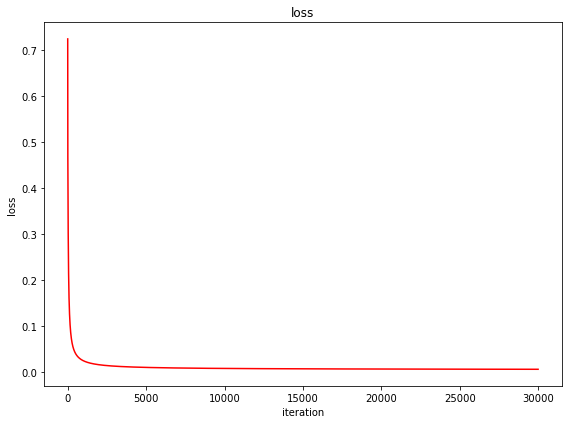

In [303]:
plot_loss_curve(loss1_iteration)

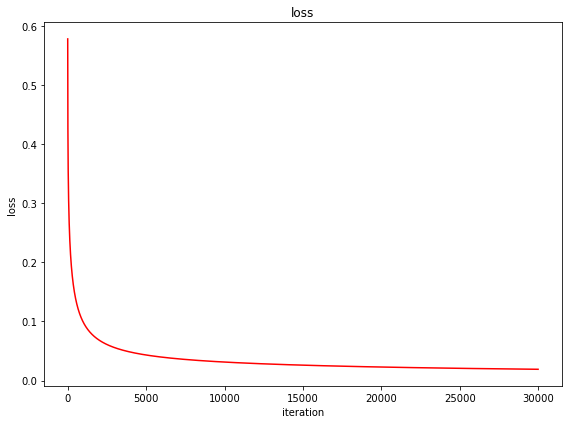

In [304]:
plot_loss_curve(loss2_iteration)

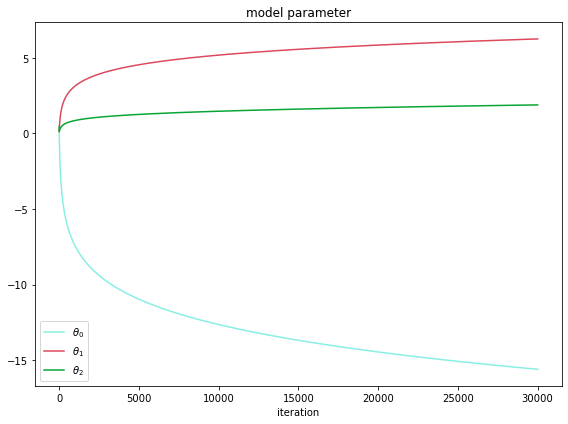

In [305]:
plot_model_parameter(theta1_iteration)

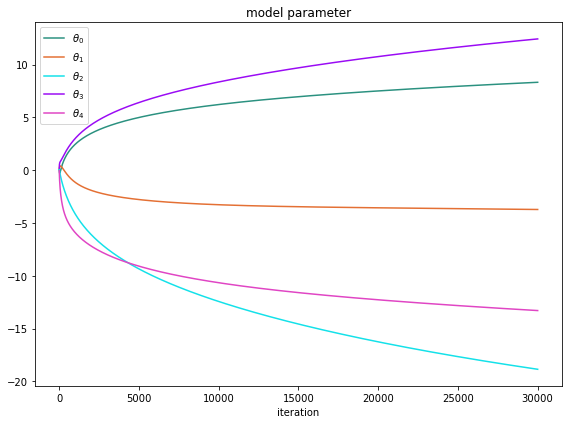

In [306]:
plot_model_parameter(theta2_iteration)

In [336]:
def plot_classifier1(data, theta):
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    X = np.arange(-3, 3, 0.01)
    Y = np.arange(-5, 5, 0.01)
    
    grid_x, grid_y = np.meshgrid(X, Y)
    result = []

    for i in range(0, len(grid_x)):
        feature = feature_function1(grid_x[i], grid_y[i])
        result.append(regression_function(theta, feature))
        
    result = np.array(result)
    
    plt.contourf(grid_x, grid_y, result, levels = 100, cmap='bwr')
    plt.colorbar()
    plt.contour(grid_x, grid_y, result, levels= [0], colors = 'black')
    
    blue_data1 = data1[data1[:,2] == 0]
    blue_x = blue_data1[:, 0]
    blue_y = blue_data1[:, 1]
    
    red_data1 = data1[data1[:,2] == 1]
    red_x = red_data1[:, 0]
    red_y = red_data1[:, 1]
    
    plt.plot(blue_x, blue_y, '.', color = 'blue', label='class = 0')
    plt.plot(red_x, red_y, '.', color = 'red', label='class = 1')
    
    plt.legend()
    plt.tight_layout()
    plt.show()

In [337]:
def plot_classifier2(data, theta):
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    X = np.arange(-2, 3, 0.01)
    Y = np.arange(-1, 2, 0.01)
    
    grid_x, grid_y = np.meshgrid(X, Y)
    result = []

    for i in range(0, len(grid_x)):
        feature = feature_function2(grid_x[i], grid_y[i])
        result.append(regression_function(theta, feature))
        
    result = np.array(result)
    
    plt.contourf(grid_x, grid_y, result, levels = 100, cmap='bwr')
    plt.colorbar()
    plt.contour(grid_x, grid_y, result, levels= [0], colors = 'black')
    
    blue_data2 = data2[data2[:,2] == 0]
    blue_x = blue_data2[:, 0]
    blue_y = blue_data2[:, 1]
    
    red_data2 = data2[data2[:,2] == 1]
    red_x = red_data2[:, 0]
    red_y = red_data2[:, 1]
    
    plt.plot(blue_x, blue_y, '.', color = 'blue', label='class = 0')
    plt.plot(red_x, red_y, '.', color = 'red', label='class = 1')
    
    plt.legend()
    plt.tight_layout()
    plt.show()

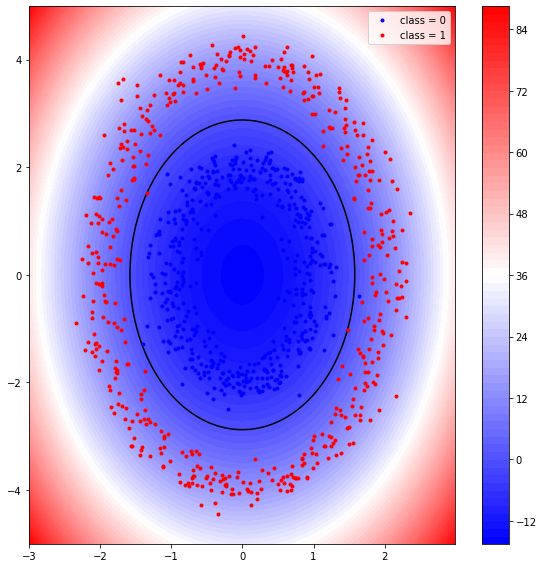

In [338]:
plot_classifier1(data1, theta1_optimal)

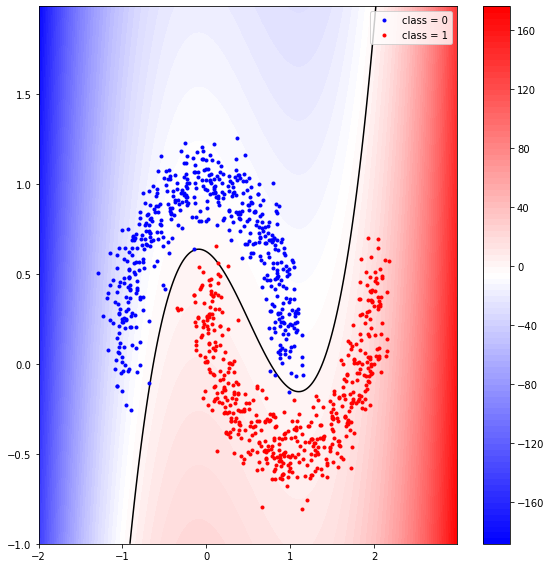

In [339]:
plot_classifier2(data2, theta2_optimal)

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data (data1) from the file [assignment_09_data1.txt] in blue for class 0 and in red for class 1

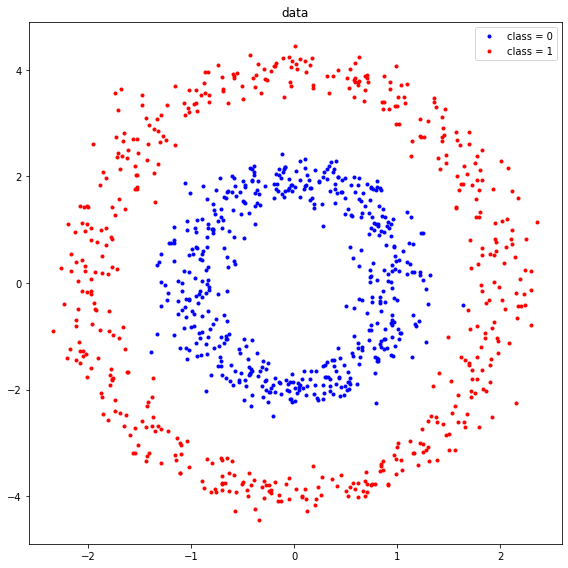

In [340]:
plot_data(data1)

### # 02. plot the input data (data2) from the file [assignment_09_data2.txt] in blue for class 0 and in red for class 1

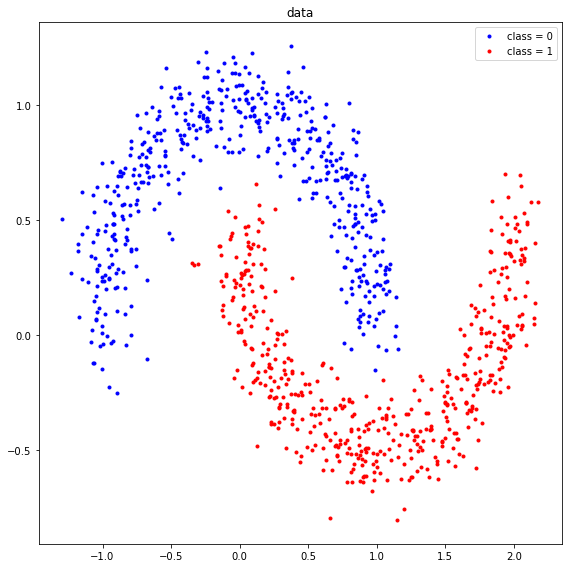

In [341]:
plot_data(data2)

### # 03. plot the values of the model parameters $\theta$ as curves over the gradient descent iterations using different colors for data1

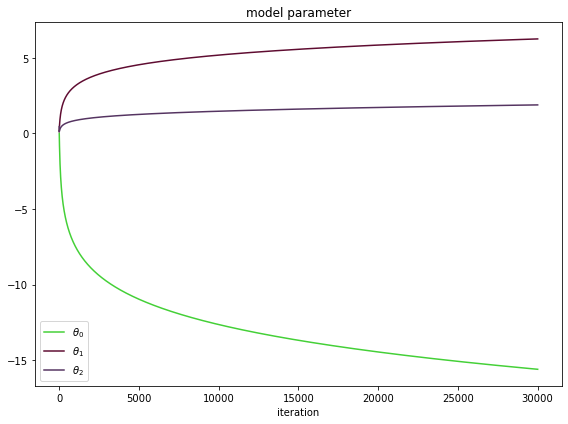

In [344]:
plot_model_parameter(theta1_iteration)

### # 04. plot the values of the model parameters $\theta$ as curves over the gradient descent iterations using different colors for data2

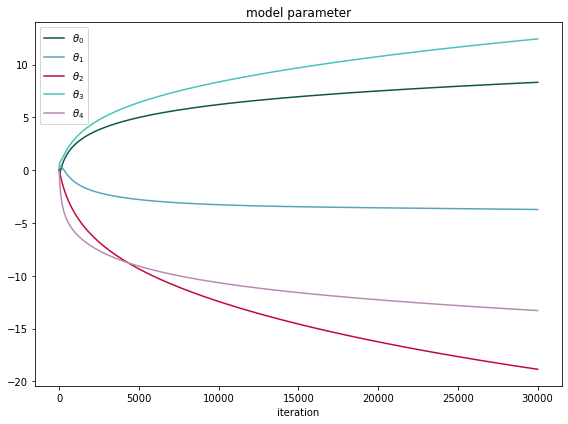

In [345]:
plot_model_parameter(theta2_iteration)

### # 05. plot the loss values in red curve over the gradient descent iterations for data1

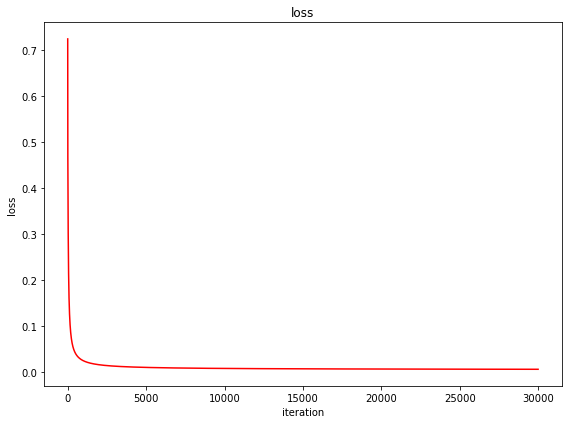

In [346]:
plot_loss_curve(loss1_iteration)

### # 06. plot the loss values in red curve over the gradient descent iterations for data2

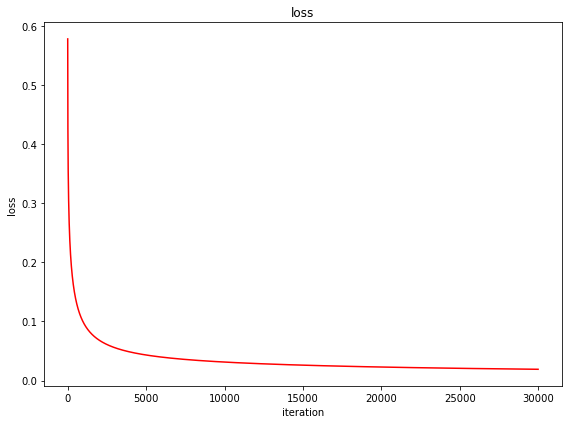

In [347]:
plot_loss_curve(loss2_iteration)

### # 07. plot the classifier with the given data points superimposed for data1

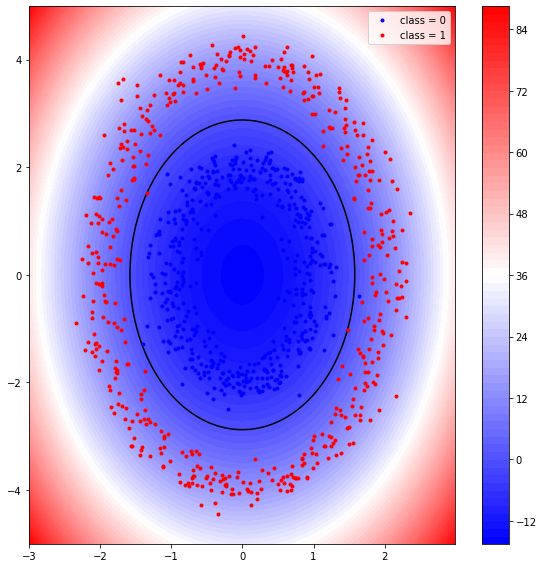

In [348]:
plot_classifier1(data1, theta1_optimal)

### # 08. plot the classifier with the given data points superimposed for data2

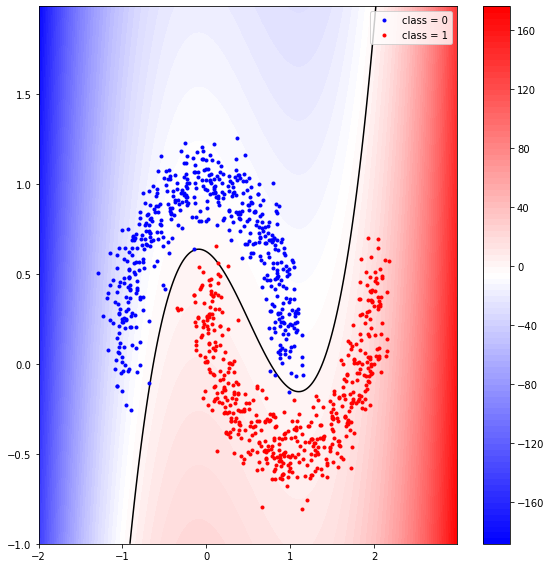

In [349]:
plot_classifier2(data2, theta2_optimal)

### # 09. print out the accuracy of the obtained classifier1 for data1

In [350]:
print(accuracy_classifier1)

0.999


### # 10. print out the accuracy of the obtained classifier2 for data1

In [351]:
print(accuracy_classifier2)

0.994
